<div class="alert alert-block alert-info">
<b>Versions of Notebook, Matplotlib and Seaborn</div>

Notebook version: 6.4.12; Seaborn version: 0.13.0; Matplotlib version: 3.5.2

<div class="alert alert-block alert-info">
<b>IMPORT LIBRARIES</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

<div class="alert alert-block alert-info">
<b>IMPORT DATAFRAME</div>

In [3]:
df = pd.read_csv('support2-1.csv')

In [4]:
df

ID       age  death     sex  hospdead  slos  d.time  \
0        1  62.84998      0    male         0     5    2029   
1        2  60.33899      1  female         1     4       4   
2        3  52.74698      1  female         0    17      47   
3        4  42.38498      1  female         0     3     133   
4        5  79.88495      0  female         0    16    2029   
...    ...       ...    ...     ...       ...   ...     ...   
9100  9101  66.07300      0    male         0    23     350   
9101  9102  55.15399      0  female         0    29     347   
9102  9103  70.38196      0    male         0     8     346   
9103  9104  47.01999      1    male         1     7       7   
9104  9105  81.53894      1  female         0    12     198   

                dzgroup             dzclass  num.co  ...      crea    sod  \
0           Lung Cancer              Cancer       0  ...  1.199951  141.0   
1             Cirrhosis  COPD/CHF/Cirrhosis       2  ...  5.500000  132.0   
2             Cirrhosis  COPD/CHF/Cirrhosis       2  ...  2.000000  134.0   
3           Lung Cancer              Cancer       2  ...  0.799927  139.0   
4     ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  0.799927  143.0   
...                 ...                 ...     ...  ...       ...    ...   
9100  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  1.099854  131.0   
9101               Coma                Coma       1  ...  5.899414  135.0   
9102  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  2.699707  139.0   
9103       MOSF w/Malig            ARF/MOSF       1  ...  3.500000  135.0   
9104  ARF/MOSF w/Sepsis            ARF/MOSF       1  ...  1.199951  137.0   

            ph  glucose   bun   urine  adlp adls                sfdm2  \
0     7.459961      NaN   NaN     NaN   7.0  7.0                  NaN   
1     7.250000      NaN   NaN     NaN   NaN  1.0     <2 mo. follow-up   
2     7.459961      NaN   NaN     NaN   1.0  0.0     <2 mo. follow-up   
3          NaN      NaN   NaN     NaN   0.0  0.0  no(M2 and SIP pres)   
4     7.509766      NaN   NaN     NaN   NaN  2.0  no(M2 and SIP pres)   
...        ...      ...   ...     ...   ...  ...                  ...   
9100  7.459961    188.0  21.0     NaN   NaN  0.0                  NaN   
9101  7.289062    190.0  49.0     0.0   NaN  0.0                  NaN   
9102  7.379883    189.0  60.0  3900.0   NaN  NaN                  NaN   
9103  7.469727    246.0  55.0     NaN   NaN  0.0     <2 mo. follow-up   
9104  7.289062    187.0  15.0     NaN   0.0  NaN  no(M2 and SIP pres)   

         adlsc  
0     7.000000  
1     1.000000  
2     0.000000  
3     0.000000  
4     2.000000  
...        ...  
9100  0.000000  
9101  0.000000  
9102  2.525391  
9103  0.000000  
9104  0.494751  

[9105 rows x 48 columns]

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div class="alert alert-block alert-info", style="font-size: 30px;">
<b>INITIAL DATA ANALYSIS (IDA)<a name="IDA"></a></div>


The present analysis[(Wikipedia, 2020)](#11) delves into an extensive clinical dataset, aiming to glean insights and unravel patterns that can significantly contribute to healthcare decision-making. With a comprehensive understanding of the dataset, comprising a myriad of clinical records and patient demographics, the primary objective is to perform Exploratory Data Analysis (EDA) to uncover valuable information and foster a deeper comprehension of the underlying health-related trends via visualizations.

**Overview of the Dataset:**

The dataset[(Wenger,N.S., et al, 2010)](#8) encapsulates a diverse range of clinical parameters and patient attributes, offering a nuanced view of health-related factors. With 9105 observations and 47 variables, the dataset provides a rich source of information poised for exploration.

**Objective of the Analysis:**

The primary aim is to gain a holistic understanding of the dataset by addressing pertinent questions, such as identifying prevalent diseases, discerning patient demographics, and exploring factors that influence hospital costs. Through visualizations and statistical analyses, there is an aspiration to uncover patterns that may guide healthcare practitioners and stakeholders.

**Data Preprocessing Overview:**

To ensure the integrity of the analysis, meticulous data preprocessing was conducted. This involved handling missing values judiciously, converting data types where necessary, and introducing new features to enhance the interpretability of the findings.

**Exploration of Variables:**

Domain-specific knowledge aids in interpreting these variables and extracting meaningful insights from the explorations.

#### Dataframe information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

##### Replacing the original column names with more comprehensible and user-friendly equivalents

| Original Column Name                    | Replaced Column Name                          |
|:-|:-|
| ID                                       | Patient_ID                                   |
| age                                      | Patient_Age                                  |
| death                                    | Patient_Death                                |
| sex                                      | Patient_Gender                               |
| hospdead                                 | Patient_Death_Hospital                       |
| slos                                     | Hospital_Stay_Length                         |
| d.time                                   | Time_until_death                             |
| dzgroup                                  | Disease_Group                                |
| dzclass                                  | Disease_Class                                |
| num.co                                   | Number_of_Comorbidities                      |
| edu                                      | Patient_education                            |
| income                                   | Patient_Income                               |
| scoma                                    | Severity_of_coma                             |
| charges                                  | Hospital_charges                             |
| totcst                                   | Total_hospital_cost                          |
| totmcst                                  | Total_medical_cost                           |
| avtisst                                  | Average_tissue_score                         |
| race                                     | Patient_Race                                 |
| sps                                      | Simplified_Acute_Physiology_Score           |
| aps                                      | Acute_Physiology_Score                       |
| surv2m                                   | Survival_2_months                            |
| surv6m                                   | Survival_6_months                            |
| hday                                     | Hospital_day                                |
| diabetes                                 | Patient_Diabetes_Indication                  |
| dementia                                 | Patient_Dementia_Indication                  |
| ca                                       | Cancer_status                                |
| prg2m                                    | 2_months_Progression                         |
| prg6m                                    | 6_months_Progression                         |
| dnr                                      | Do_Not_Resuscitate_order                     |
| dnrday                                   | DNR_order_day                                |
| meanbp                                   | Mean_BP                                      |
| wblc                                     | WBC_Count                                    |
| hrt                                      | Heart_rate                                   |
| resp                                     | Respiratory_rate                             |
| temp                                     | Body_temperature                            |
| pafi                                     | Pulmonary_artery_pressure_PAFi               |
| alb                                      | Albumin_level                                |
| bili                                     | Bilirubin_level                              |
| crea                                     | Creatinine_level                             |
| sod                                      | Sodium_level                                 |
| ph                                       | pH_level                                     |
| glucose                                  | Blood_glucose_level                          |
| bun                                      | Blood_urea_nitrogen_level                    |
| urine                                    | Urine_output                                 |
| adlp                                     | Activity_Daily_Living_Patient                |
| adls                                     | Activity_Daily_Living_Surrogate              |
| sfdm2                                    | Functional_Disability_of_the_Patient         |
| adlsc                                    | Activity_Daily_Living_Surrogate_Discharge   |


In [6]:
df.columns = ['Patient_ID',
 'Patient_Age',
 'Patient_Death',
 'Patient_Gender',
 'Patient_Death_Hospital',
 'Hospital_Stay_Length',
 'Time_until_death',
 'Disease_Group',
 'Disease_Class',
 'Number_of_Comorbidities',
 'Patient_education',
 'Patient_Income',
 'Severity_of_coma',
 'Hospital_charges',
 'Total_hospital_cost',
 'Total_medical_cost',
 'Average_tissue_score',
 'Patient_Race',
 'Simplifie_Acute_Physiology_Score',
 'Acute_Physiology_Score',
 'Survival_2_months',
 'Survival_6_months',
 'Hospital_day',
 'Patient_Diabetes_Indication',
 'Patient_Dementia_Indication',
 'Cancer_status',
 '2_months_Progression',
 '6_months_Progression',
 'Do_Not_Resuscitate_order',
 'DNR_order_day',
 'Mean_BP',
 'WBC_Count',
 'Heart_rate',
 'Respiratory_rate',
 'Body_temperature',
 'Pulmonary_artery_pressure_PAFi',
 'Albumin_level',
 'Bilirubin_level',
 'Creatinine_level',
 'Sodium_level',
 'pH_level',
 'Blood_glucose_level',
 'Blood_urea_nitrogen_level',
 'Urine_output',
 'Activity_Daily_Living_Patient',
 'Activity_Daily_Living_Surrogate',
 'Functional_Disability_of_the_Patient',
 'Activity_Daily_Living_Surrogate_Discharge']

### ABBREVIATIONS
| ABBREVATION | FULL FORM  |
|:-:|:-:|
| ARF | Acute Renal Failure |
| MOSF | Multiple Organ System Failure  |
| COPD | Chronic Obstructive Pulmonary Disease |
| CHF| Systolic Heart Failure |
| DNR| Do Not Resuscitate  |


[Link to Section 1](#IDA)


### DATA QUALITY ASSESSEMENT
| ISSUE                                    | PROPOSED SOLUTION                                                  |
|:-|:-|
| Missing Values                           | Utilized appropriate imputation methods based on the data context |
| Unexpected Data Types                    | Performed data type conversions to align with the correct types    |
| Data Anomalies and Incorrect Entries     | Implemented data cleaning procedures to ensure accuracy and consistency|


The actions undertaken to cleanse and transform the data are described below.

| COLUMN NAME | DATA TYPE | NULL COUNT | ACTION ON NULL VALUES |
| :- | :- | :- | :- |
| Severity_of_coma | int64 | 1 | Replacing with median based on the histogram analysis |
| Hospital_charges | int64 | 172 | Replacing with mean based on the histogram analysis |
| Total_hospital_cost | int64 | 888 | Replacing with ratio of Total_hospital_cost and Hospital_charges |
| Average_tissue_cost | int64 | 82 | Replacing with median based on the histogram analysis |
| Patient_Race | float64 | 42 | Since 79% of the data is white, the 42 null value is less than 1% of the entire dataframe |
| Simplifie_Acute_Physiology_Score | int64 | 1 | Replacing with median based on the histogram analysis |
| Acute_Physiology_Score | int64 | 1 | Replacing with median based on the histogram analysis |
| Survival_2_months | int64 | 1 | Replacing with median based on the histogram analysis |
| Survival_6_months | int64 | 1 | Replacing with median based on the histogram analysis |
| Do_Not_Resuscitate_order | float64 | 30 | Replacing with mode based on the histogram analysis |
| DNR_order_day | float64 | 30 | Replacing with mode based on the histogram analysis |
| Mean_BP | int64 | 1 | Replacing with mode based on the histogram analysis |
| Heart_Rate | int64 | 1 | Replacing with median based on the histogram analysis |
| Respiratory_rate | int64 | 1 | Replacing with median based on the histogram analysis |
| Body_temperature | int64 | 1 | Replacing with median based on the histogram analysis |
| Sodium_level | int64 | 1 | Replacing with mean based on the histogram analysis |
| pH_level | int64 | 2284 | Replacing with median based on the histogram analysis |
| Albumin_level | int64 | 2372 | Replaced by default value ie., 3.5 |
| Pulmonary_artery_pressure_PAFi | int64 | 2325 | Replaced by default value ie., 333.3 |
| Bilirubin_level | int64 | 2601 | Replaced by default value ie., 1.01 |
| Creatinine_level | int64 | 67 | Replaced by default value ie., 1.01 |
| Blood_urea_nitrogen_level | int64 | 3352 | Replaced by default value ie., 6.51 |
| WBC_Count | int64 | 212 | Replaced by default value ie., 9 |
| Urine_output | int64 | 3862 | Replaced by default value ie., 2502 |
| Patient_education | object | 1634 | Diverse and individualized nature of educational backgrounds makes arbitrary imputation inappropriate |
| Patient_Income | int64 | 1982 | Individual incomes vary significantly, making statistical imputation inappropriate as each person's income is distinct |
| Total_medical_cost | int64 | 2475 | Large number of null values could significantly impact output results, and imputing such a substantial number of rows is deemed inappropriate |
| 2_months_Progression | float64 | 1649 | Prediction of patient progression within a 2-month timeframe is reliant on the individual's immune system, making it challenging to fill in these null values |
| 6_months_Progression | float64 | 1633 | Prediction of patient progression within a 2-month timeframe is reliant on the individual's immune system, making it challenging to fill in these null values |
| Blood_glucose_level | int64 | 3500 | No standardized range for Blood_glucose_level applicable to every individual, and the dynamic nature of blood glucose levels among individuals makes imputation difficult |
| Activity_Daily_Living_Patient, Activity_Daily_Living_Surrogate & Activity_Daily_Living_Surrogate_Discharge | int64 | 3641, 2867 and 0 | Columns 'Activity_Daily_Living_Patient', 'Activity_Daily_Living_Surrogate', and 'Activity_Daily_Living_Surrogate_Discharge' contain similar information. Prioritizing 'Activity_Daily_Living_Surrogate' eliminates the need to address null values in the other two |

##### Plotting the heatmap prior to replacing null values

<AxesSubplot:>

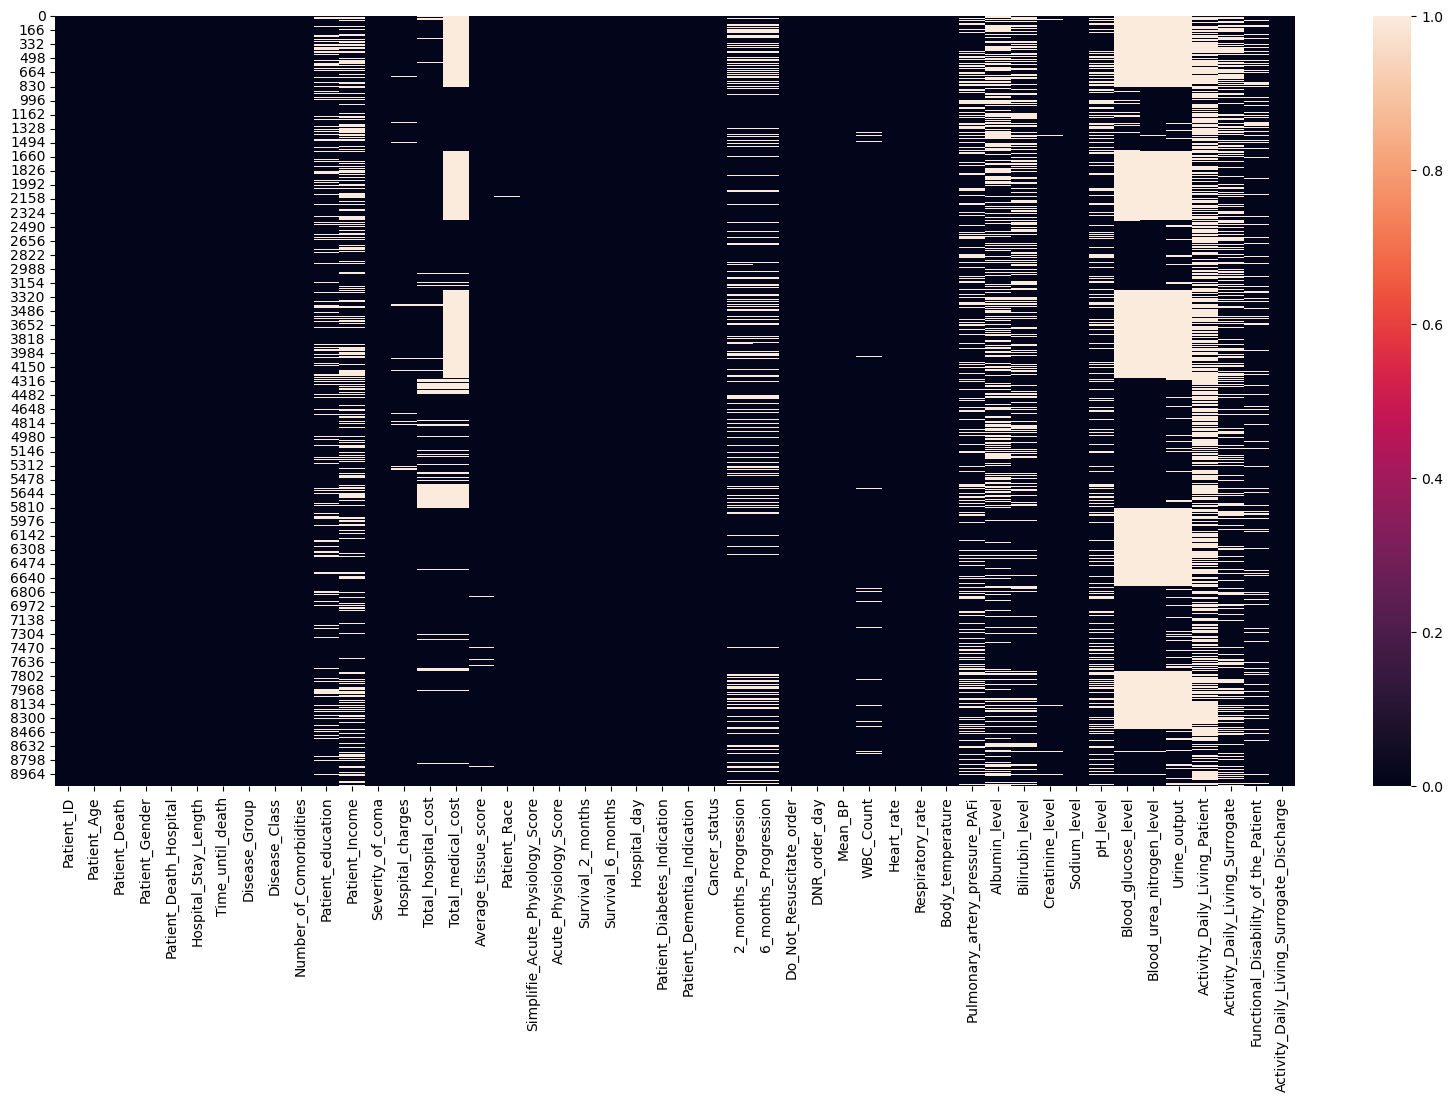

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

##### Sample of a dataframe

In [8]:
df.head()

Patient_ID  Patient_Age  Patient_Death Patient_Gender  \
0           1     62.84998              0           male   
1           2     60.33899              1         female   
2           3     52.74698              1         female   
3           4     42.38498              1         female   
4           5     79.88495              0         female   

   Patient_Death_Hospital  Hospital_Stay_Length  Time_until_death  \
0                       0                     5              2029   
1                       1                     4                 4   
2                       0                    17                47   
3                       0                     3               133   
4                       0                    16              2029   

       Disease_Group       Disease_Class  Number_of_Comorbidities  ...  \
0        Lung Cancer              Cancer                        0  ...   
1          Cirrhosis  COPD/CHF/Cirrhosis                        2  ...   
2          Cirrhosis  COPD/CHF/Cirrhosis                        2  ...   
3        Lung Cancer              Cancer                        2  ...   
4  ARF/MOSF w/Sepsis            ARF/MOSF                        1  ...   

   Creatinine_level Sodium_level  pH_level  Blood_glucose_level  \
0          1.199951        141.0  7.459961                  NaN   
1          5.500000        132.0  7.250000                  NaN   
2          2.000000        134.0  7.459961                  NaN   
3          0.799927        139.0       NaN                  NaN   
4          0.799927        143.0  7.509766                  NaN   

   Blood_urea_nitrogen_level  Urine_output  Activity_Daily_Living_Patient  \
0                        NaN           NaN                            7.0   
1                        NaN           NaN                            NaN   
2                        NaN           NaN                            1.0   
3                        NaN           NaN                            0.0   
4                        NaN           NaN                            NaN   

  Activity_Daily_Living_Surrogate  Functional_Disability_of_the_Patient  \
0                             7.0                                   NaN   
1                             1.0                      <2 mo. follow-up   
2                             0.0                      <2 mo. follow-up   
3                             0.0                   no(M2 and SIP pres)   
4                             2.0                   no(M2 and SIP pres)   

   Activity_Daily_Living_Surrogate_Discharge  
0                                        7.0  
1                                        1.0  
2                                        0.0  
3                                        0.0  
4                                        2.0  

[5 rows x 48 columns]

### STRATEGIES FOR MANAGING MISSING DATA, PREPROCESSING, AND TRANSFORMATIONS.

#### 1. Severity_of_coma

In [9]:
df["Severity_of_coma"].isna().value_counts()

False    9104
True        1
Name: Severity_of_coma, dtype: int64

###### Plotting histogram to check the skewness 

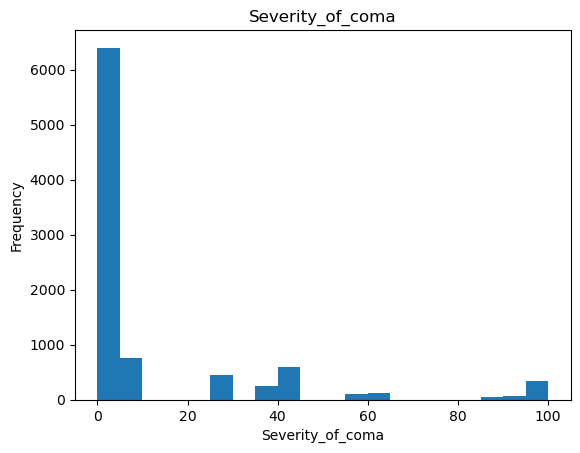

In [10]:
df['Severity_of_coma'].plot(kind='hist', bins=20, title='Severity_of_coma')
plt.xlabel('Severity_of_coma')
plt.show()

There is only 1 null value and the histogram is positively skewed replacing that with the median of "Severity_of_coma"

In [11]:
df.loc[df['Severity_of_coma'].isna(), 'Severity_of_coma'] = df["Severity_of_coma"].median()          

#### 2. Hospital_charges

In [12]:
df['Hospital_charges'].isna().value_counts()

False    8933
True      172
Name: Hospital_charges, dtype: int64

###### Plotting histogram to check the skewness 

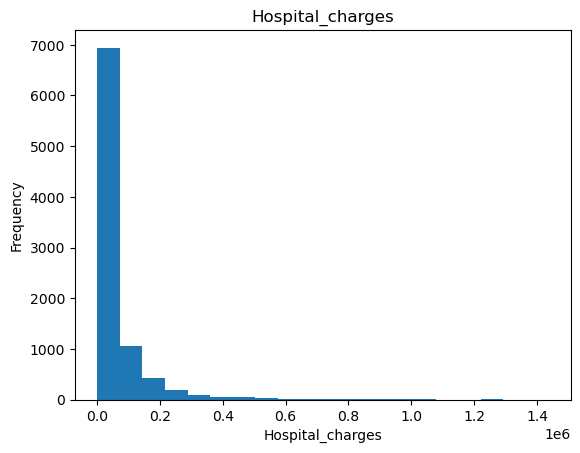

In [13]:
df['Hospital_charges'].plot(kind='hist', bins=20, title='Hospital_charges')
plt.xlabel('Hospital_charges')
plt.show()

As there are 172 null values and the histogram is positively skewed replacing those values with the mean of "Hospital_charges"

In [14]:
df.loc[df['Hospital_charges'].isna(), 'Hospital_charges'] = df["Hospital_charges"].median()       

#### 3. Total_hospital_cost

In [15]:
df['Total_hospital_cost'].isna().value_counts()

False    8217
True      888
Name: Total_hospital_cost, dtype: int64

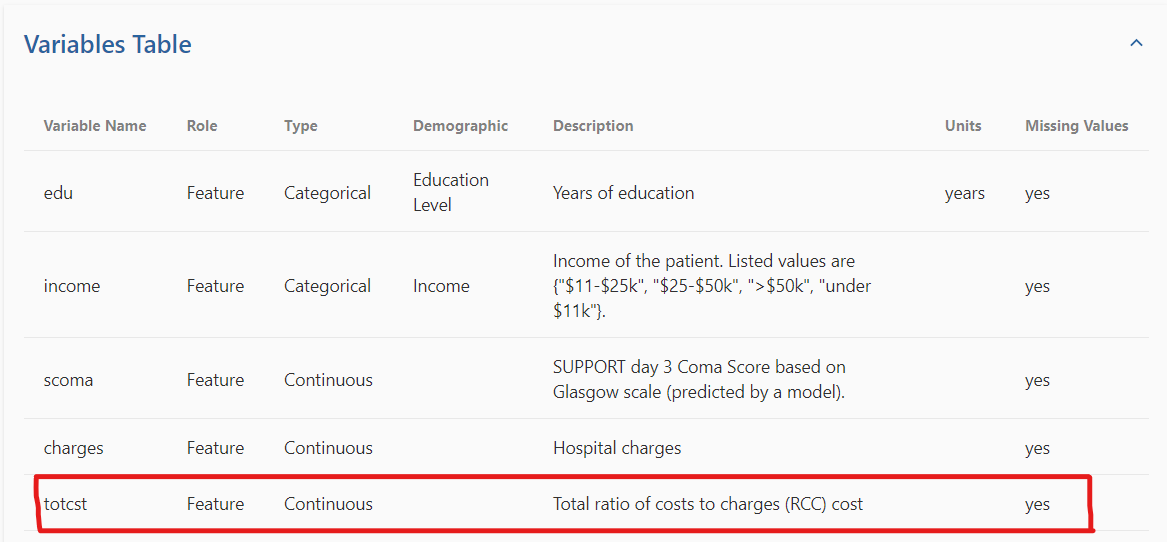

 According to the description given in the variable table from https://archive.ics.uci.edu/dataset/880/support2 website, getting the ratio of 'Hospital_charges' mean and 'Total_hospital_cost' mean.

In [16]:
ratio = df["Hospital_charges"].mean()/df["Total_hospital_cost"].mean()

In [17]:
ratio

1.9248491567838528

###### Replacing the null values in the 'Total_hospital_cost' by deviding 'Total_hospital_cost' by the 'ratio' from above.

In [18]:
df.loc[df['Total_hospital_cost'].isna(), 'Total_hospital_cost'] = df["Hospital_charges"]/ratio        

###### Checking the ratio between 'Hospital_charges' mean and 'Total_hospital_cost', mean after replacing the null values of 'Total_hospital_cost' 

In [19]:
df["Hospital_charges"].mean()/df["Total_hospital_cost"].mean()              #the ratio difference is 0.08

1.8485330055957958

#### 4. Average_tissue_cost

In [20]:
df['Average_tissue_score'].isna().value_counts()

False    9023
True       82
Name: Average_tissue_score, dtype: int64

###### Plotting histogram to check the skewness 

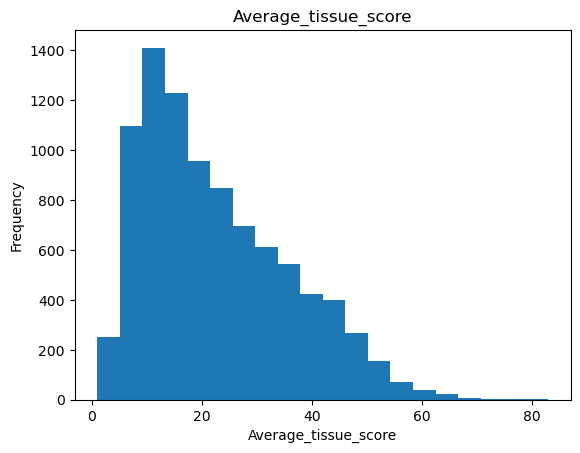

In [21]:
df['Average_tissue_score'].plot(kind='hist', bins=20, title='Average_tissue_score')
plt.xlabel('Average_tissue_score')
plt.show()

There are 82 null values and the histogram is positively skewed replacing those values with the median of "Average_tissue_cost"

In [22]:
df.loc[df['Average_tissue_score'].isna(), 'Average_tissue_score'] = df["Average_tissue_score"].median()

#### 5. Patient_Race

In [23]:
df['Patient_Race'].isna().value_counts()

False    9063
True       42
Name: Patient_Race, dtype: int64

Since 79% of the data is white, the 42 null value is less then 1% of the entire dataframe. There are 42 null value replacing those values with the mode of "Patient_Race"

In [24]:
df.loc[df['Patient_Race'].isna(), 'Patient_Race'] = df["Patient_Race"].mode()[0]

#### 6. Simplifie_Acute_Physiology_Score

In [25]:
df['Simplifie_Acute_Physiology_Score'].isna().value_counts()

False    9104
True        1
Name: Simplifie_Acute_Physiology_Score, dtype: int64

###### Plotting histogram to check the skewness 

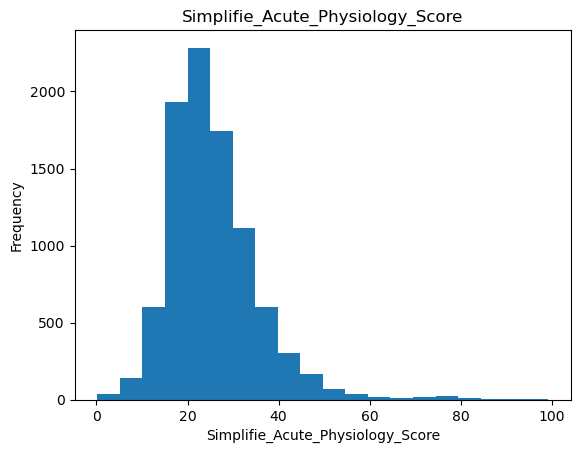

In [26]:
df['Simplifie_Acute_Physiology_Score'].plot(kind='hist', bins=20, title='Simplifie_Acute_Physiology_Score')
plt.xlabel('Simplifie_Acute_Physiology_Score')
plt.show()

There is only 1 null value and the histogram is positively skewed replacing that with the median of "Simplifie_Acute_Physiology_Score"

In [27]:
df.loc[df['Simplifie_Acute_Physiology_Score'].isna(), 'Simplifie_Acute_Physiology_Score'] = df["Simplifie_Acute_Physiology_Score"].median()

#### 7. Acute_Physiology_Score

In [28]:
df['Acute_Physiology_Score'].isna().value_counts()

False    9104
True        1
Name: Acute_Physiology_Score, dtype: int64

###### Plotting histogram to check the skewness 

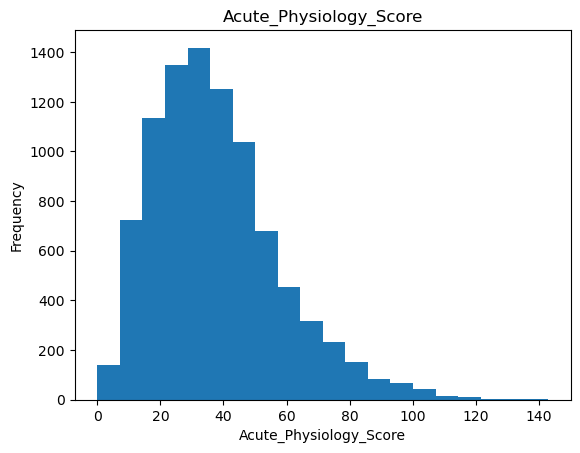

In [29]:
df['Acute_Physiology_Score'].plot(kind='hist', bins=20, title='Acute_Physiology_Score')
plt.xlabel('Acute_Physiology_Score')
plt.show()

There is only 1 null value and the histogram is positively skewed replacing that with the median of "Acute_Physiology_Score"

In [30]:
df.loc[df['Acute_Physiology_Score'].isna(), 'Acute_Physiology_Score'] = df["Acute_Physiology_Score"].median()

#### 8. Survival_2_months

In [31]:
df['Survival_2_months'].isna().value_counts()

False    9104
True        1
Name: Survival_2_months, dtype: int64

###### Plotting histogram to check the skewness 

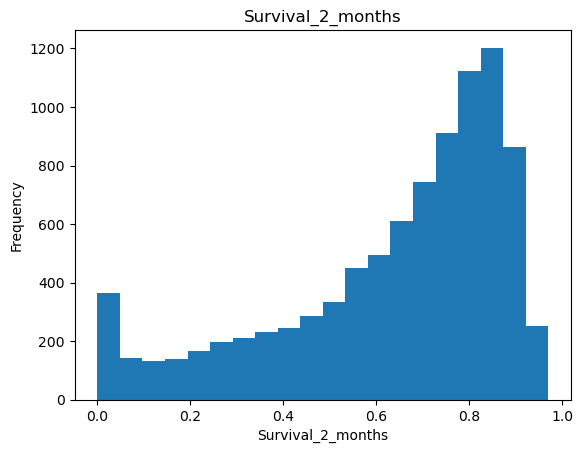

In [32]:
df['Survival_2_months'].plot(kind='hist', bins=20, title='Survival_2_months')
plt.xlabel('Survival_2_months')
plt.show()

There is only 1 null value and the histogram is negatively skewed replacing that with the median of "Survival_2_months"

In [33]:
df.loc[df['Survival_2_months'].isna(), 'Survival_2_months'] = df["Survival_2_months"].median()

#### 9. Survival_6_months

In [34]:
df['Survival_6_months'].isna().value_counts()

False    9104
True        1
Name: Survival_6_months, dtype: int64

###### Plotting histogram to check the skewness 

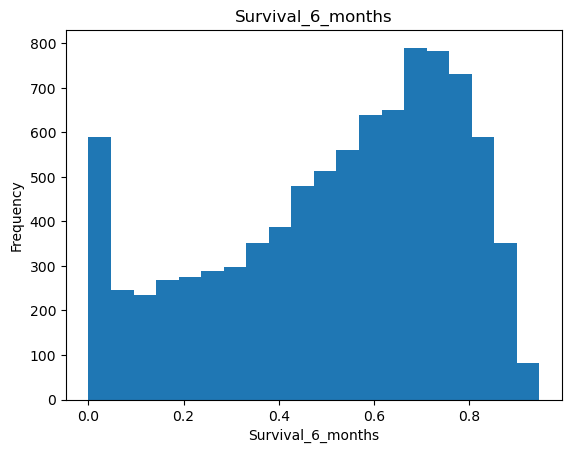

In [35]:
df['Survival_6_months'].plot(kind='hist', bins=20, title='Survival_6_months')
plt.xlabel('Survival_6_months')
plt.show()

There is only 1 null value and the histogram is negatively skewed so replacing that with the median of "Survival_6_months"

In [36]:
df.loc[df['Survival_6_months'].isna(), 'Survival_6_months'] = df["Survival_6_months"].median()

#### 10. Do_Not_Resuscitate_order

In [37]:
df['Do_Not_Resuscitate_order'].isna().value_counts()

False    9075
True       30
Name: Do_Not_Resuscitate_order, dtype: int64

As this is a categorical data and there are 30 null values so replacing that with the mode of "Do_Not_Resuscitate_order"

In [38]:
df['Do_Not_Resuscitate_order'] = np.where(df['Do_Not_Resuscitate_order'].isna(), df["Do_Not_Resuscitate_order"].mode(), df['Do_Not_Resuscitate_order'])

#### 11. DNR_order_day

In [39]:
df['DNR_order_day'].isna().value_counts()

False    9075
True       30
Name: DNR_order_day, dtype: int64

As 'Do_Not_Resuscitate_order' and 'DNR_order_day' are related to eachother and there are 30 null values in "DNR_order_day" as well replacing that with the mode of "DNR_order_day"

In [40]:
df['DNR_order_day'] = np.where(df['DNR_order_day'].isna(), df["DNR_order_day"].mode(), df['DNR_order_day'])

#### 12. Mean_BP

In [41]:
df['Mean_BP'].isna().value_counts()

False    9104
True        1
Name: Mean_BP, dtype: int64

###### Plotting histogram to check the skewness 

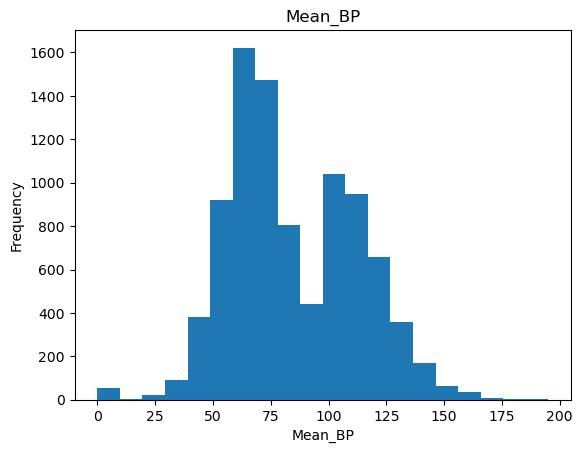

In [42]:
df['Mean_BP'].plot(kind='hist', bins=20, title='Mean_BP')
plt.xlabel('Mean_BP')
plt.show()

There is only 1 null value and the histogram has no evident skewness and it is inappropriate to take the mean of the Mean_BP so replacing that with the mode of "Mean_BP"

In [43]:
df.loc[df['Mean_BP'].isna(), 'Mean_BP'] = df["Mean_BP"].mode()[0]

#### 13. Heart_rate

In [44]:
df['Heart_rate'].isna().value_counts()

False    9104
True        1
Name: Heart_rate, dtype: int64

###### Plotting histogram to check the skewness 

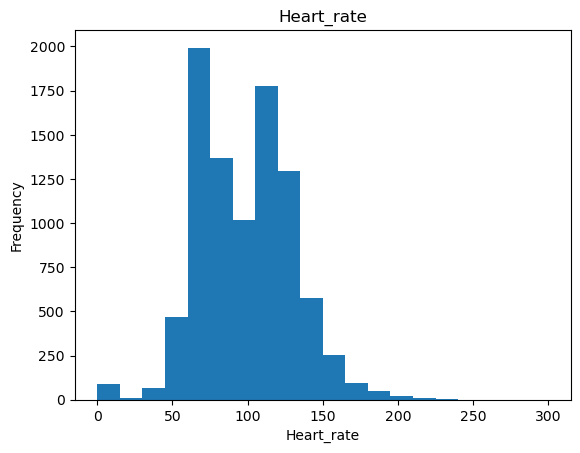

In [45]:
df['Heart_rate'].plot(kind='hist', bins=20, title='Heart_rate')
plt.xlabel('Heart_rate')
plt.show()

There is only 1 null value and the histogram is slightely positive skewed so replacing that with the median of "Heart_rate"

In [46]:
df.loc[df['Heart_rate'].isna(), 'Heart_rate'] = df["Heart_rate"].median()

#### 14. Respiratory_rate

In [47]:
df['Respiratory_rate'].isna().value_counts()

False    9104
True        1
Name: Respiratory_rate, dtype: int64

###### Plotting histogram to check the skewness 

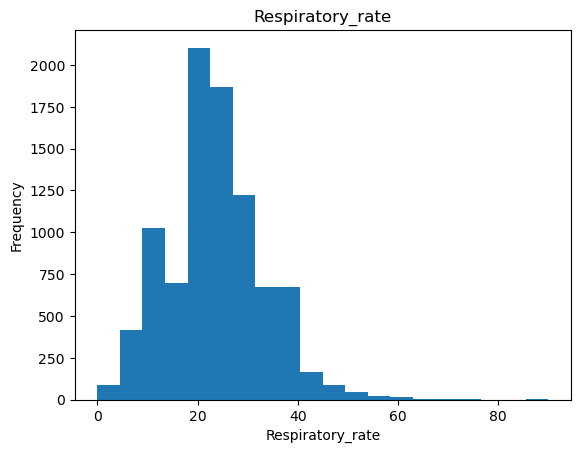

In [48]:
df['Respiratory_rate'].plot(kind='hist', bins=20, title='Respiratory_rate')
plt.xlabel('Respiratory_rate')
plt.show()

There is only 1 null value and the histogram is positively skewed so replacing that with the median of "Respiratory_rate"

In [49]:
df.loc[df['Respiratory_rate'].isna(), 'Respiratory_rate'] = df["Respiratory_rate"].median()

#### 15. Body_temperature

In [50]:
df['Body_temperature'].isna().value_counts()

False    9104
True        1
Name: Body_temperature, dtype: int64

###### Plotting histogram to check the skewness 

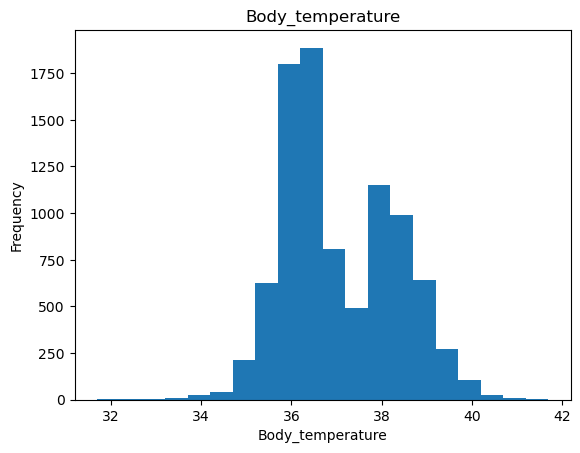

In [51]:
df['Body_temperature'].plot(kind='hist', bins=20, title='Body_temperature')
plt.xlabel('Body_temperature')
plt.show()

There is only 1 null value and the histogram is slightely negetive skewed so replacing that with the median of "Body_temperature"

In [52]:
df.loc[df['Body_temperature'].isna(), 'Body_temperature'] = df["Body_temperature"].median()

#### 16. Sodium_level

In [53]:
df['Sodium_level'].isna().value_counts()

False    9104
True        1
Name: Sodium_level, dtype: int64

###### Plotting histogram to check the skewness 

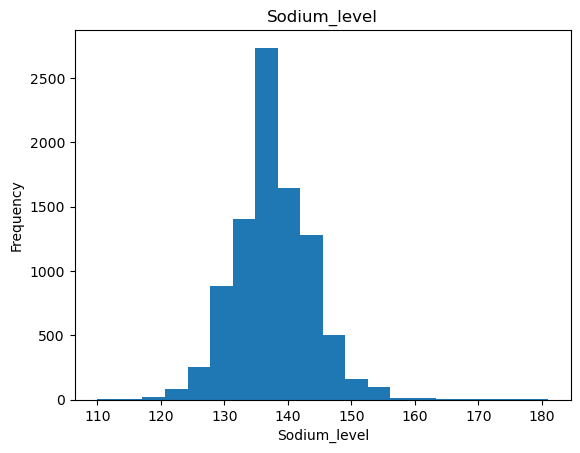

In [54]:
df['Sodium_level'].plot(kind='hist', bins=20, title='Sodium_level')
plt.xlabel('Sodium_level')
plt.show()

There is only 1 null value and the histogram is normally distributed so replacing that with the mean of "Sodium_level"

In [55]:
df.loc[df['Sodium_level'].isna(), 'Sodium_level'] = df["Sodium_level"].mean()

#### 17. pH_level

In [56]:
df['pH_level'].isna().value_counts()

False    6821
True     2284
Name: pH_level, dtype: int64

###### Plotting histogram to check the skewness 

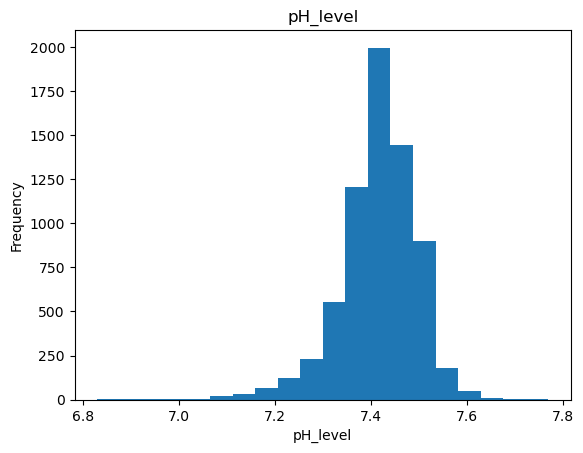

In [57]:
df['pH_level'].plot(kind='hist', bins=20, title='pH_level')
plt.xlabel('pH_level')
plt.show()

There are 2284 null values and the histogram is negatively skewed so replacing that with the median of "pH_level"

In [58]:
df.loc[df['pH_level'].isna(), 'pH_level'] = df["pH_level"].median()

#### 17. Default Values

The following screenshot is taken from https://archive.ics.uci.edu/dataset/880/support2 which has the recommended imputation values for the columns specified

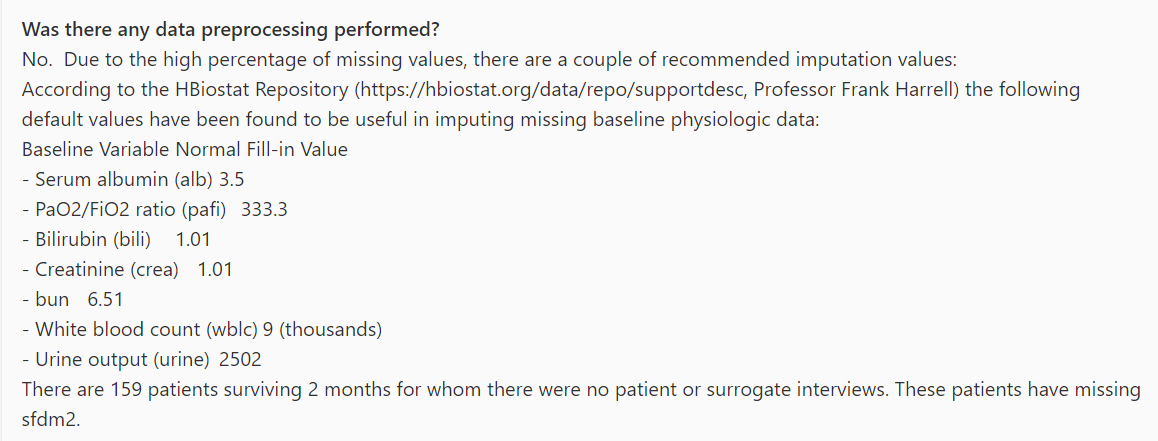

In [59]:
df.loc[df['Albumin_level'].isna(), 'Albumin_level'] = 3.5
df.loc[df['Pulmonary_artery_pressure_PAFi'].isna(), 'Pulmonary_artery_pressure_PAFi'] = 333.3
df.loc[df['Bilirubin_level'].isna(), 'Bilirubin_level'] = 1.01
df.loc[df['Creatinine_level'].isna(), 'Creatinine_level'] = 1.01
df.loc[df['Blood_urea_nitrogen_level'].isna(), 'Blood_urea_nitrogen_level'] = 6.51
df.loc[df['WBC_Count'].isna(), 'WBC_Count'] = 9
df.loc[df['Urine_output'].isna(), 'Urine_output'] = 2502

#### 18. Age

Converting the float values to int for column age

In [60]:
df['Patient_Age'] = df['Patient_Age'].astype(int)

In [61]:
df['Patient_Age']

0       62
1       60
2       52
3       42
4       79
        ..
9100    66
9101    55
9102    70
9103    47
9104    81
Name: Patient_Age, Length: 9105, dtype: int64

#### 19. Functional_Disability_of_the_Patient

In [62]:
df['Functional_Disability_of_the_Patient'].isna().value_counts()

False    7705
True     1400
Name: Functional_Disability_of_the_Patient, dtype: int64

There are 1400 NaN values and 'Functional_Disability_of_the_Patient' has 5 categories

##### I. '<2 mo. follow-up' 
'Hospital_Stay_Length' which are less than 59 days(less than 2 months) and the death as 1, basically means those who are dead within 2 months, for these values we have a defined categories in Functional_Disability_of_the_Patient, in this step 743 NaN values are replaced in the column and only 657 remain.

In [63]:
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Hospital_Stay_Length']<=59) & (df['Patient_Death'] == 1), '<2 mo. follow-up', df['Functional_Disability_of_the_Patient'])

##### II. 'Coma or Intub'
Based on 'Disease_Group', 'Disease_Class' columns the rows with value as "Coma' for those rows for with 'Functional_Disability_of_the_Patient' as null can be replaced by 'Coma or Intub'.  
Based on 'Activity_Daily_Living_Surrogate_Discharge' column for which the value is less than 4 with 'Functional_Disability_of_the_Patient' as null can be replaced by 'Coma or Intub'.
Based on 'Activity_Daily_Living_Surrogate_Discharge' column for which the value is equal to 0 and who are dead (i.e 'Patient_Death' == 0) with 'Functional_Disability_of_the_Patient' as null can be replaced by 'Coma or Intub'.

In [64]:
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Activity_Daily_Living_Surrogate_Discharge']<4.0) & (df['Disease_Group'] == 'Coma') & (df['Disease_Class'] == 'Coma'), 'Coma or Intub', df['Functional_Disability_of_the_Patient'])
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Patient_Death'] == 1) & (df['Activity_Daily_Living_Surrogate_Discharge'] == 0.0), 'Coma or Intub', df['Functional_Disability_of_the_Patient'])

##### III. 'adl>=4 (>=5 if sur)'
Based on 'Activity_Daily_Living_Surrogate_Discharge' column for which the value is grater than or equal to 4 and who are alive (i.e 'Patient_Death' == 0) with 'Functional_Disability_of_the_Patient' as null can be replaced by 'adl>=4 (>=5 if sur)'

In [65]:
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Activity_Daily_Living_Surrogate_Discharge']>=4.0) & (df['Patient_Death'] == 0) & (df['Patient_Death_Hospital'] == 0), 'adl>=4 (>=5 if sur)', df['Functional_Disability_of_the_Patient'])

##### IV. 'no(M2 and SIP pres)'
Based on 'Activity_Daily_Living_Surrogate_Discharge' column for which the value is grater than or equal to 4 and who are dead (i.e 'Patient_Death' == 1) after discharge with 'Functional_Disability_of_the_Patient' as null can be replaced by 'no(M2 and SIP pres)'

In [66]:
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Activity_Daily_Living_Surrogate_Discharge']>=4.0) & (df['Patient_Death'] == 1), 'no(M2 and SIP pres)', df['Functional_Disability_of_the_Patient'])

##### V. 'SIP>=30'
The values with Activity_Daily_Living_Surrogate_Discharge less than 4, and 'Hospital_Stay_Length' is more than 2 months who are dead (i.e 'Patient_Death' == 0), so the sickness impact profile is greater than 30

In [67]:
df['Functional_Disability_of_the_Patient'] = np.where((df['Functional_Disability_of_the_Patient'].isna()) & (df['Patient_Death'] == 1), 'SIP>=30', df['Functional_Disability_of_the_Patient'])

###### Dividing the patients into age groups

In [68]:
# Define bins for age groups
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]  # Adding float('inf') to represent ages above 100

# Define labels for each age group
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100', '100+']

# Add a new column 'Age_Group' to the DataFrame based on the age bins
df['Age_Group'] = pd.cut(df['Patient_Age'], bins=bins, labels=labels, right=False)


###### Converting the probability of 2 months and 6 months Progression into percentages

In [69]:
df['2_months_Progression'] =df['2_months_Progression']*100 
df['6_months_Progression'] =df['6_months_Progression']*100 

In [70]:
df.to_csv("CW2.csv", index=False)

###### Dataframe information after replacing all the null values

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 49 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Patient_ID                                 9105 non-null   int64   
 1   Patient_Age                                9105 non-null   int64   
 2   Patient_Death                              9105 non-null   int64   
 3   Patient_Gender                             9105 non-null   object  
 4   Patient_Death_Hospital                     9105 non-null   int64   
 5   Hospital_Stay_Length                       9105 non-null   int64   
 6   Time_until_death                           9105 non-null   int64   
 7   Disease_Group                              9105 non-null   object  
 8   Disease_Class                              9105 non-null   object  
 9   Number_of_Comorbidities                    9105 non-null   int64   
 10  Patient_educ

###### Plotting the heatmap after replacing the null values

<AxesSubplot:>

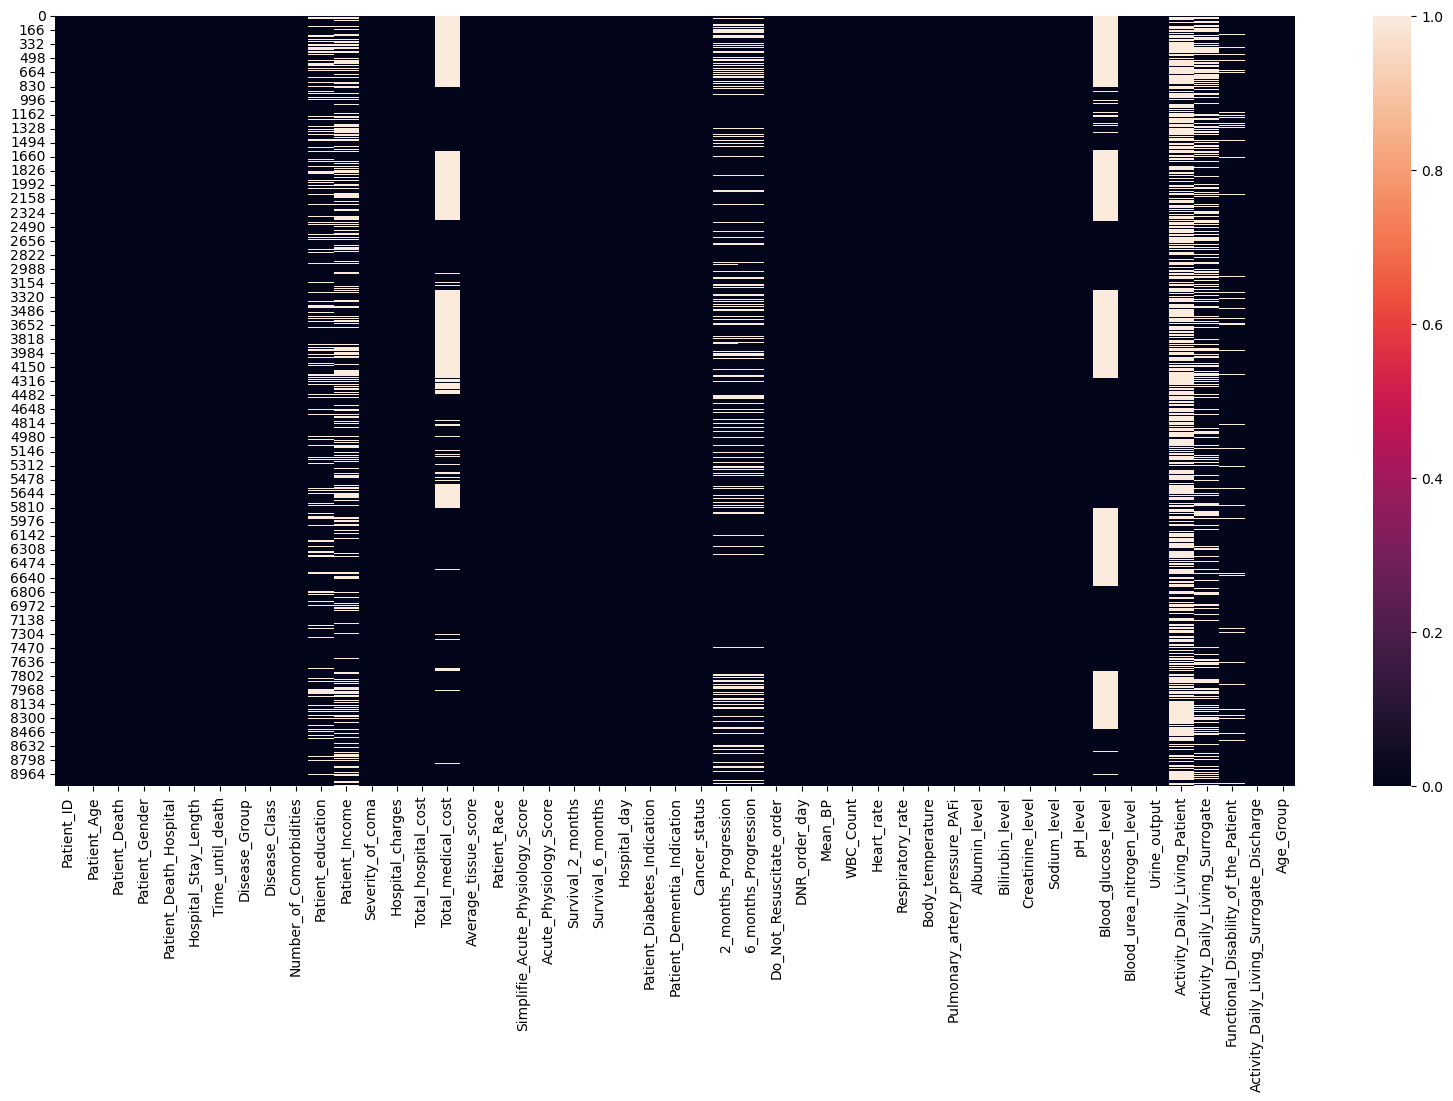

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

### UNRESOLVED NULL VALUES IN DATASET

#### Patient_education
In the context of the Patient_education column, dealing with null values presents a challenge because arbitrary imputation cannot be performed, considering the diverse and individualized nature of educational backgrounds that significantly differ from person to person.
#### Patient_Income
In the case of the Patient_Income column, managing null values is problematic since individual incomes vary significantly, making it inappropriate to impute values using statistical methods, as each person's income is distinct and cannot be generalized accurately.
#### Total_medical_cost
The Total_medical_cost column contains 3475 null values, and imputing such a substantial number of rows could significantly impact the output results. Therefore, filling these null values is deemed inappropriate as it might introduce variations in the final output.
#### 2_months_Progression
In addressing null values within the Survival_2_months column, it is challenging as predicting patient progression within a 2 month timeframe is reliant on the individual's immune system, rendering it unpredictable and thus making it difficult to fill in these null values.
#### 6_months_Progression
In addressing null values within the Survival_6_months column, it is challenging as predicting patient progression within a 6 month timeframe is reliant on the individual's immune system, rendering it unpredictable and thus making it difficult to fill in these null values.
#### Blood_glucose_level
In managing null values within the Blood_glucose_level column, it poses difficulty as there isn't a standardized range for Blood_glucose_level applicable to every individual; it tends to vary over time. Hence, these null values cannot be readily replaced or imputed due to the dynamic nature of blood glucose levels among individuals.
#### Activity_Daily_Living_Patient, Activity_Daily_Living_Surrogate & Activity_Daily_Living_Surrogate_Discharge
In the dataset, the columns 'Activity_Daily_Living_Patient', 'Activity_Daily_Living_Surrogate', and 'Activity_Daily_Living_Surrogate_Discharge' contain similar information, with one being filled by the patient, another by a surrogate, and the 'Activity_Daily_Living_Surrogate_Discharge' column encompassing all imputed null values from the 'Activity_Daily_Living_Surrogate' column. Considering this, it was opted to prioritize using the 'Activity_Daily_Living_Surrogate' column over the other two, thus eliminating the necessity to address null values in the 'Activity_Daily_Living_Patient' and 'Activity_Daily_Living_Surrogate' columns.
#### Functional_Disability_of_the_Patient
Out of 1400 null entries within the 'Functional_Disability_of_the_Patient' column, 881 rows were successfully replaced using available data. However, due to inadequate data, the remaining 519 values could not be substituted.rge

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div class="alert alert-block alert-info", style="font-size: 30px;">
<b>EXPLORATORY DATA ANALYSIS<a name="EDA"></a></div>

**Importance of EDA:**

Exploratory Data Analysis (EDA) serves as the foundational step in extracting meaningful insights from raw data. By scrutinizing patterns, relationships, and anomalies within the dataset, EDA[(Wikipedia, n.d)](#12) becomes instrumental in formulating informed decisions and devising targeted strategies for healthcare management.

**Rationale for Visualizations:**

Visualizations stand as the cornerstone of the analysis, providing an intuitive and comprehensible representation of complex patterns. By employing various plots and charts, the aim is to convey intricate information in a manner that is accessible to both technical and non-technical stakeholders.

**Expected Outcomes:**

Anticipated outcomes encompass the identification of trends, correlations, and potential influencing factors within the dataset. These insights are poised to contribute significantly to healthcare decision-making, resource allocation, and patient care strategies.

**Implications for Healthcare Management:**

The implications of the analysis extend to healthcare management, offering actionable insights for optimized resource allocation, targeted interventions, and addressing challenges identified within the dataset. The potential impact on decision-making in the healthcare domain underscores the significance of the EDA.


| VISUALIZATION            | PURPOSE AND OUTCOME| INSIGHTS AND IMPLICATIONS                                    |
| :- | :- | :- |
| Bar Graph                | Analyzing patient deaths distribution and Hospital Stay Length and Total Hospital Cost | Identification of disease classes with high mortality; delineating age groups most affected for targeted interventions. Revealing insights into the relationship between hospital stay lengths, costs, and disease classes for resource allocation optimization.|
| Correlation Plot         | Exploring relationships between numeric features      | Uncovering correlations that may inform feature selection or identify patterns within the data. |
| Violin Plot and Swarm Plot| Examining age distribution for disease groups         | Visualizing age trends across disease types, aiding in personalized treatment planning based on age and disease characteristics.|
| Stacked Bar Graph        | Assessing disease classes contributing to mortality   | Identification of disease classes with the highest percentage of deaths, guiding resource allocation and medical attention.|
| Line Plot                | Investigating age variation across disease groups and patient activity | Scrutinizing age patterns within disease categories and their relation to patient activity status for treatment decisions.|
| Donut Chart              | Examining Patient Income distribution and Comparing disease class prevalence between genders | Scrutinizing income distribution among patients, highlighting financial challenges during medical treatment. Identifying gender-specific patterns in disease class prevalence.|
| KDE Plot                 | Visualizing Survival Probability variation and Assessing mortality rate with different Simplified Acute Physiology Scores | Gaining insight into the distribution of survival probabilities, aiding in the assessment of patient outcomes at different time points. Understanding mortality risk associated with different SAPS values, aiding in patient risk stratification.|
| Bar Graph and Pie Chart  | Analyzing Activity distribution and Blood Urea Nitrogen level | Scrutinizing the distribution of patient activity statuses and their Blood Urea Nitrogen levels for treatment decision-making.|
| Count Plot               | Visualizing Disease group for functional status        | Depicting the distribution of functional statuses across disease groups, identifying patterns in patient outcomes.|
| Pie Chart                | Exploring the prevalence of ARF/MOSF/Sepsis disease and Exploring the distribution of cancer stages among different racial groups | Scrutinizing the prevalence of specific diseases in the dataset, prompting further investigation into contributing factors. Investigating racial disparities in cancer staging, prompting further exploration of healthcare access and outcomes.|
| Box Plot                 | Examining SAPS distribution among different races for ARF/MOSF | Identifying racial variations in the severity of illness (SAPS), potentially informing healthcare disparities.|
| Line Plot                | Analyzing average hospital charge for individuals with cancer status and Assessing total hospital cost variation for patients with diabetes | Scrutinizing how average hospital charges vary for patients with different cancer statuses. Scrutinizing how diabetes status influences total hospital costs, providing insights for managing diabetes-related healthcare expenses.|
| Heatmap                  | Analyzing distribution of DNR orders across different Disease Classes | Scrutinizing the prevalence of Do Not Resuscitate (DNR) orders across disease classes, influencing end-of-life care planning.|
| Violin Plot              | Examining distribution of hospital stay lengths with DNR orders | Exploring the variability in hospital stay lengths for patients with DNR orders, contributing to understanding end-of-life care patterns.|

## DESCRIPTIVE STATISTICS

#### Following table shows the all the descriptive statistics for all the quantitative valiables in the dataframe.

In [73]:
df.describe()

Patient_ID  Patient_Age  Patient_Death  Patient_Death_Hospital  \
count  9105.000000  9105.000000    9105.000000             9105.000000   
mean   4553.000000    62.151016       0.681054                0.259198   
std    2628.531434    15.600845       0.466094                0.438219   
min       1.000000    18.000000       0.000000                0.000000   
25%    2277.000000    52.000000       0.000000                0.000000   
50%    4553.000000    64.000000       1.000000                0.000000   
75%    6829.000000    73.000000       1.000000                1.000000   
max    9105.000000   101.000000       1.000000                1.000000   

       Hospital_Stay_Length  Time_until_death  Number_of_Comorbidities  \
count           9105.000000       9105.000000              9105.000000   
mean              17.863042        478.449863                 1.868644   
std               22.006440        560.383272                 1.344409   
min                3.000000          3.000000                 0.000000   
25%                6.000000         26.000000                 1.000000   
50%               11.000000        233.000000                 2.000000   
75%               20.000000        761.000000                 3.000000   
max              343.000000       2029.000000                 9.000000   

       Patient_education  Severity_of_coma  Hospital_charges  ...  \
count        7471.000000       9105.000000      9.105000e+03  ...   
mean           11.747691         12.057221      5.933515e+04  ...   
std             3.447743         24.635665      1.017859e+05  ...   
min             0.000000          0.000000      1.169000e+03  ...   
25%            10.000000          0.000000      9.941000e+03  ...   
50%            12.000000          0.000000      2.502400e+04  ...   
75%            14.000000          9.000000      6.353100e+04  ...   
max            31.000000        100.000000      1.435423e+06  ...   

       Bilirubin_level  Creatinine_level  Sodium_level     pH_level  \
count      9105.000000       9105.000000   9105.000000  9105.000000   
mean          2.113261          1.765361    137.568541     7.416507   
std           4.548787          1.681084      6.028994     0.069757   
min           0.099991          0.099991    110.000000     6.829102   
25%           0.599976          0.899902    134.000000     7.399414   
50%           1.010000          1.199951    137.000000     7.419922   
75%           1.299805          1.899902    141.000000     7.449219   
max          63.000000         21.500000    181.000000     7.769531   

       Blood_glucose_level  Blood_urea_nitrogen_level  Urine_output  \
count          4605.000000                9105.000000   9105.000000   
mean            159.873398                  19.998739   2357.326071   
std              88.391541                  23.265787   1005.358500   
min               0.000000                   1.000000      0.000000   
25%             103.000000                   6.510000   2075.000000   
50%             135.000000                   6.510000   2502.000000   
75%             188.000000                  24.000000   2502.000000   
max            1092.000000                 300.000000   9000.000000   

       Activity_Daily_Living_Patient  Activity_Daily_Living_Surrogate  \
count                    3464.000000                      6238.000000   
mean                        1.157910                         1.637384   
std                         1.739672                         2.231358   
min                         0.000000                         0.000000   
25%                         0.000000                         0.000000   
50%                         0.000000                         1.000000   
75%                         2.000000                         3.000000   
max                         7.000000                         7.000000   

       Activity_Daily_Living_Surrogate_Discharge  
count                                9105.000000  
mean        

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div class="alert alert-block alert-info", style="font-size: 30px;">
<b>RESEARCH QUESTIONS AND VISUALIZATIONS <a name="Visualization"></a><div>

### RESEARCH QUESTION 1:
What is the distribution of patient deaths concerning various disease classes, and which age groups are predominantly affected?

### INTERPRETATION:
The first graph illustrates a significant disparity in the count of deceased individuals across different disease classes. Notably, ARF/MOSF (Acute Renal Failure/Multiple Organ System Failure) shows the highest death count, exceeding 2500 individuals. Following closely is COPD/CHF/Cirrhosis (Chronic Obstructive Pulmonary Disease/Chronic Heart Failure/Cirrhosis), with a death count surpassing 1500 individuals.
The second graph, a count plot provides insights into the age distribution of individuals affected by ARF/MOSF and COPD/CHF/Cirrhosis, the two leading disease classes. The age groups 50-59, 60-69, and 70-79 emerge as the top three, indicating that a majority of affected individuals in these disease classes fall within these age brackets.

### CONCLUSION:
The analysis underscores a notable disproportion in the number of deceased patients compared to survivors, particularly highlighting the impact of specific disease classes, such as ARF/MOSF and COPD/CHF/Cirrhosis. Moreover, the age groups 50-59, 60-69, and 70-79 stand out as the most affected cohorts within these disease classes.


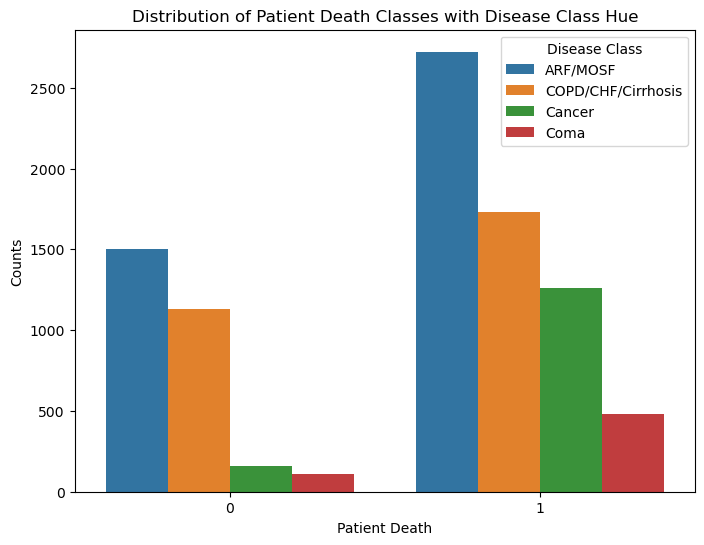

In [74]:
# Group the DataFrame by 'Patient_Death' and 'Disease_Class', counting occurrences and resetting the index
death_class_counts = df.groupby(['Patient_Death', 'Disease_Class']).size().reset_index(name='Count')

# Set up the size of the plot figure
plt.figure(figsize=(8, 6))

# Create a bar plot using Seaborn, with 'Patient_Death' on the x-axis, 'Count' on the y-axis, and 'Disease_Class' as hue
sns.barplot(data=death_class_counts, x='Patient_Death', y='Count', hue='Disease_Class')

# Add a title to the plot
plt.title('Distribution of Patient Death Classes with Disease Class Hue')

# Label the x-axis
plt.xlabel('Patient Death')

# Label the y-axis
plt.ylabel('Counts')

# Add a legend with 'Disease Class' as the title
plt.legend(title='Disease Class')

# Display the plot
plt.show()

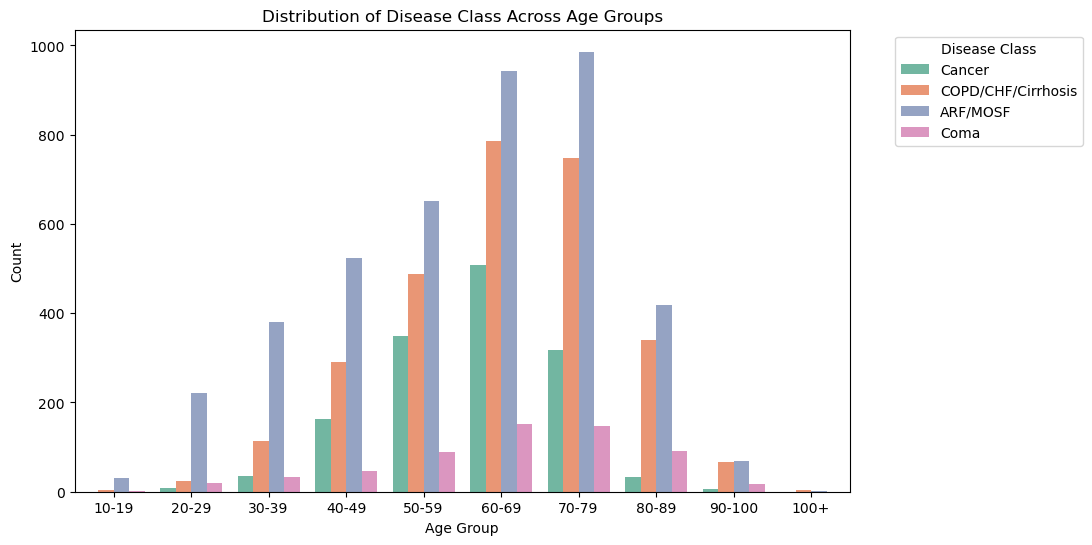

In [75]:
# Set up the size of the plot figure
plt.figure(figsize=(10, 6))

# Create a count plot using Seaborn, with 'Age_Group' on the x-axis, 'Disease_Class' as hue, and using the 'Set2' color palette
sns.countplot(x='Age_Group', hue='Disease_Class', data=df, palette='Set2')

# Add a title to the plot
plt.title('Distribution of Disease Class Across Age Groups')

# Label the x-axis
plt.xlabel('Age Group')

# Label the y-axis
plt.ylabel('Count')

# Add a legend with 'Disease Class' as the title, positioned outside the plot to the upper left
plt.legend(title='Disease Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 2:
What does the correlation map reveal about the relationships among numeric features in the dataset?

### INTERPRETATION:
- The correlation map, focusing on numeric features, unveils significant insights.
- Features like 'Total Hospital stay' and 'DNR order day' exhibit a positive correlation of 0.72, indicating a strong relationship.
- Conversely, features 'survival 2 months' and 'simplified acute physiology score' show a negative correlation of -0.76, suggesting an inverse relationship.
- The pair plot further visualizes these correlations, providing a comprehensive understanding of feature relationships.

### CONCLUSION:
- The analysis of numeric features' correlations provides valuable information for better visualizations and insights.
- Positive correlations, like that between 'Total Hospital stay' and 'DNR order day,' highlight potential dependencies.
- Negative correlations, such as between 'survival 2 months' and 'simplified acute physiology score,' indicate potential inversely related factors.
- Utilizing these insights can enhance the depth and informativeness of visualizations.


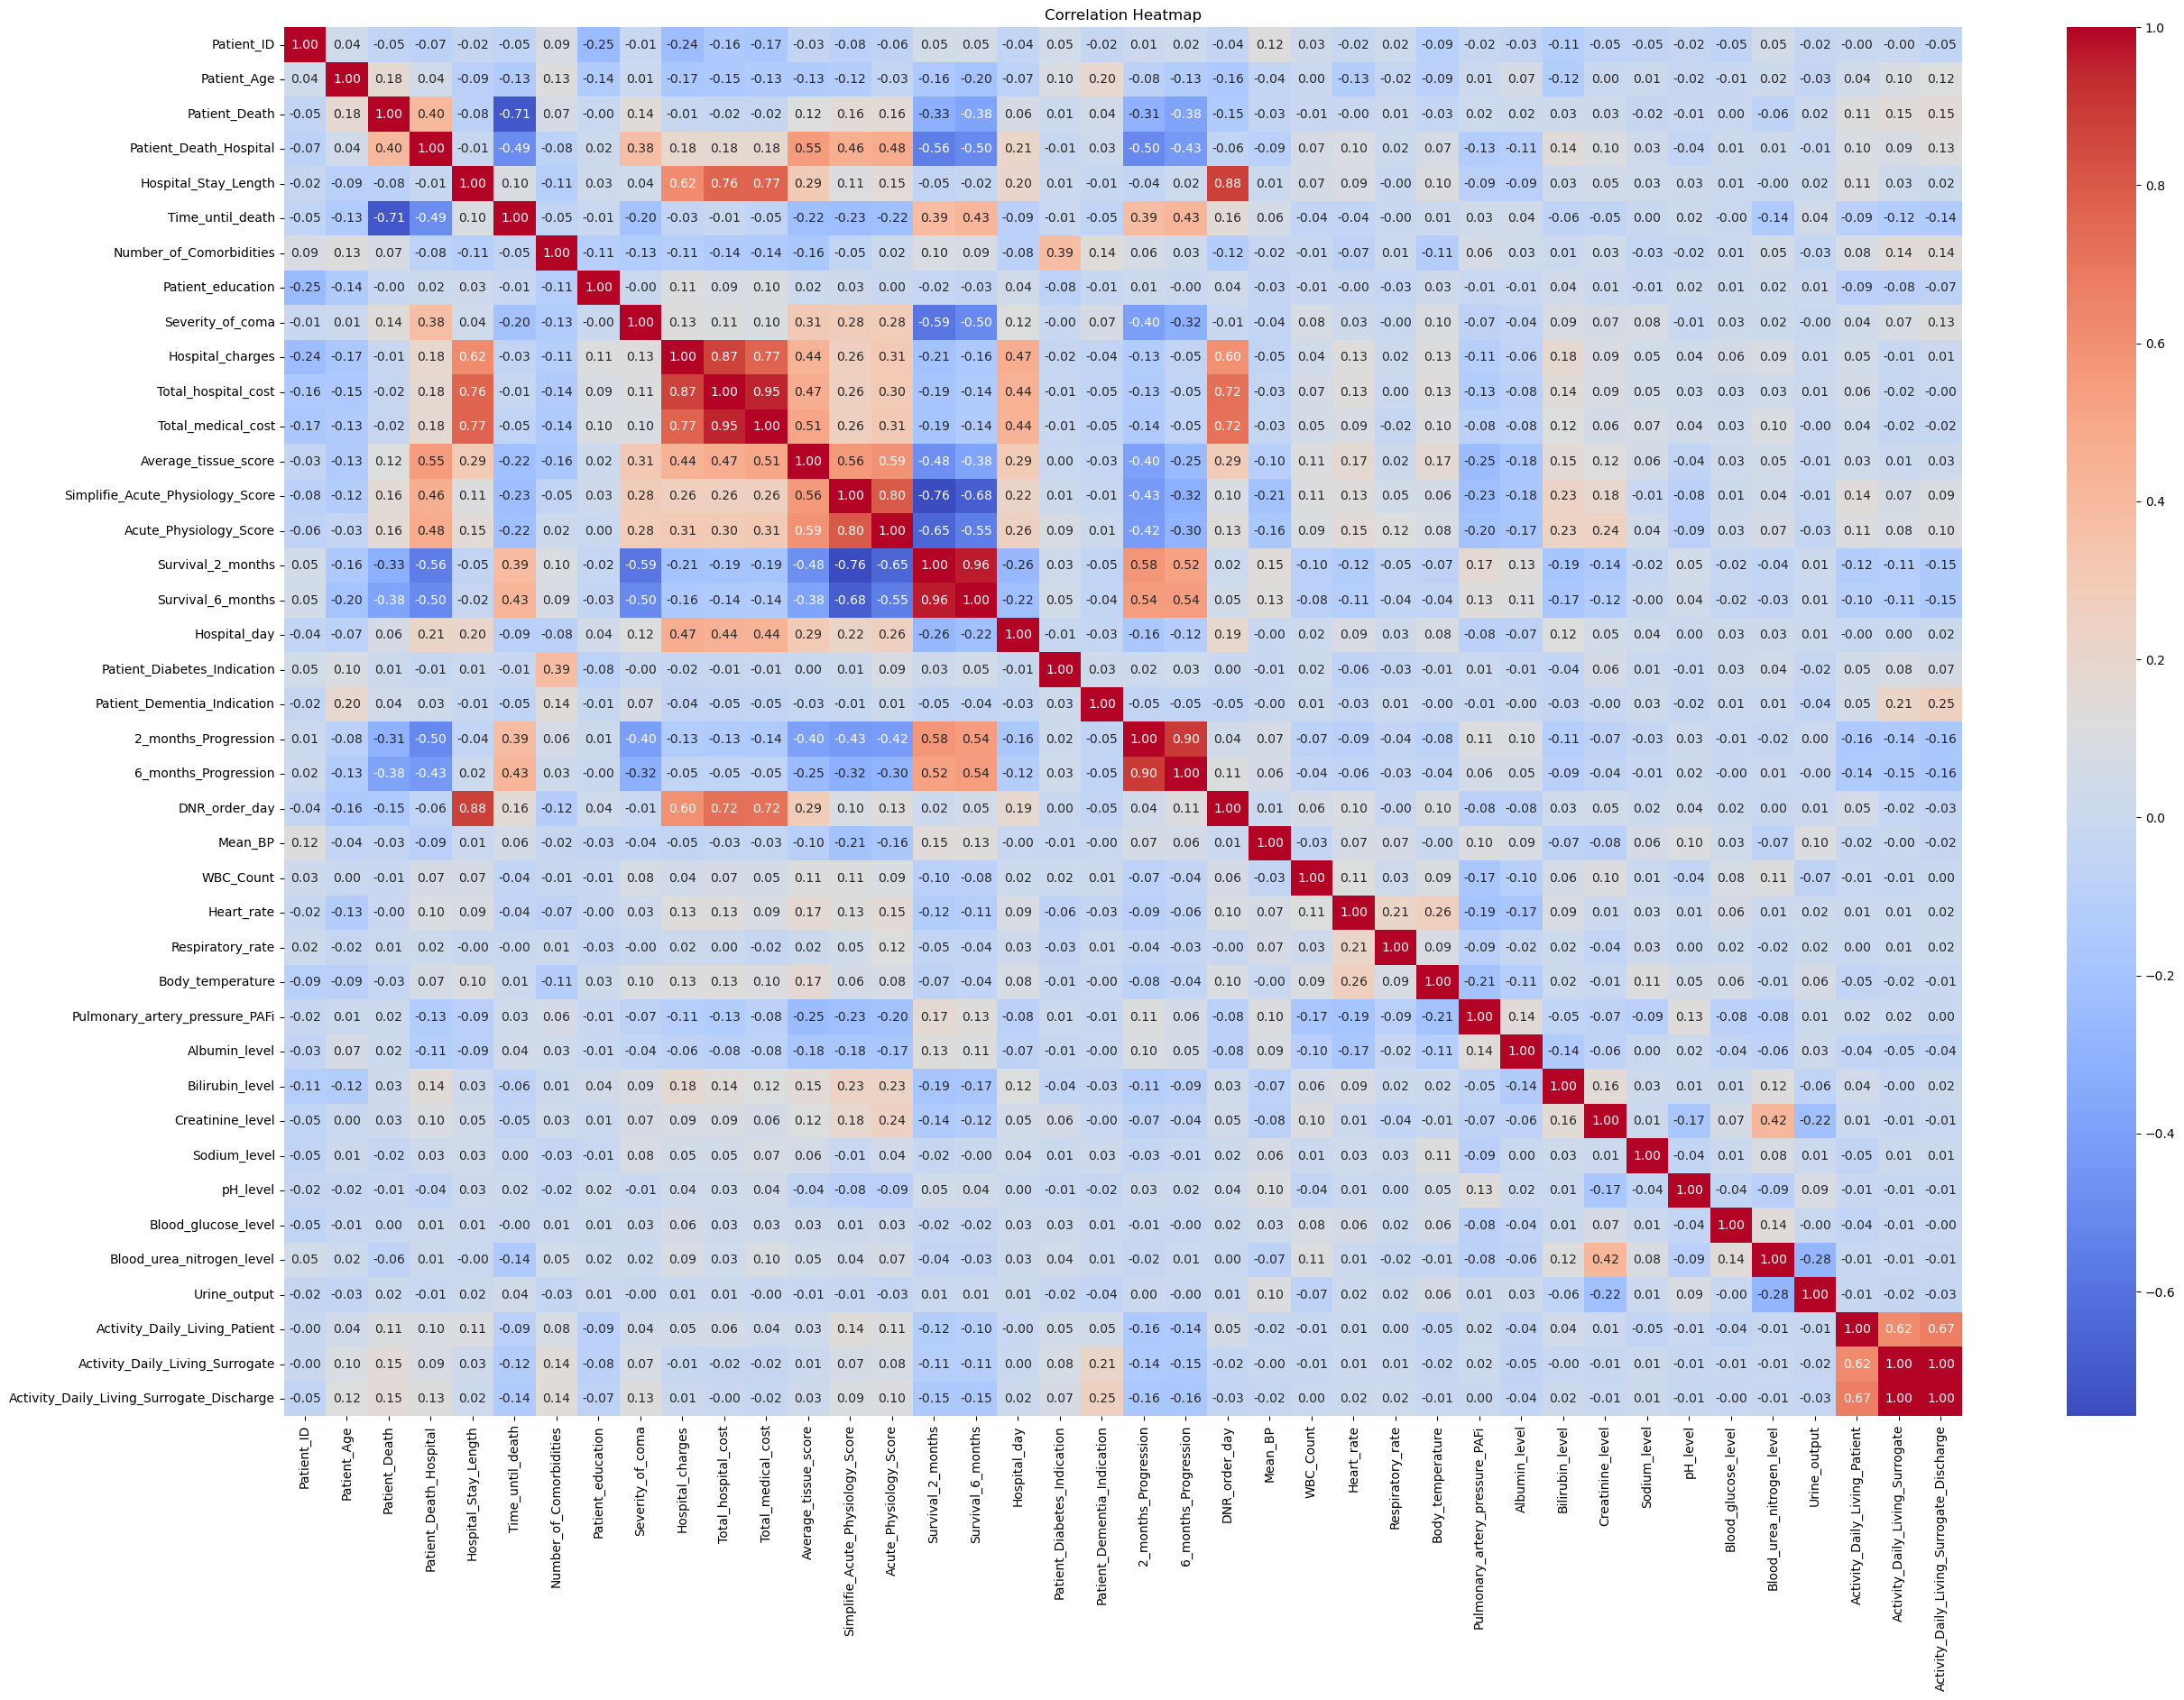

In [76]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for the numeric columns
corr_matrix = numeric_columns.corr()

# Set up the size of the plot figure
plt.figure(figsize=(30, 20))

# Create a heatmap using Seaborn, with annotations, 'coolwarm' color map, and displaying values with two decimal places
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

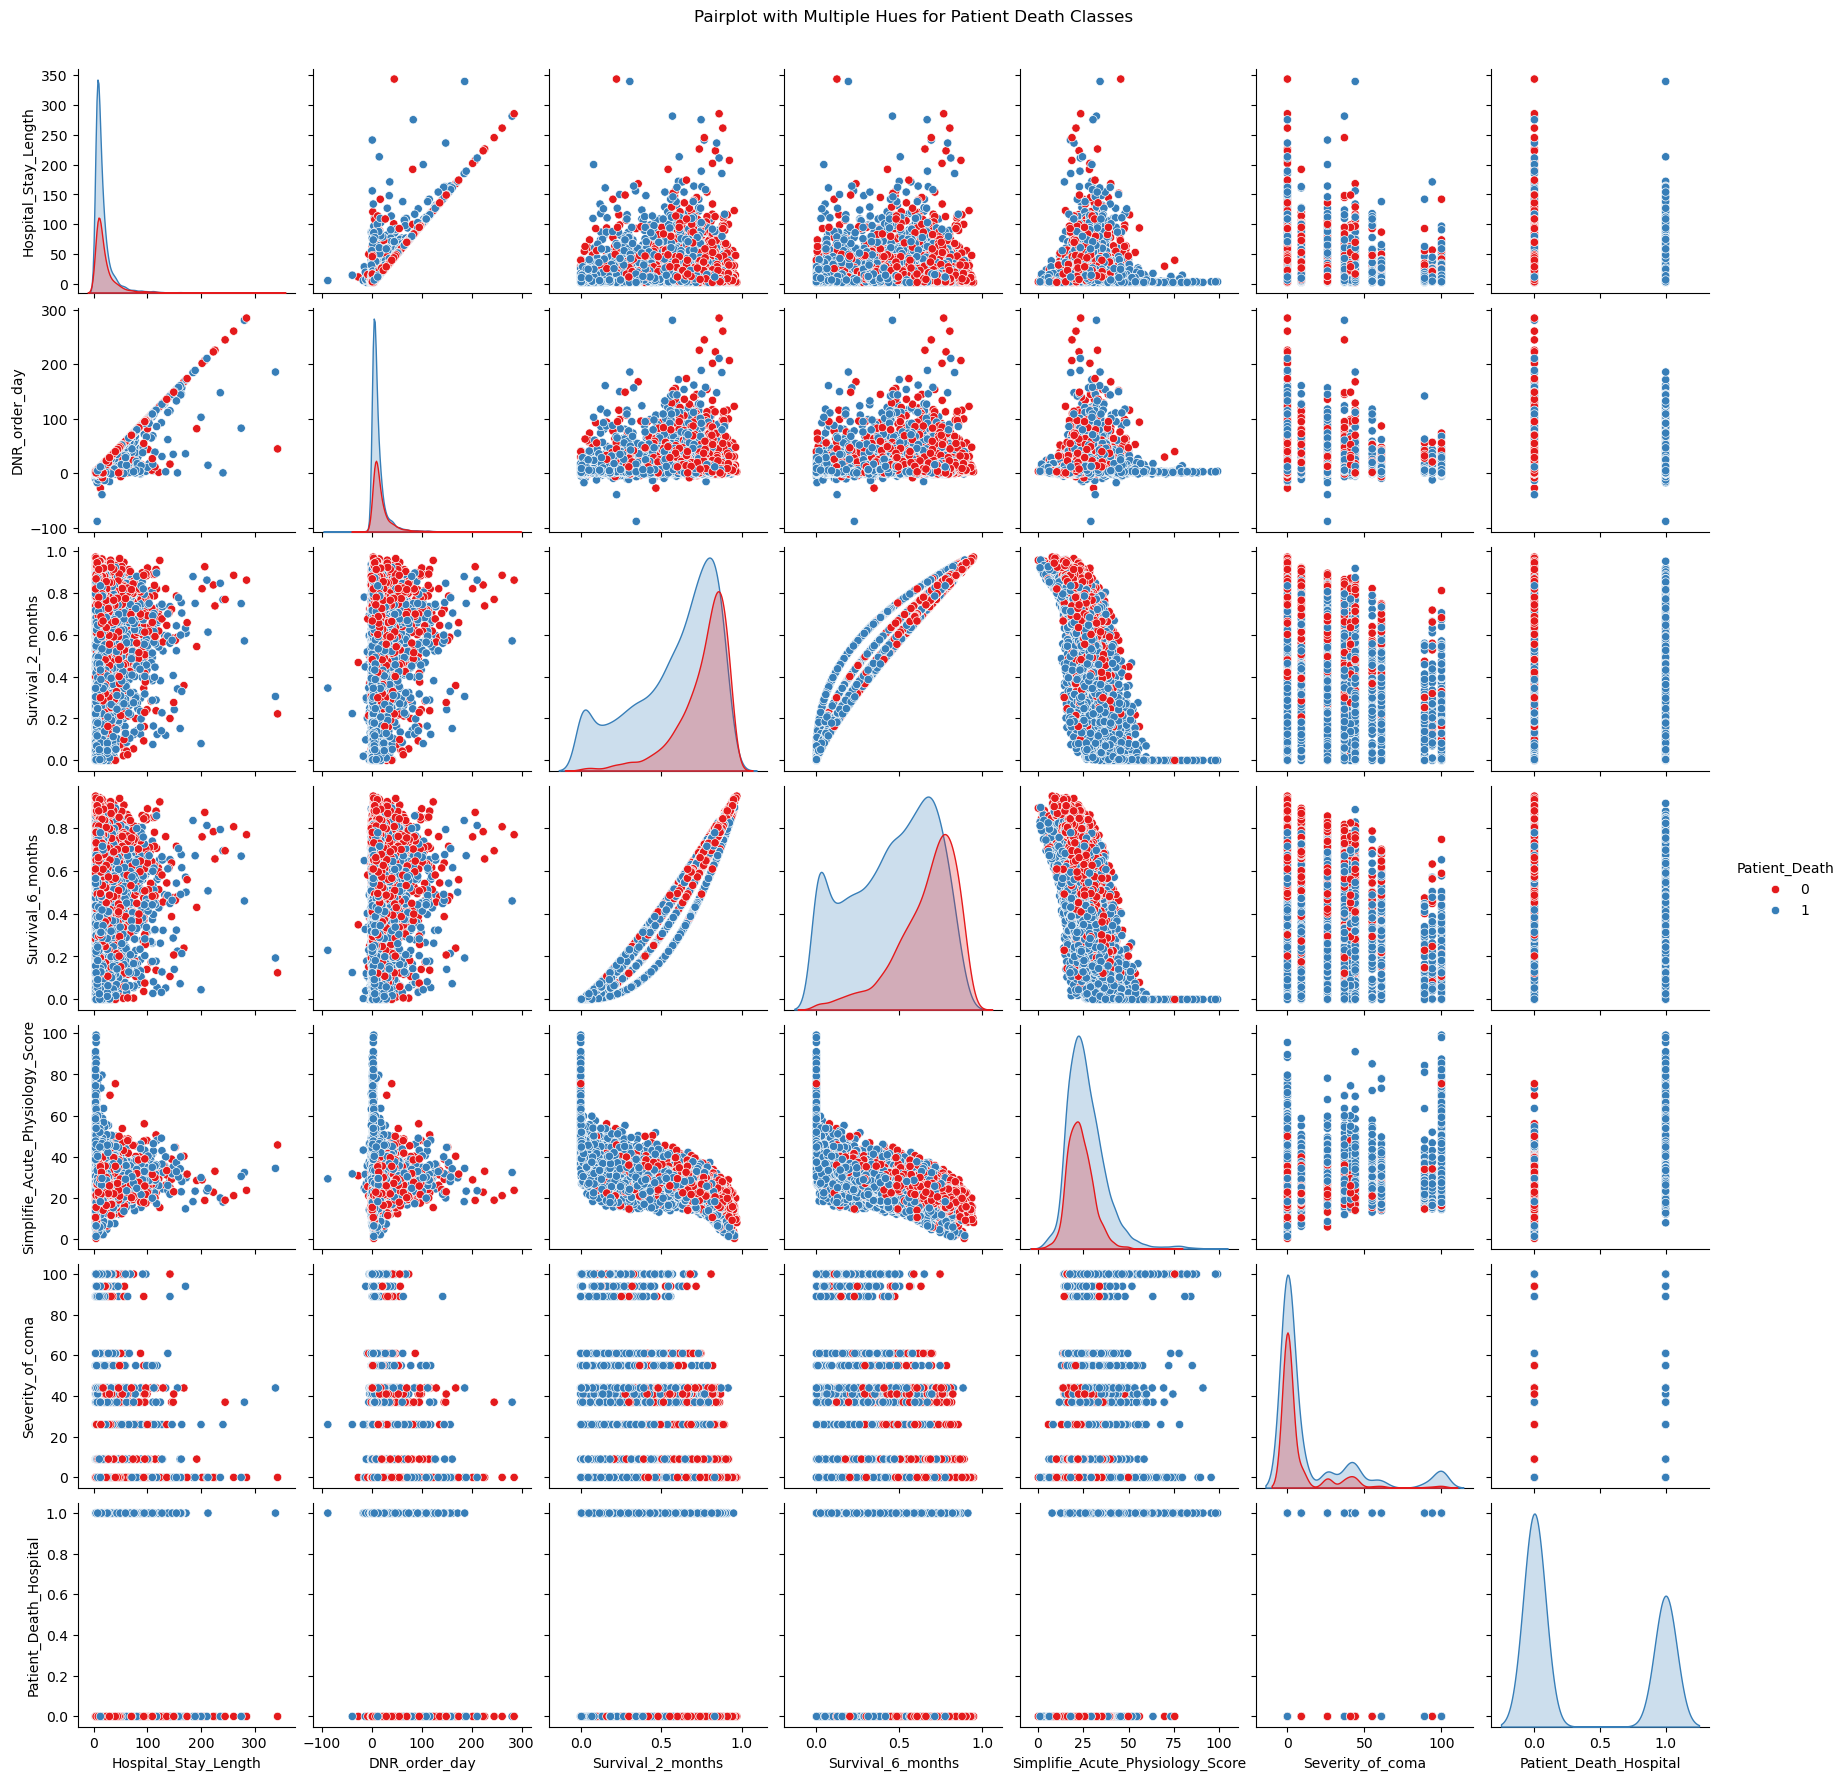

In [77]:
# List of numerical columns for the pair plot
numerical_columns = ['Hospital_Stay_Length', 'DNR_order_day', 'Survival_2_months', 'Survival_6_months',
                      'Simplifie_Acute_Physiology_Score', 'Severity_of_coma', 'Patient_Death_Hospital']

# Create a pair plot using Seaborn, with numerical columns as variables, 'Patient_Death' as hue, and 'Set1' color palette
sns.pairplot(df, vars=numerical_columns, hue='Patient_Death', palette='Set1')

# Add a title to the pair plot
plt.suptitle('Pairplot with Multiple Hues for Patient Death Classes', y=1.02)

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 3 
#### Identify the disease class associated with a higher percentage of patient deaths.

### INTERPRETATION
1. **Cancer:**
   - Among the disease classes, Cancer exhibits the highest percentage of patient deaths.
   - This finding indicates that patients classified under the "Cancer" disease class have a higher likelihood of mortality compared to other disease classes in the dataset.
   

2. **Organ Failure with Malignancy:**
   - The disease class "Organ Failure with Malignancy" also shows a substantial percentage of deaths, exceeding 80%.
   - This highlights the severity and potential fatality associated with organ failure in the context of malignancies.

### CONCLUSION
Analyzing the percentage of patient deaths across disease classes provides crucial insights into the relative severity and mortality rates associated with different medical conditions. In this dataset, Cancer and Organ Failure with Malignancy stand out as disease classes with higher percentages of patient deaths, emphasizing the need for focused attention and specialized care for patients in these categories.


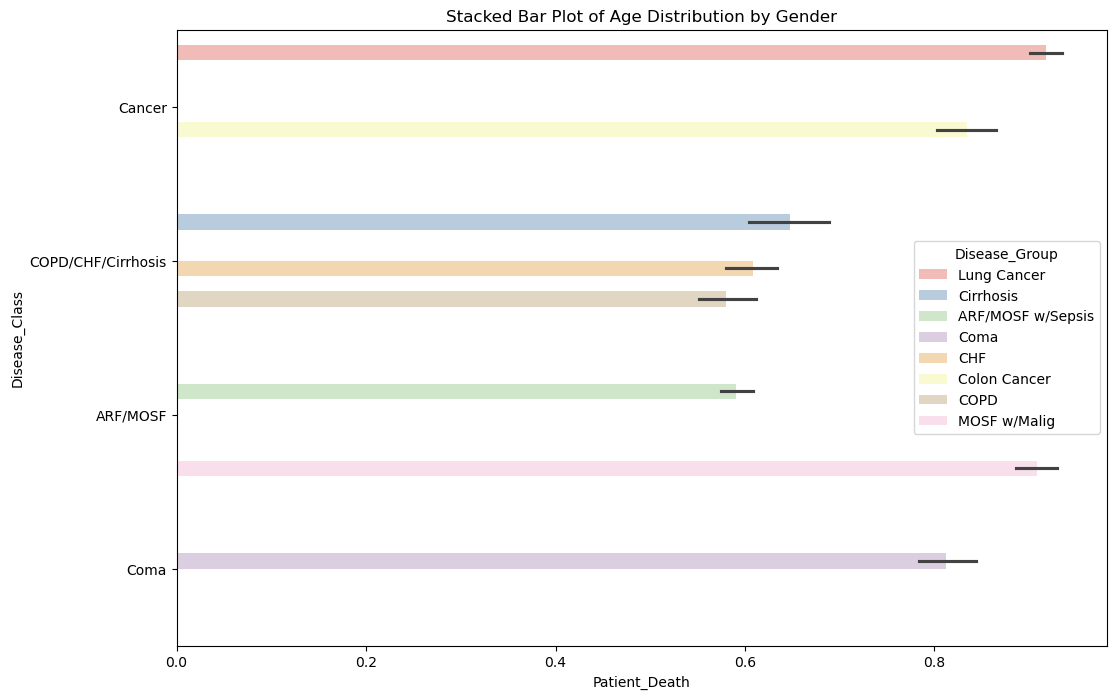

In [78]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a stacked bar plot using Seaborn, with 'Patient_Death' on the x-axis, 'Disease_Class' on the y-axis,
# different colors for each 'Disease_Group', using the 'Pastel1' color palette
sns.barplot(x='Patient_Death', y='Disease_Class', data=df, hue='Disease_Group', palette='Pastel1')

# Add a title to the plot
plt.title('Stacked Bar Plot of Age Distribution by Gender')

# Label the x-axis
plt.xlabel('Patient_Death')

# Label the y-axis
plt.ylabel('Disease_Class')

# Add a legend with 'Disease_Group' as the title
plt.legend(title='Disease_Group')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 4
#### How does patient age vary across different disease groups concerning their activity class, specifically the 2-month status?

### INTERPRETATION
1. **Colon Cancer and Coma:**
   - Patients with colon cancer do not seem to enter the coma stage, as observed in the plot.
   - In contrast, patients with lung cancer show instances of experiencing the coma stage, indicating potential differences in disease progression or severity.


2. **Cirrhosis and Age Variation:**
   - Younger patients appear to have a higher prevalence of cirrhosis, and the age generally decreases for each category in the patient activity status.
   - This suggests that cirrhosis might be more common or diagnosed at an earlier age compared to other disease groups.


3. **Pulmonary Diseases (COPD):**
   - Pulmonary diseases, such as COPD, are more prevalent in older patients, as depicted in the plot.
   - This aligns with general medical knowledge that respiratory conditions tend to be more common in the elderly population.

### CONCLUSION
The visualization of patient age across different disease groups and activity classes provides valuable insights into the relationships between age, disease types, and patient activity status. These findings can guide healthcare professionals in understanding the age demographics associated with specific diseases and tailoring treatments or interventions accordingly.


/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/3708219695.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Functional_Disability_of_the_Patient'], y='Patient_Age', data=df, hue=df['Disease_Group'],


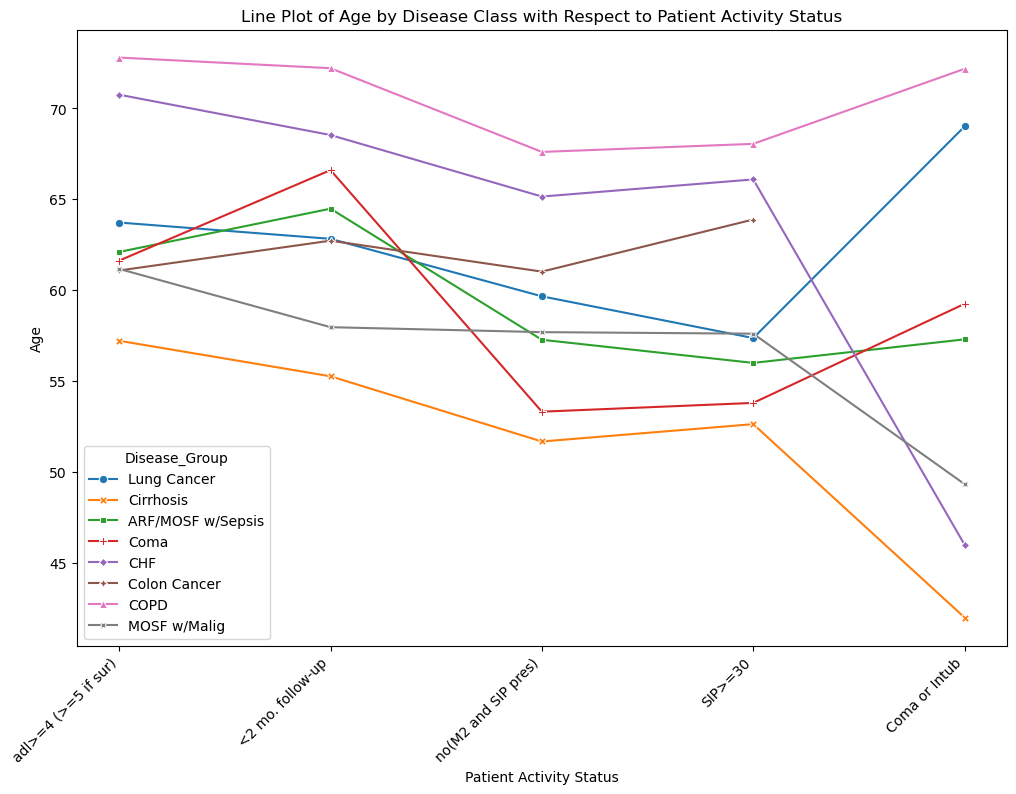

In [79]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a line plot using Seaborn, with 'Functional_Disability_of_the_Patient' on the x-axis,
# 'Patient_Age' on the y-axis, different colors for each 'Disease_Group', markers, and no error bars
sns.lineplot(x=df['Functional_Disability_of_the_Patient'], y='Patient_Age', data=df, hue=df['Disease_Group'],
             style=df['Disease_Group'], ci=None, markers=True, dashes=False)

# Add a title to the plot
plt.title('Line Plot of Age by Disease Class with Respect to Patient Activity Status')

# Label the x-axis
plt.xlabel('Patient Activity Status')

# Label the y-axis
plt.ylabel('Age')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 5
#### How does the survival probability vary in the data?

### INTERPRETATION
   - The plot indicates that patients who survive the 2-month period during treatment exhibit a higher likelihood of survival even after 6 months.
   - This suggests a positive correlation between short-term and longer-term survival probabilities, emphasizing the predictive value of the initial 2-month survival status.

### CONCLUSION
The analysis of survival probabilities at 2 months and 6 months reveals a notable correlation, indicating that patients who successfully navigate the initial 2-month treatment phase tend to have a higher probability of survival at the 6-month mark. This information is crucial for healthcare professionals in assessing and communicating prognosis to patients and their families.


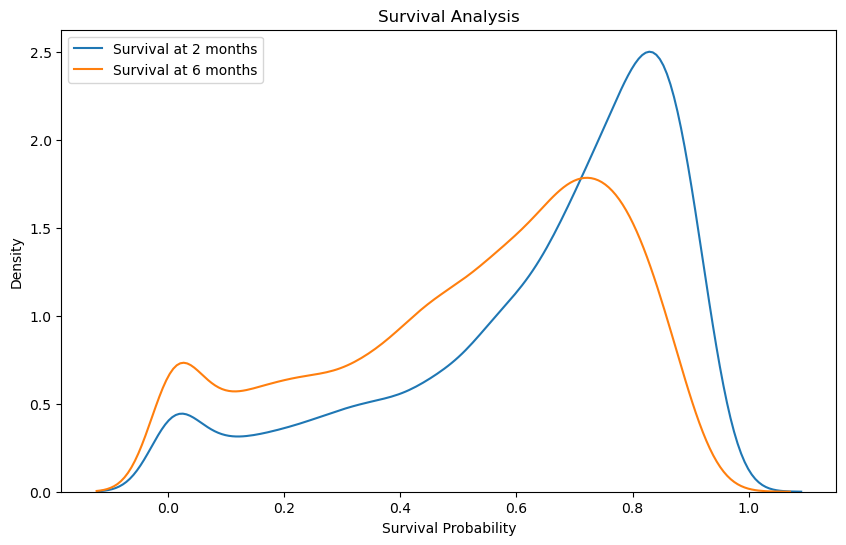

In [80]:
# Set up the size of the plot figure
plt.figure(figsize=(10, 6))

# Create a kernel density plot (KDE) for 'Survival_2_months' with label
sns.kdeplot(data=df, x=df['Survival_2_months'], label='Survival at 2 months')

# Create a kernel density plot (KDE) for 'Survival_6_months' with label
sns.kdeplot(data=df, x=df['Survival_6_months'], label='Survival at 6 months')

# Add a title to the plot
plt.title('Survival Analysis')

# Label the x-axis
plt.xlabel('Survival Probability')

# Label the y-axis
plt.ylabel('Density')

# Add a legend to differentiate between the two survival periods
plt.legend()

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 6
#### Visualize the activity distribution in the data and measure the Blood Urea Nitrogen (BUN) level for all the activity classes and report the findings.

### INTERPRETATION
1. **Activity Distribution:**
   - The pie chart depicting Activity distribution in the data reveals that only 0.9% of patients are in a coma, indicating a relatively low occurrence of this activity status in the dataset.
   - Other activity classes, such as alive, expired, and others, have more significant representation, providing an overview of the distribution of patients across different activity statuses.


2. **Blood Urea Nitrogen (BUN) Level:**
   - The bar plot representing the mean Blood Urea Nitrogen (BUN) level for each activity class demonstrates that patients in a coma have the highest average BUN level.
   - This finding suggests a potential correlation between the coma activity status and elevated BUN levels, possibly attributed to the loss of control over bowel movements in coma patients.


### CONCLUSION
The analysis of Activity distribution and Blood Urea Nitrogen (BUN) levels provides insights into the prevalence of different activity statuses and their potential impact on physiological markers. The higher BUN levels observed in coma patients underscore the importance of considering activity status when assessing biochemical indicators, contributing valuable information for healthcare professionals in patient care and monitoring.


/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/1918629049.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_bun_by_func_dis.index, y=average_bun_by_func_dis, ax=ax2, palette='Set2')
/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/1918629049.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels


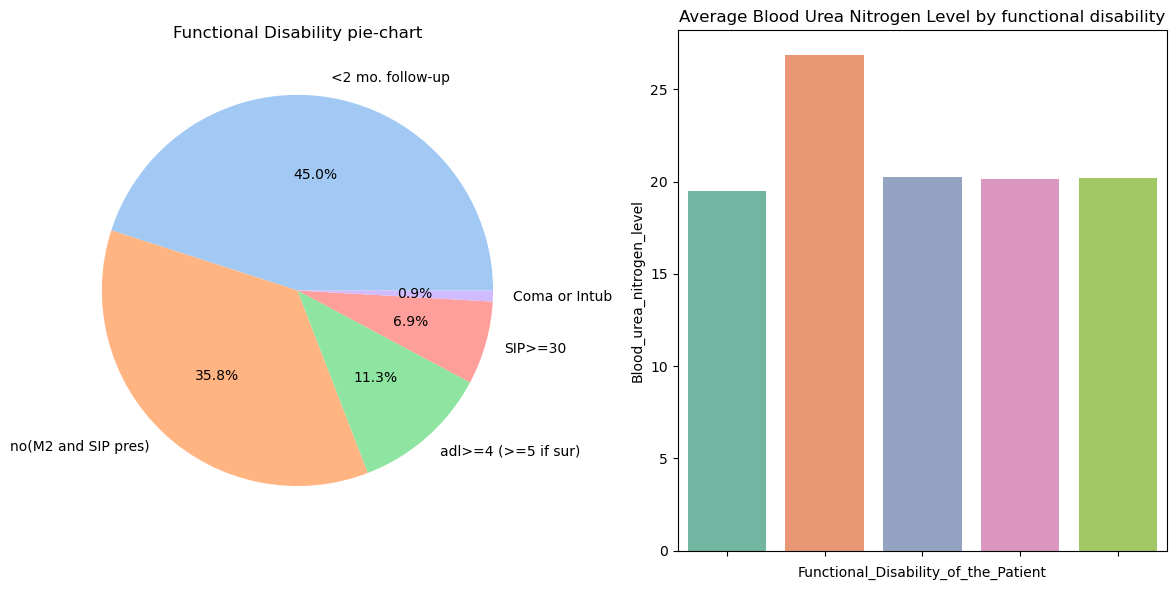

In [81]:
# Calculate gender distribution
functional_disability = df['Functional_Disability_of_the_Patient'].value_counts()

# Calculate average age by gender
average_bun_by_func_dis = df.groupby('Functional_Disability_of_the_Patient')['Blood_urea_nitrogen_level'].mean()

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a pie chart for gender distribution in the first subplot
ax1.pie(functional_disability, labels=functional_disability.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax1.set_title('Functional Disability pie-chart')
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels (commented out)

# Create a bar plot for average age by gender in the second subplot
sns.barplot(x=average_bun_by_func_dis.index, y=average_bun_by_func_dis, ax=ax2, palette='Set2')
ax2.set_title('Average Blood Urea Nitrogen Level by functional disability')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 7
#### Visualize the Disease group for the functional status of the patient and report the findings.

### INTERPRETATION
1. **Functional Status Distribution:**
   - The countplot provides insights into the distribution of Disease groups concerning the functional status of patients.
   - Multiple Organ System Failure appears to have the highest count of patients who have passed away before the 2-month mark, indicating a significant association with unfavorable outcomes.


2. **CHF (Congestive Heart Failure):**
   - Interestingly, patients reported for Congestive Heart Failure (CHF) show no instances of sickness reported, suggesting potential variations in reporting or data collection for this specific disease group.


### CONCLUSION
The visualization of Disease groups concerning the functional status of patients reveals patterns and variations across different diseases. Multiple Organ System Failure stands out with a higher count of patients who have passed away, emphasizing the severity of this condition. The absence of reported sickness for patients with Congestive Heart Failure (CHF) warrants further investigation into data accuracy and reporting practices for this particular disease group.


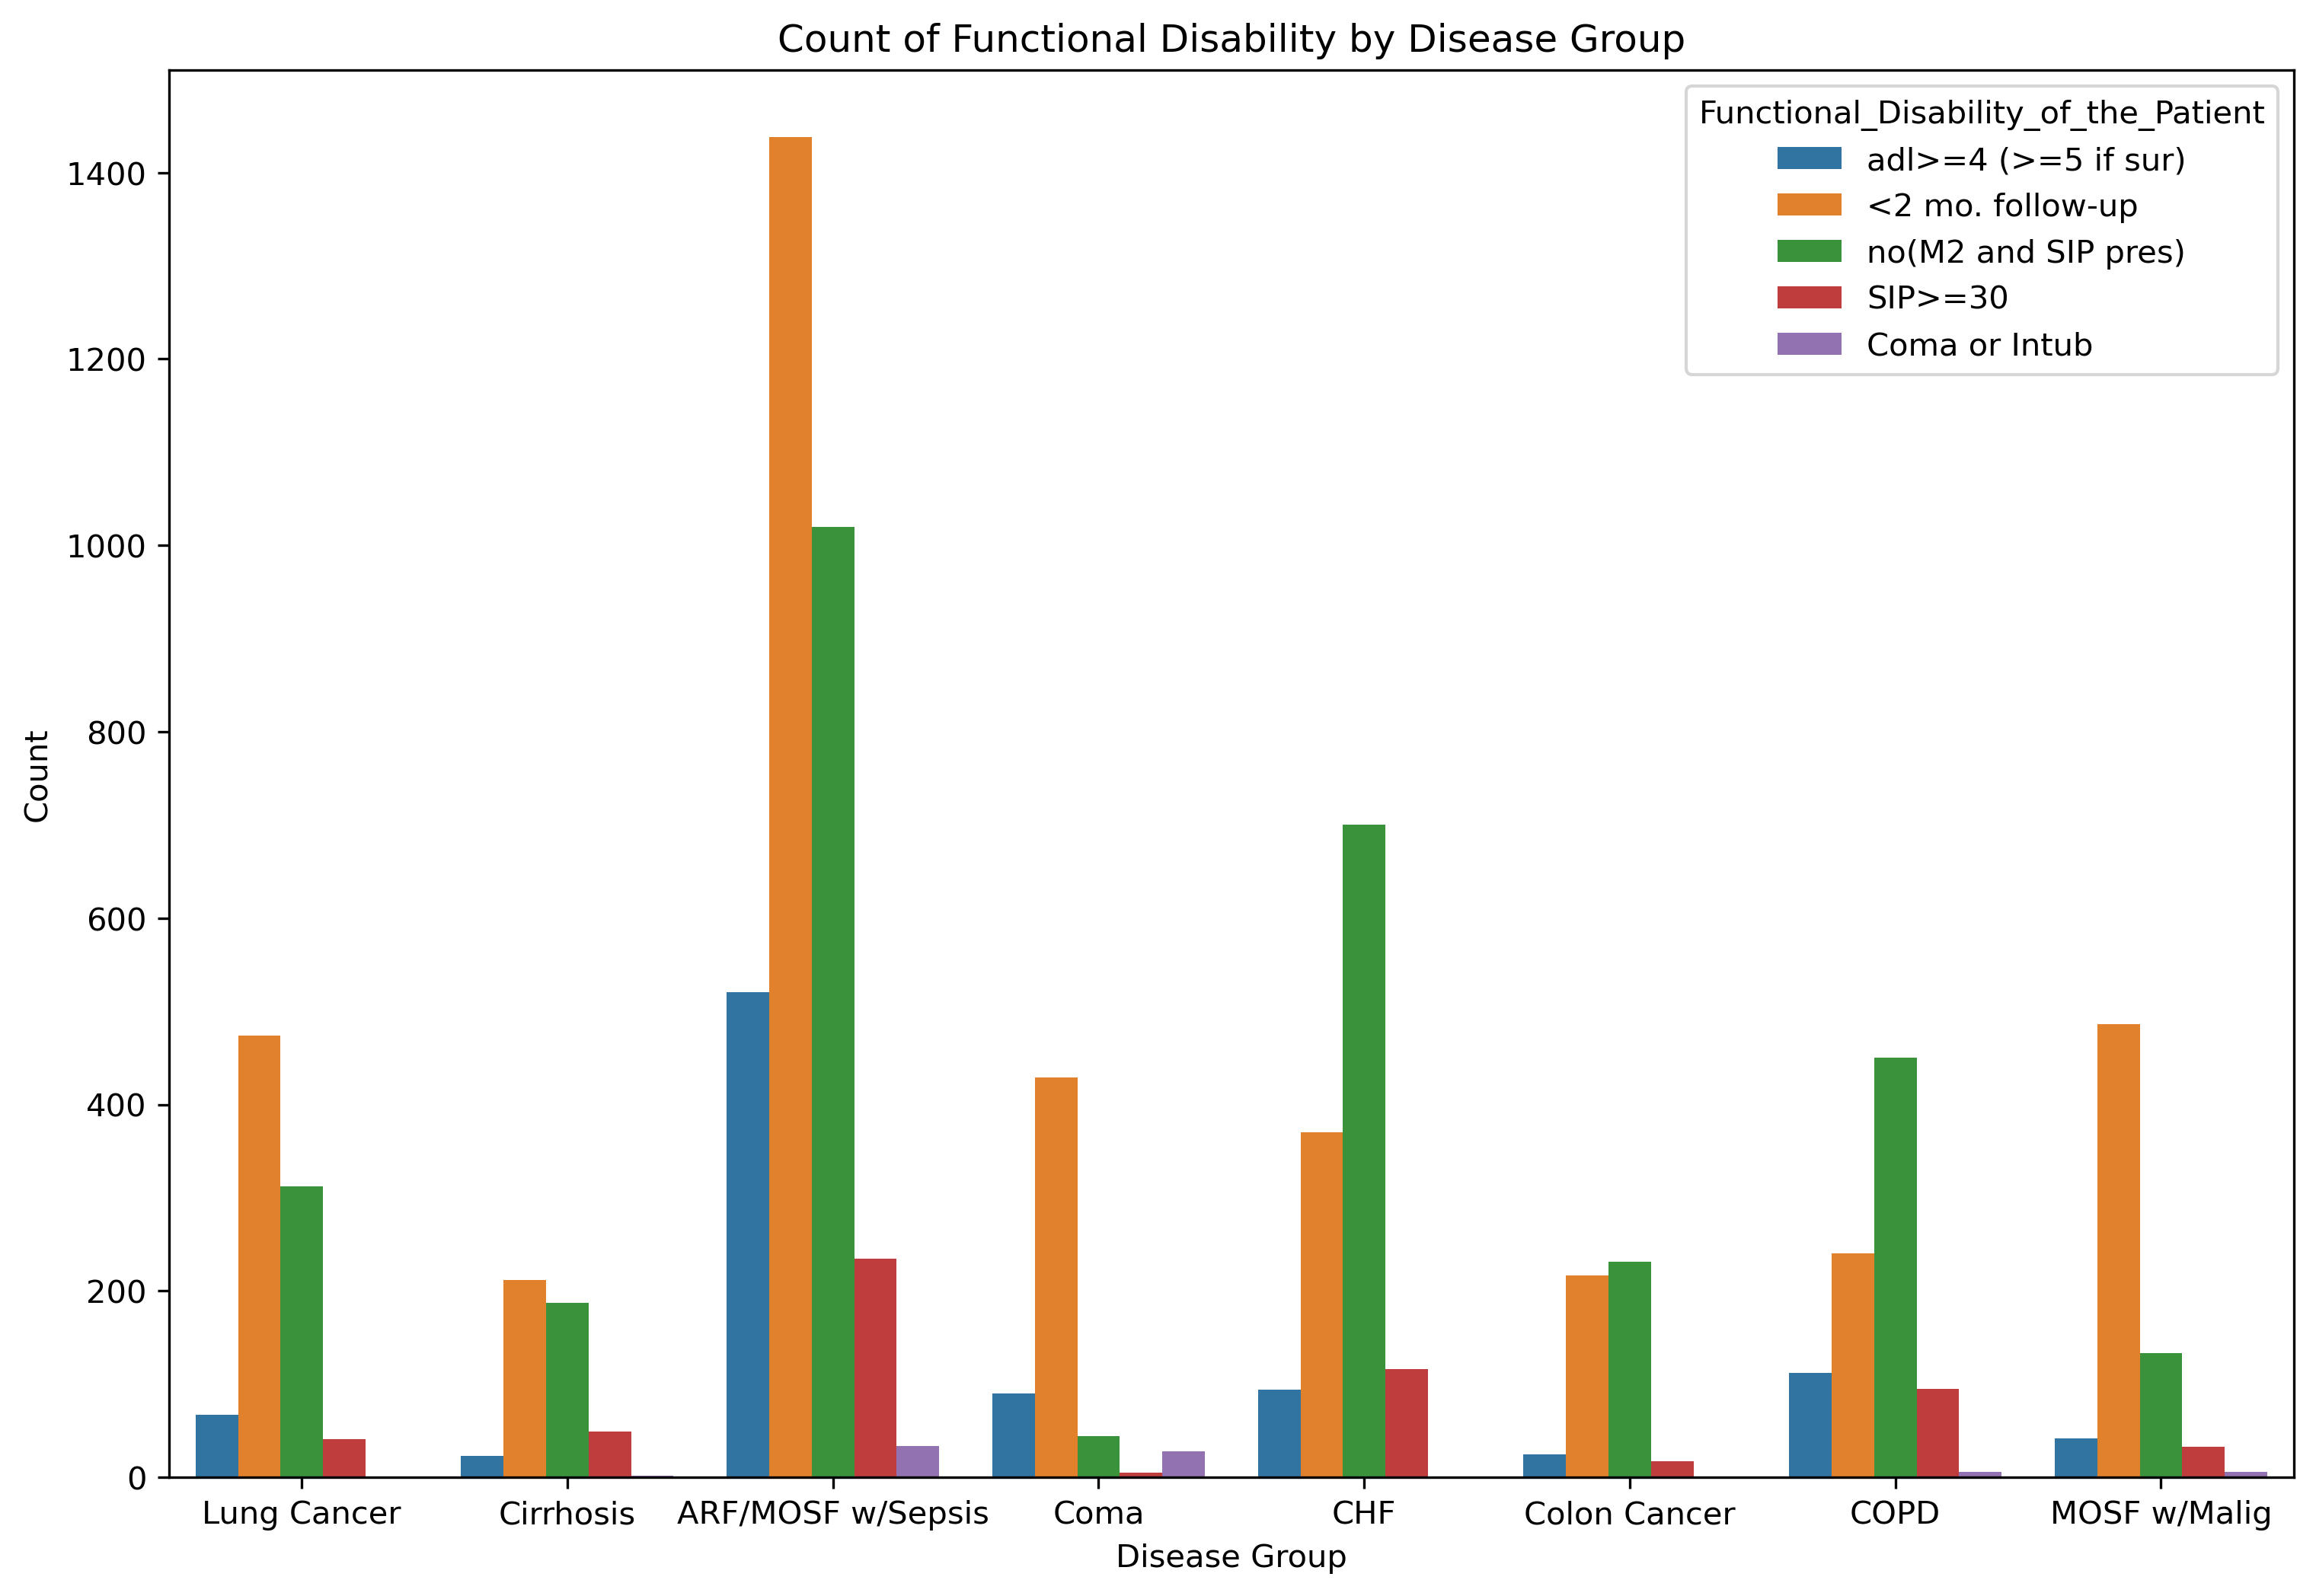

In [82]:
# Set up the size and dpi of the plot figure
plt.figure(figsize=(12, 8), dpi=300)

# Create a count plot using Seaborn, with 'Disease_Group' on the x-axis,
# 'Functional_Disability_of_the_Patient' as hue
sns.countplot(data=df, x=df['Disease_Group'], hue=df['Functional_Disability_of_the_Patient'])

# Add a title to the plot
plt.title('Count of Functional Disability by Disease Group')

# Label the x-axis
plt.xlabel('Disease Group')

# Label the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 8
How does the number of comorbidities vary across different disease groups, and which disease group exhibits the highest and lowest numbers of comorbidities?

### INTERPRETATION
1. **Disease Group Comparison:**
   - The bar graph illustrates the distribution of comorbidities across various disease groups, providing a clear comparison of the number of comorbidities associated with each group.
   - Chronic Heart Failure (CHF) stands out as the disease group with the highest number of comorbidities, while cirrhosis shows a slightly lower count.
   

2. **Variability in Comorbidities:**
   - Notably, colon cancer and coma appear to have significantly fewer comorbidities compared to other disease groups, as evidenced by the lower bars on the graph.
   

### CONCLUSION
The bar graph effectively communicates the variation in the number of comorbidities among different disease groups. CHF emerges as the disease group with the highest comorbidity count, suggesting a more complex medical profile for patients in this category. Conversely, colon cancer and coma exhibit lower comorbidity numbers, indicating potentially less complexity in terms of additional health conditions. These insights are valuable for healthcare professionals in understanding the comorbidity landscape across specific disease groups, aiding in treatment planning and patient care strategies.

/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/2613110961.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Disease_Group', y='Number_of_Comorbidities', data=df, ci=None, hue='Disease_Group')


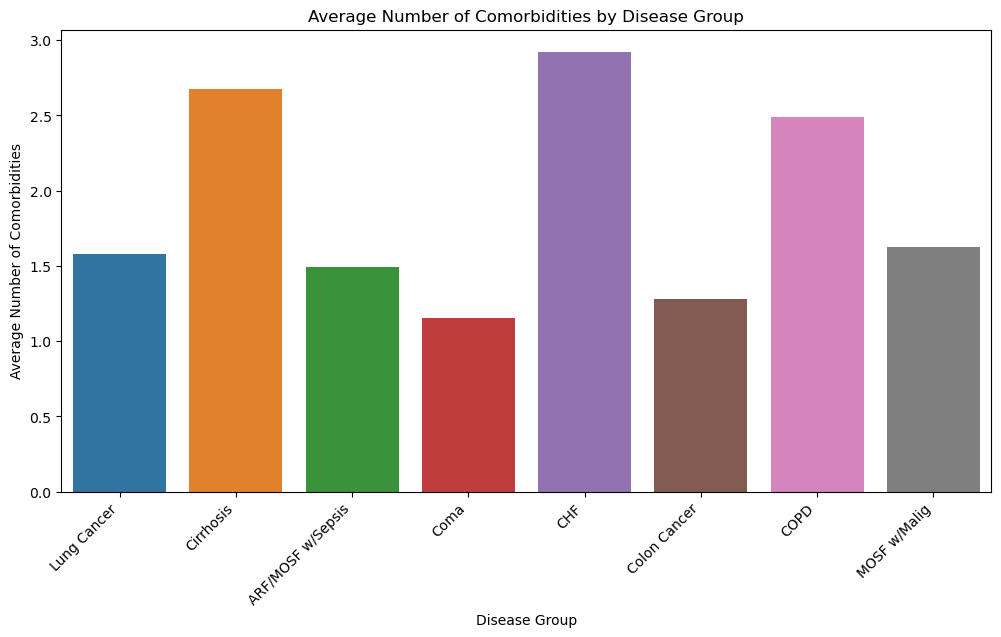

In [83]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 6))

# Create a bar plot using Seaborn, with 'Disease_Group' on the x-axis,
# 'Number_of_Comorbidities' on the y-axis, no error bars, and different colors for each 'Disease_Group'
sns.barplot(x='Disease_Group', y='Number_of_Comorbidities', data=df, ci=None, hue='Disease_Group')

# Add a title to the plot
plt.title('Average Number of Comorbidities by Disease Group')

# Label the x-axis
plt.xlabel('Disease Group')

# Label the y-axis
plt.ylabel('Average Number of Comorbidities')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 9
Is there a significant correlation between the age of patients, the length of hospital stay, and the total medical cost based on the 3D scatter plot observations?

### INTERPRETATION
1. **Multivariate Relationship:**
   - The 3D scatter plot provides a visual representation of the distribution of patients based on age, hospital stay length, and total medical cost.
   - A noticeable trend suggests that for some patients, higher medical costs correspond to both advanced age and an extended duration of hospital stay.
   

2. **Direct Proportionality:**
   - The observation highlights a potential direct proportionality between hospital stay length and total medical cost, particularly for certain age groups.
   - Patients with longer hospital stays tend to incur higher medical costs, indicating a possible correlation between these variables.
   

### CONCLUSION
The 3D scatter plot reveals a compelling relationship between the age of patients, the length of their hospital stay, and the total medical cost. The observed direct proportionality suggests that, for specific age groups, an increase in the number of days spent in the hospital corresponds to higher medical expenses. Further statistical analysis, such as correlation coefficients or regression modeling, is recommended to quantify and validate these relationships. This information can be valuable for healthcare providers and administrators in understanding cost patterns and making informed decisions related to patient care and resource allocation.

In summary, **mpl_toolkits.mplot3d** [(Matplotlib, 2019)](#1) extends Matplotlib's capabilities to include 3D plotting[(Matplotlib, 2020)](#2), offering a valuable tool for visualizing data in three dimensions, which can be particularly useful for conveying complex relationships and patterns in your reports.

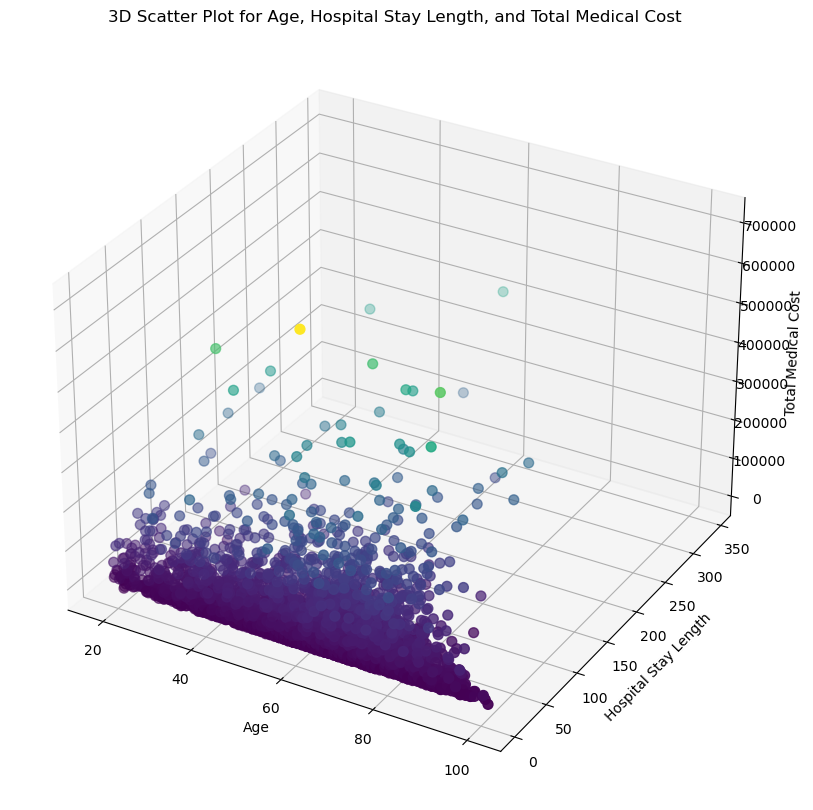

In [84]:
# Import necessary module for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Set up the size of the 3D plot figure
fig = plt.figure(figsize=(12, 10))

# Create a subplot with 3D projection
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot using Age, Hospital Stay Length, and Total Medical Cost
# Color points based on Total Medical Cost and use the 'viridis' colormap
# Adjust point size using 's=50'
ax.scatter(df['Patient_Age'], df['Hospital_Stay_Length'], df['Total_medical_cost'], c=df['Total_medical_cost'], cmap='viridis', s=50)

# Label the x-axis
ax.set_xlabel('Age')

# Label the y-axis
ax.set_ylabel('Hospital Stay Length')

# Label the z-axis
ax.set_zlabel('Total Medical Cost')

# Add a title to the plot
ax.set_title('3D Scatter Plot for Age, Hospital Stay Length, and Total Medical Cost')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 10
#### Why is the ARF/MOSF/Sepsis disease more prevalent among the observed population compared to other disease groups?

### INTERPRETATION
1. **Sepsis Widespread Occurrence:**
   - Sepsis, a component of the ARF/MOSF/Sepsis disease group, is known for its widespread occurrence and can result from various infections.
   - The higher percentage of ARF/MOSF/Sepsis may be attributed to the increased susceptibility of the population to infections, contributing to a higher incidence of sepsis.


2. **Complexity and Severity of ARF/MOSF:**
   - The complexity and severity of Acute Renal Failure (ARF) and Multi-Organ System Failure (MOSF) may contribute to their prominence in the dataset.
   - These conditions might be more prevalent or diagnosed more frequently, leading to an elevated percentage in the observed population.


### CONCLUSION
The higher prevalence of ARF/MOSF/Sepsis disease among the observed population can be attributed to a combination of factors, including the widespread occurrence of sepsis and the complexity/severity of ARF and MOSF. Further analysis of demographic and health-related variables is necessary to gain a comprehensive understanding of the underlying reasons for the prominence of this disease group in the dataset.



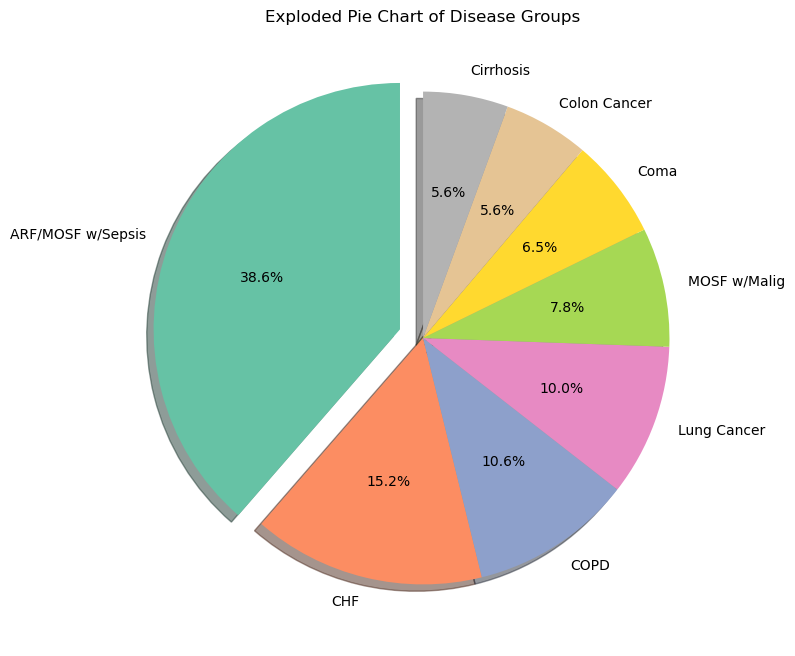

In [85]:
# Count occurrences of each Disease Group
counts = df['Disease_Group'].value_counts()

# Generate colors from the 'Set2' color palette for each Disease Group
colors = sns.color_palette("Set2")[0:len(counts)]

# Set explode values to create an exploded effect for the first slice
explode = [0.1 if i == 0 else 0 for i in range(len(counts))]

# Set up the size of the pie chart figure
plt.figure(figsize=(8, 8))

# Create an exploded pie chart using Matplotlib
plt.pie(counts, labels=counts.index, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True, colors=colors)

# Add a title to the pie chart
plt.title('Exploded Pie Chart of Disease Groups')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 11
#### What does the comparison between the donut charts for disease classes in males and females reveal about the prevalence of Sepsis/MOSF w/ARF in the dataset?

### INTERPRETATION
1. **Gender Discrepancy in Prevalence:**
   - The donut charts comparing disease classes in males and females indicate a notable difference in the prevalence of Sepsis/MOSF w/ARF.
   - In the female population, this disease class accounts for the highest proportion at 40%, whereas in males, it is slightly lower at 37.5%.


2. **Potential Gender-Specific Factors:**
   - The variation in prevalence could involve gender-specific health vulnerabilities, hormonal influences, or varying responses to certain medical conditions.
   - The higher prevalence in females might be influenced by factors that make them more susceptible to or more frequently diagnosed with Sepsis/MOSF w/ARF.


### CONCLUSION
The comparison between donut charts for disease classes in males and females reveals a gender-related difference in the prevalence of Sepsis/MOSF w/ARF. This insight suggests the need for further investigation into gender-specific factors contributing to the observed variation in disease prevalence in the dataset.


/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/1266258746.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  outer_circle = plt.Circle((0, 0), 0.7, color='white', edgecolor='black', linewidth=2, fill=False)


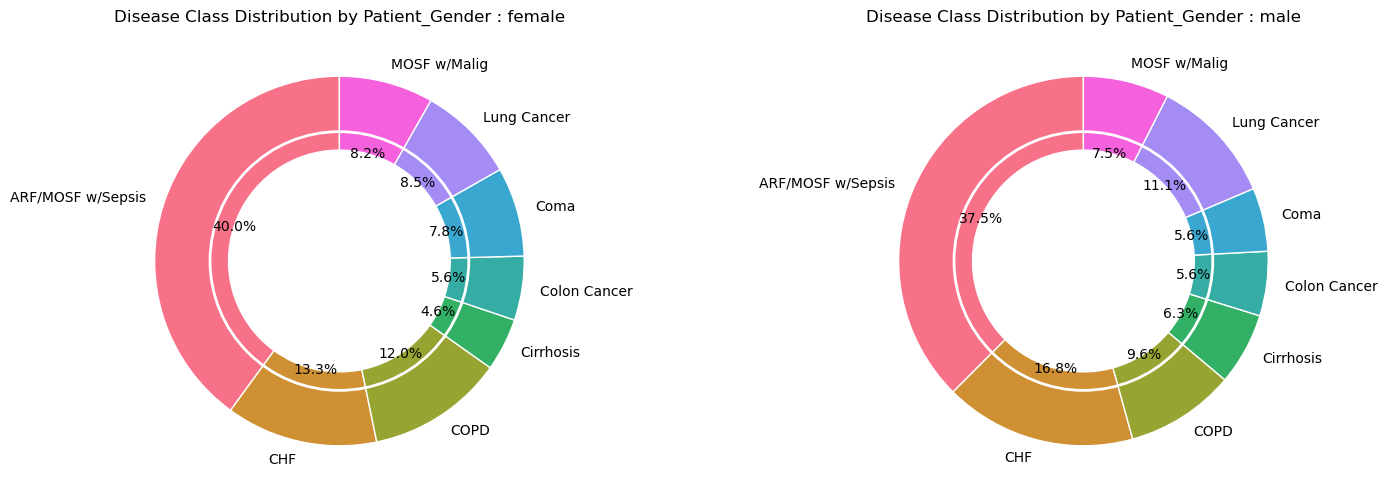

In [86]:
# Specify the inner and outer columns for grouping
inner_column = 'Patient_Gender'
outer_column = 'Disease_Group'

# Group the data by both inner and outer columns and create a DataFrame with counts
df_counts = df.groupby([inner_column, outer_column]).size().unstack().fillna(0)

# Define color palettes for inner and outer categories
inner_palette = sns.color_palette("husl", n_colors=len(df_counts.columns))
outer_palette = sns.color_palette("Set3", n_colors=len(df_counts.index))

# Set up the figure and axis for subplots
fig, axs = plt.subplots(1, len(df_counts.index), figsize=(16, 6), subplot_kw=dict(aspect="equal"))

# Iterate over each outer label
for outer_index, (outer_label, outer_row) in enumerate(df_counts.iterrows()):
    # Plot the pie chart for each outer label
    axs[outer_index].pie(outer_row, labels=outer_row.index, autopct='%1.1f%%', startangle=90,
                         wedgeprops=dict(width=0.4, edgecolor='w'), radius=1.0, colors=inner_palette)

    # Draw the outer circle to create a donut chart effect
    outer_circle = plt.Circle((0, 0), 0.7, color='white', edgecolor='black', linewidth=2, fill=False)
    axs[outer_index].add_artist(outer_circle)

    # Set the title for each subplot
    axs[outer_index].set_title(f'Disease Class Distribution by {inner_column} : {outer_label}', fontsize=12)

# Adjust layout to add space between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION  12
#### What is the distribution of cancer and metastatic cancer stages among males and females, and how does it compare between the two genders?

### INTERPRETATION
- The bidirectional bar **Graph A** indicates that a higher number of both males and females are not suffering from cancer. However, upon closer examination, it becomes evident that the count of males without cancer is notably higher than females.
- Furthermore, the graph suggests that the metastatic cancer stage is more prevalent among males compared to females.
- In bidirectional bar **Graph B**, it is observed that the count of males is higher across all 8 disease groups. Particularly, the disease group ARF/MOSF/Sepsis stands out as having the highest count for both males and females.

### CONCLUSION
- The higher count of males without cancer suggests a potential gender-based difference in cancer prevalence.
- The increased occurrence of metastatic cancer stages in males raises questions about potential gender-specific risk factors or variations in healthcare seeking behavior.
- The consistently higher count of males across various disease groups in bidirectional bar graph B may indicate a gender-related pattern in disease susceptibility, with ARF/MOSF/Sepsis showing prominence for both genders. Further investigations are warranted to explore these observed gender disparities in health outcomes.

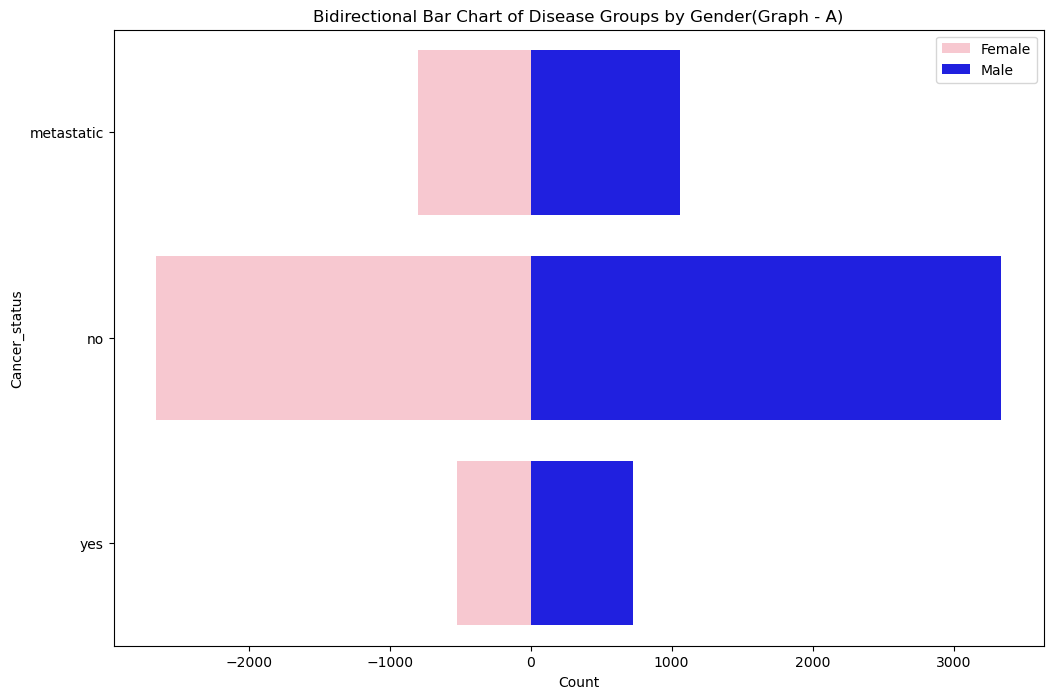

In [87]:
# Group the data by 'Cancer_status' and 'Patient_Gender', and create a DataFrame with counts
df_counts = df.groupby(['Cancer_status', 'Patient_Gender']).size().unstack().fillna(0)

# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a bidirectional bar chart using Seaborn, with 'female' counts in pink and 'male' counts in blue
sns.barplot(x=-df_counts['female'], y=df_counts.index, color='pink', label='Female', orient='h')
sns.barplot(x=df_counts['male'], y=df_counts.index, color='blue', label='Male', orient='h')

# Label the x-axis
plt.xlabel('Count')

# Add a title to the plot
plt.title('Bidirectional Bar Chart of Disease Groups by Gender(Graph - A)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

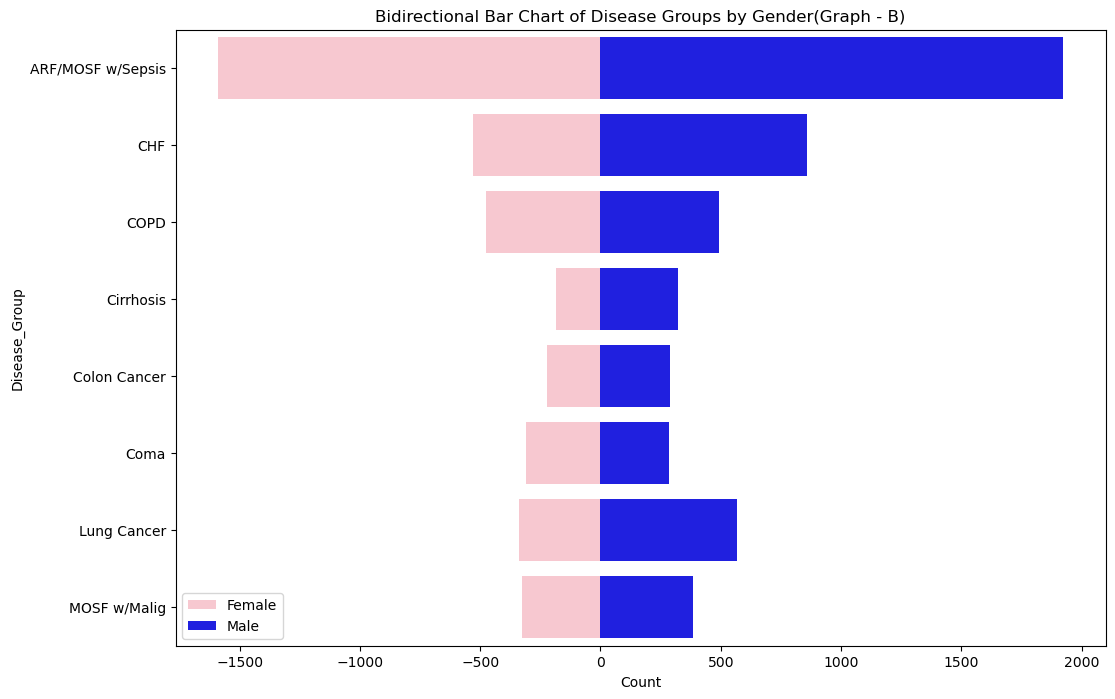

In [88]:
# Group the data by 'Disease_Group' and 'Patient_Gender', and create a DataFrame with counts
df_counts = df.groupby(['Disease_Group', 'Patient_Gender']).size().unstack().fillna(0)

# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a bidirectional bar chart using Seaborn, with 'female' counts in pink and 'male' counts in blue
sns.barplot(x=-df_counts['female'], y=df_counts.index, color='pink', label='Female', orient='h')
sns.barplot(x=df_counts['male'], y=df_counts.index, color='blue', label='Male', orient='h')

# Label the x-axis
plt.xlabel('Count')

# Add a title to the plot
plt.title('Bidirectional Bar Chart of Disease Groups by Gender(Graph - B)')

# Add a legend
plt.legend()

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 13
How does the Simplified Acute Physiology Score (SAPS) vary among different Disease Groups, and what insights can be gained from the boxen plot?

### INTERPRETATION
1. **Distribution Insights:**
   - The boxen plot provides a detailed view of the distribution of SAPS across various Disease Groups.
   - Larger boxes represent the interquartile range (IQR), covering the middle 50% of the data, with adjacent boxes offering additional insights.
   
   
2. **Severity by Disease Group:**
   - The plot indicates that the Disease Group "Organ Failure" tends to have higher SAPS, suggesting greater physiological stress and severity of illness in these patients.
   
   
3. **Identifying Critical Conditions:**
   - Specific disease subgroups, such as "MOSF with sepsis" and "MOSF with malignancy," show the highest SAPS, indicating potentially critical conditions and higher risk for adverse outcomes.
   

### CONCLUSION
The boxen plot analysis reveals that patients in the "Organ Failure" Disease Group generally experience higher SAPS, pointing to increased physiological stress. Furthermore, specific subgroups within "MOSF" (Multiple Organ System Failure), particularly those with sepsis or malignancy, exhibit the highest SAPS values, suggesting a greater likelihood of severe outcomes and potential mortality. This information is crucial for understanding the severity of different disease categories and can aid healthcare professionals in prioritizing care and interventions based on SAPS levels.

/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/4131433814.py:5: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(x=df['Simplifie_Acute_Physiology_Score'], y=df['Disease_Group'], color="green", scale="linear")


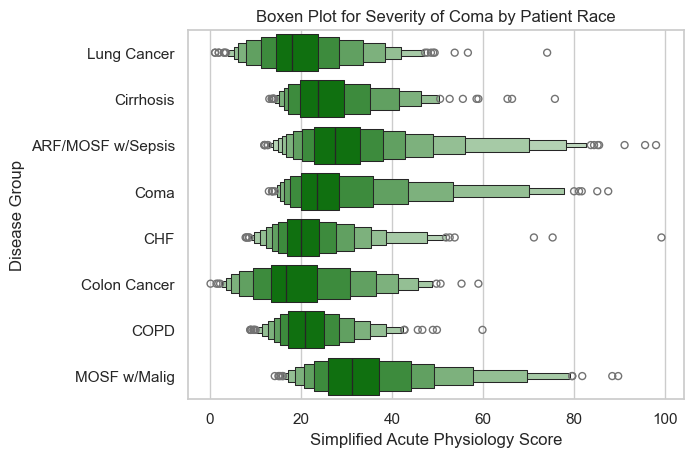

In [89]:
# Set the style of the seaborn plots to whitegrid
sns.set(style="whitegrid")

# Create a boxen plot to visualize the distribution of Simplified Acute Physiology Score by Disease Group
sns.boxenplot(x=df['Simplifie_Acute_Physiology_Score'], y=df['Disease_Group'], color="green", scale="linear")

# Set the label for the x-axis
plt.xlabel('Simplified Acute Physiology Score')

# Set the label for the y-axis
plt.ylabel('Disease Group')

# Set the title of the plot
plt.title('Boxen Plot for Severity of Coma by Patient Race')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 14
#### How does the mortality rate vary among individuals with different Simplified Acute Physiology Scores (SAPS)?

### INTERPRETATION
   - The visualization indicates a higher density of deaths among individuals with Simplified Acute Physiology Scores (SAPS) in the range of 20-26.
   - This suggests that individuals with higher SAPS values within this range are more likely to experience mortality, emphasizing the role of SAPS in predicting the severity of illness and associated mortality.

### CONCLUSION
The analysis of mortality rates among individuals with different Simplified Acute Physiology Scores (SAPS) reveals a distinct pattern. The higher density of deaths in the SAPS range of 20-26 underscores the predictive value of SAPS in assessing the severity of illness and the associated risk of death in critically ill patients. This information is valuable for healthcare professionals in risk stratification and personalized patient care.


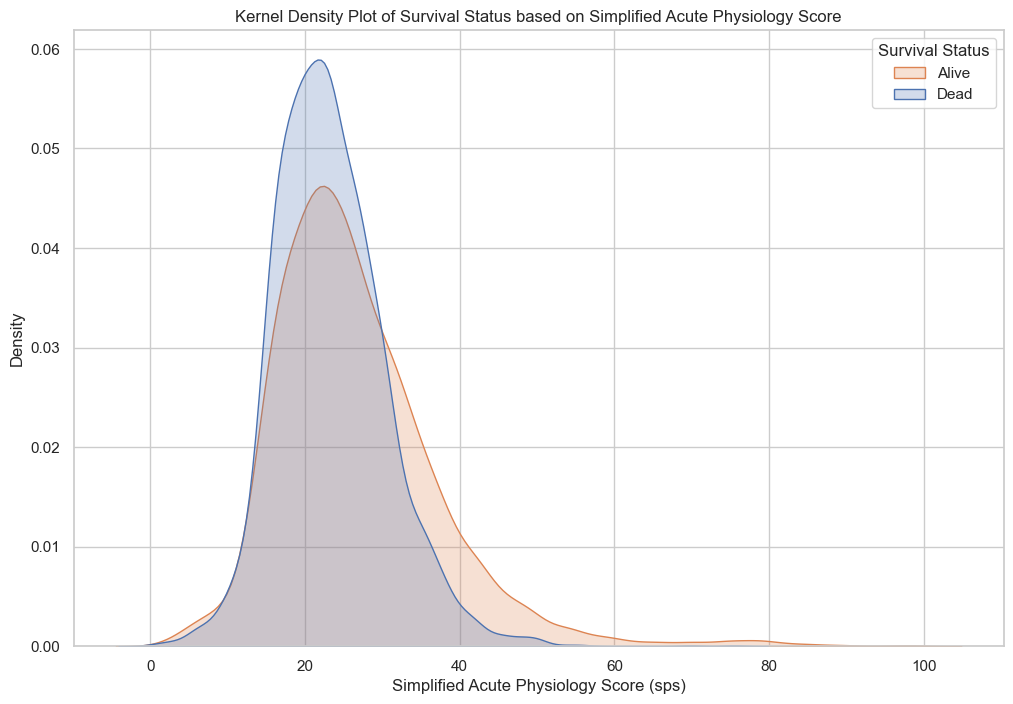

In [90]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a kernel density plot using Seaborn, with 'Simplifie_Acute_Physiology_Score' on the x-axis,
# 'Patient_Death' as the hue, and fill the area under the curve
sns.kdeplot(x='Simplifie_Acute_Physiology_Score', hue='Patient_Death', data=df, fill=True, common_norm=False)

# Add a title to the plot
plt.title('Kernel Density Plot of Survival Status based on Simplified Acute Physiology Score')

# Label the x-axis
plt.xlabel('Simplified Acute Physiology Score (sps)')

# Label the y-axis
plt.ylabel('Density')

# Add a legend with custom labels
plt.legend(title='Survival Status', labels=['Alive', 'Dead'])

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 15
#### How does the distribution of Simplified Acute Physiology Scores (SAPS) vary among different races, specifically focusing on the ARF/MOSF disease class?

### INTERPRETATION
   - The box plot[(Seaborn, 2021)](#6) visualization reveals that, for individuals with ARF/MOSF disease, the median Simplified Acute Physiology Score (SAPS) is higher for White and Black races compared to other races.
   - White individuals exhibit the highest maximum SAPS outliers (around 100), followed by Black individuals with a maximum of approximately 83.
   - Individuals of other races have a lower median SAPS (around 27) with a narrower interquartile range (from the 25th to 75th percentile) between 22 and 43.

### CONCLUSION
The analysis of Simplified Acute Physiology Scores (SAPS) distribution among different races, specifically focusing on the ARF/MOSF disease class, uncovers variations in the severity of illness. The higher median SAPS for White and Black individuals suggests potential racial disparities in the physiological response to ARF/MOSF, emphasizing the need for further research to understand and address these variations in healthcare delivery.


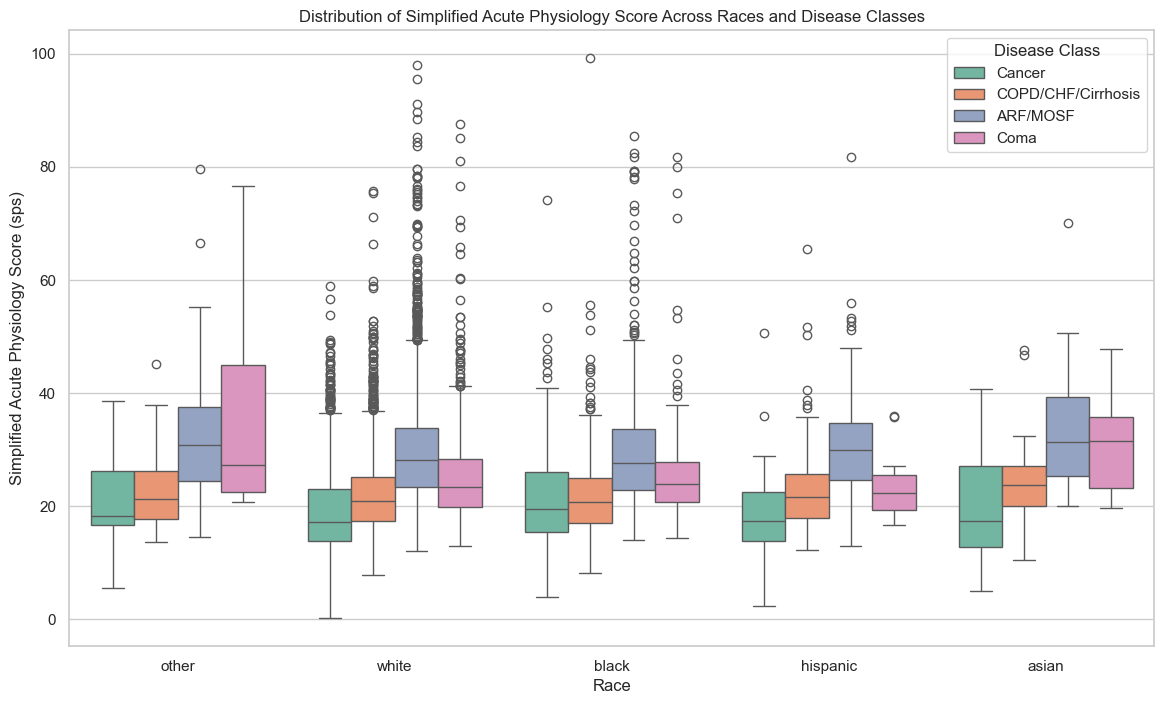

In [91]:
# Set up the size of the plot figure
plt.figure(figsize=(14, 8))

# Create a box plot using Seaborn, with 'Patient_Race' on the x-axis,
# 'Simplifie_Acute_Physiology_Score' on the y-axis, and 'Disease_Class' as the hue
sns.boxplot(x='Patient_Race', y='Simplifie_Acute_Physiology_Score', hue='Disease_Class', data=df, palette='Set2')

# Add a title to the plot
plt.title('Distribution of Simplified Acute Physiology Score Across Races and Disease Classes')

# Label the x-axis
plt.xlabel('Race')

# Label the y-axis
plt.ylabel('Simplified Acute Physiology Score (sps)')

# Add a legend with custom title and position
plt.legend(title='Disease Class', loc='upper right')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 16
#### What is the average hospital charge for individuals with metastatic cancer status compared to those with no cancer and those with cancer?

### INTERPRETATION
   - The average hospital charge for individuals with metastatic cancer status is approximately \$24,000.
   - Individuals with no cancer experience a higher average hospital charge, around \$68,000.
   - For individuals with cancer (without specifying metastatic or not), the average hospital charge is approximately \$73,000.

### CONCLUSION
The analysis of average hospital charges for different cancer statuses reveals distinctive patterns. Individuals with metastatic cancer have a lower average hospital charge compared to those with no cancer and individuals with cancer (without specifying metastatic or not). These findings highlight variations in healthcare costs based on cancer status and underscore the importance of understanding and addressing the financial aspects of cancer care to ensure equitable access and resource allocation in healthcare systems.


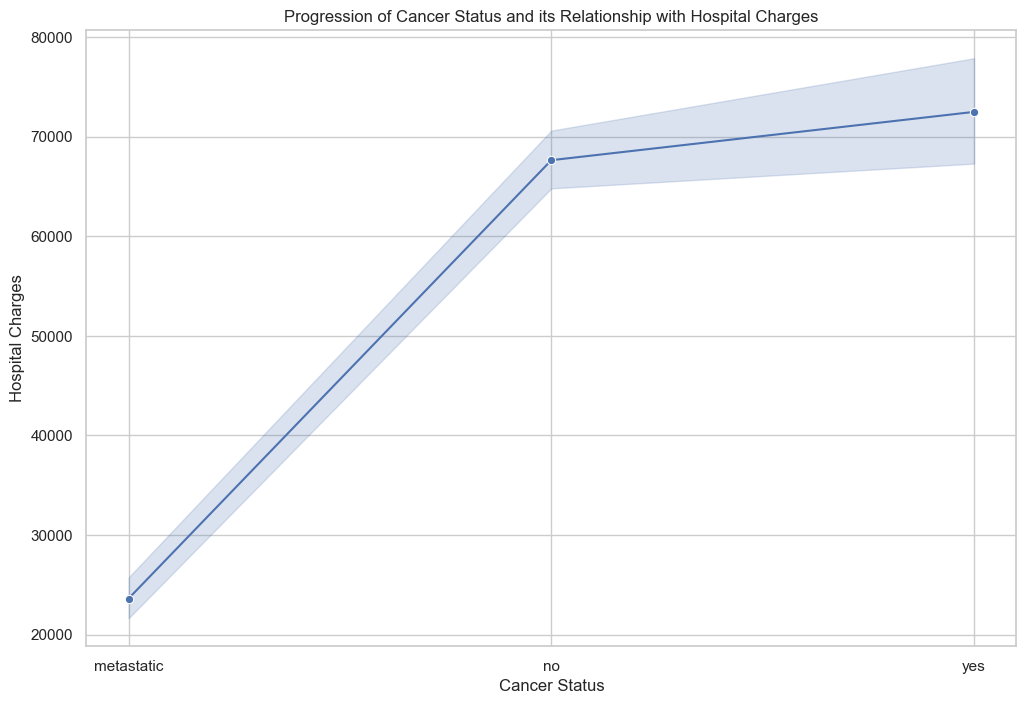

In [92]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a line plot using Seaborn, with 'Cancer_status' on the x-axis,
# 'Hospital_charges' on the y-axis, and markers represented by 'o'
sns.lineplot(x='Cancer_status', y='Hospital_charges', data=df, marker='o')

# Add a title to the plot
plt.title('Progression of Cancer Status and its Relationship with Hospital Charges')

# Label the x-axis
plt.xlabel('Cancer Status')

# Label the y-axis
plt.ylabel('Hospital Charges')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 17
#### What is the variation in average hospital charges among different disease classes, and what factors might contribute to higher charges for ARF/MOSF compared to lower charges for cancer?

### INTERPRETATION
1. **Average Hospital Charges Across Disease Classes:**
   - Patients with ARF/MOSF face significantly higher average hospital charges, approximately \$100,000.
   - In contrast, the average hospital charges for cancer patients are considerably lower, averaging less than \$20,000.

2. **Factors Contributing to Higher Charges for ARF/MOSF:**
   - The higher charges for ARF/MOSF may be attributed to the complexity and resource-intensive nature of treatments, including dialysis and critical care.
   - Critical interventions and continuous monitoring required for patients with ARF/MOSF contribute to increased healthcare resource utilization, resulting in higher associated charges.

3. **Lower Charges for Cancer Treatment:**
   - Cancer treatments, while expensive, may not consistently demand the same level of resources as ARF/MOSF treatments.
   - Variations in treatment modalities, frequency of interventions, and the overall healthcare resource requirements for cancer patients contribute to the observed difference in average hospital charges.

### CONCLUSION
The analysis of average hospital charges across different disease classes highlights substantial variations. Higher charges for ARF/MOSF reflect the complex and resource-intensive nature of treatments, including critical care and dialysis. In contrast, lower charges for cancer treatments can be attributed to differences in resource utilization, treatment modalities, and overall healthcare requirements for patients with cancer. Understanding these factors is crucial for healthcare resource allocation and financial planning in the context of diverse disease classes.


/var/folders/fr/9nj2qxhx4_bf25kdhplqpxxm0000gn/T/ipykernel_13231/2011206202.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Disease_Class', y='Hospital_charges', data=df, ci=None, hue='Disease_Class')


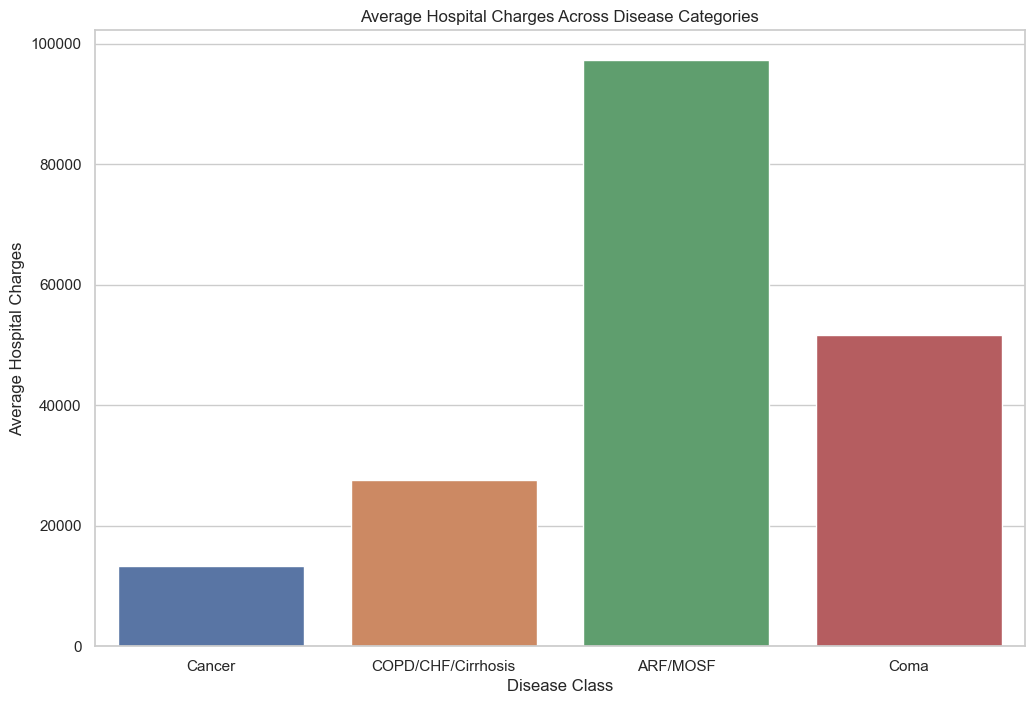

In [93]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn, with 'Disease_Class' on the x-axis,
# 'Hospital_charges' on the y-axis, and hue set to 'Disease_Class'
sns.barplot(x='Disease_Class', y='Hospital_charges', data=df, ci=None, hue='Disease_Class')

# Add a title to the plot
plt.title('Average Hospital Charges Across Disease Categories')

# Label the x-axis
plt.xlabel('Disease Class')

# Label the y-axis
plt.ylabel('Average Hospital Charges')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 18
#### How does the distribution of cancer stages vary among different racial groups based on the pie charts?

### INTERPRETATION:
1. **Metastatic Cancer Prevalence:**
   - The first pie chart suggests a potential racial disparity in cancer staging, with Asians showing a higher prevalence of metastatic cancer.
   - Hispanics, on the other hand, have fewer cases of metastatic cancer, indicating potential variations in cancer progression across racial groups.


2. **No Cancer Cases:**
   - The second pie chart indicates that almost all individuals from Black and Hispanic races do not have cancer, emphasizing potential differences in cancer occurrence or diagnosis.
   
   
3. **Confirmed Cancer Cases:**
   - The third pie chart shows that Whites have more confirmed cases of cancer, while Black individuals have the least number of cancer cases.
   - This prompts further investigation into potential racial variations in the occurrence and staging of cancer within the observed population.


### CONCLUSION:
The analysis of pie charts depicting the distribution of cancer stages across different racial groups reveals distinct patterns. Variations in metastatic cancer prevalence, the absence of cancer cases, and confirmed cancer cases highlight potential racial disparities in cancer occurrence and staging. Further research is warranted to explore the underlying factors contributing to these variations and to address potential healthcare inequalities in cancer diagnosis and management within diverse racial populations.


<Figure size 1000x800 with 0 Axes>

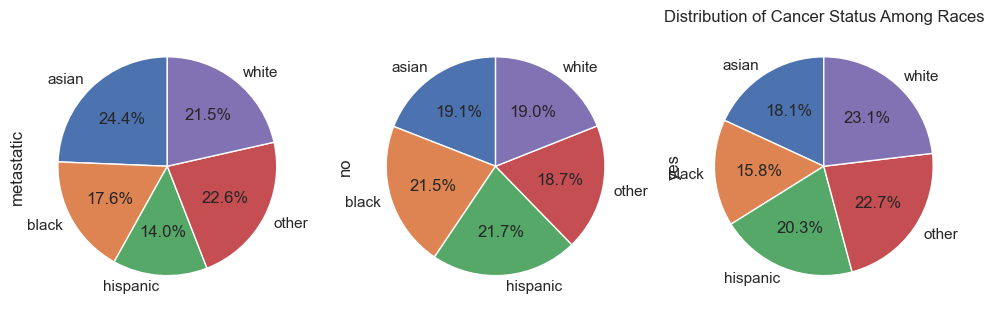

In [94]:
# Set up the size of the plot figure
plt.figure(figsize=(10, 8))

# Group the data by 'Patient_Race' and 'Cancer_status', and create a DataFrame with counts
df_cancer_race = df.groupby(['Patient_Race', 'Cancer_status']).size().unstack()

# Calculate the total count for each race
df_cancer_race['Total'] = df_cancer_race.sum(axis=1)

# Calculate the percentage distribution of cancer status among races
df_cancer_race_percentage = df_cancer_race.div(df_cancer_race['Total'], axis=0) * 100

# Drop the 'Total' column from the DataFrame
df_cancer_race_percentage.drop('Total', axis=1, inplace=True)

# Plot pie charts for each race, representing the distribution of cancer status
df_cancer_race_percentage.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, legend=False, figsize=(12, 8))

# Add a title to the plot
plt.title('Distribution of Cancer Status Among Races')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 19
#### How does the total hospital cost vary between patients with diabetes and those without diabetes, especially for hospital stays?

### INTERPRETATION
1. **Hospital Cost Disparities for Diabetes Patients:**
   - The line plot indicates that individuals with diabetes, particularly those with hospital stays exceeding 80 days, incur the highest hospital charges, reaching approximately \$420,000.
   - The steep increase in hospital costs for diabetes patients with longer stays suggests a potential impact of diabetes on the overall financial burden of extended hospitalizations.


2. **Lower Hospital Costs for Non-Diabetes Patients:**
   - In contrast, individuals without diabetes, even with extended hospital stays for other health concerns, experience lower hospital costs, ranging from \$380,000 to \$390,000.
   - This observation raises questions about the specific influence of diabetes status on the total hospital cost, especially for prolonged hospitalizations.


### CONCLUSION
The analysis of the line plot depicting total hospital costs for patients with and without diabetes reveals notable disparities. Diabetes patients, particularly those with extended hospital stays, face higher costs, indicating a potential financial impact of diabetes on healthcare expenses. Further investigation is warranted to understand the factors contributing to these cost variations and to inform healthcare strategies for managing the financial aspects of diabetes-related hospitalizations.


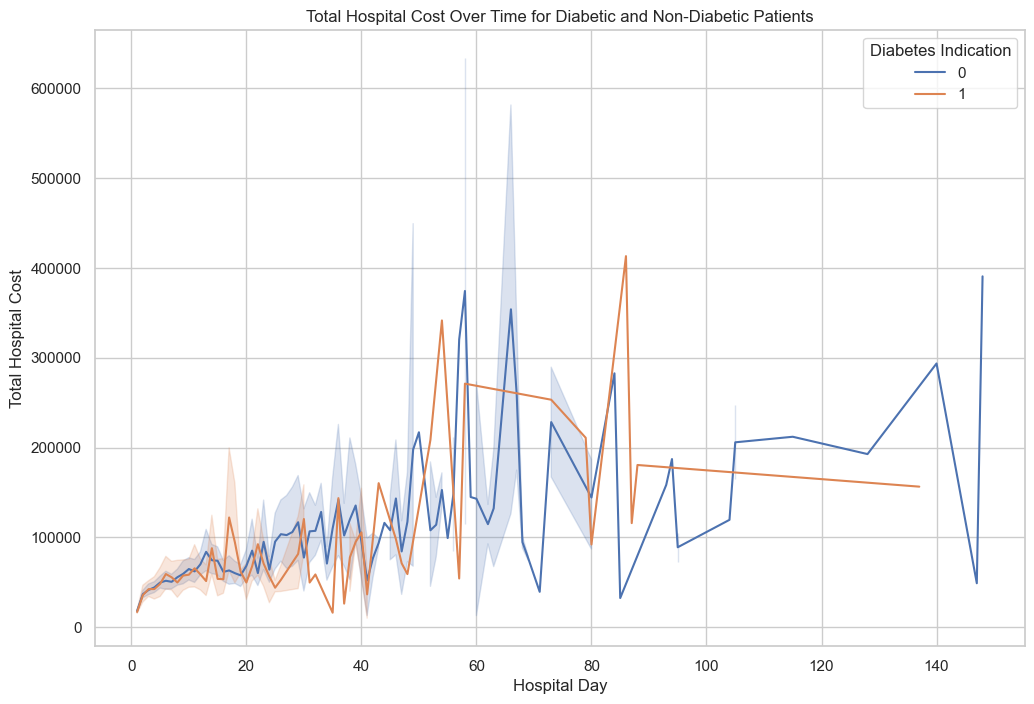

In [95]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a line plot using Seaborn, with 'Hospital_day' on the x-axis,
# 'Total_hospital_cost' on the y-axis, and hue set to 'Patient_Diabetes_Indication'
sns.lineplot(x='Hospital_day', y='Total_hospital_cost', hue='Patient_Diabetes_Indication', data=df)

# Add a title to the plot
plt.title('Total Hospital Cost Over Time for Diabetic and Non-Diabetic Patients')

# Label the x-axis
plt.xlabel('Hospital Day')

# Label the y-axis
plt.ylabel('Total Hospital Cost')

# Add a legend with custom title and position
plt.legend(title='Diabetes Indication', loc='upper right')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 20
#### What patterns can be inferred from the heatmap regarding the distribution of Do Not Resuscitate (DNR) orders across different Disease Classes?

### INTERPRETATION
1. **Resuscitation Choices for ARF/MOSF and COPD/CHF/Cirrhosis:**
   - The heatmap[(Seaborn, 2019)](#5) reveals that for ARF/MOSF and COPD/CHF/Cirrhosis, a substantial number of patients (2100-2500) opt for resuscitation (No DNR).
   - However, around 1500 ARF/MOSF patients choose DNR after SADM, suggesting potential shifts in goals post-surgery, possibly influenced by the severity of the disease or prognosis.


2. **DNR Instances in Coma Patients:**
   - Coma patients exhibit fewer instances of DNR, with 387 choosing DNR after SADM, 185 opting for resuscitation (No DNR), and 24 choosing DNR before SADM.
   - The lower frequency of DNR in coma patients may reflect the uncertainty of prognosis in coma cases and the ethical complexities surrounding resuscitation decisions.


### CONCLUSION
The analysis of the heatmap provides insights into the distribution of Do Not Resuscitate (DNR) orders across different Disease Classes. Patterns in resuscitation choices for ARF/MOSF and COPD/CHF/Cirrhosis, as well as the lower frequency of DNR instances in coma patients, highlight the nuanced decision-making process surrounding resuscitation and end-of-life care across diverse disease categories. Understanding these patterns is crucial for healthcare professionals in ensuring patient-centered and ethically sound care.


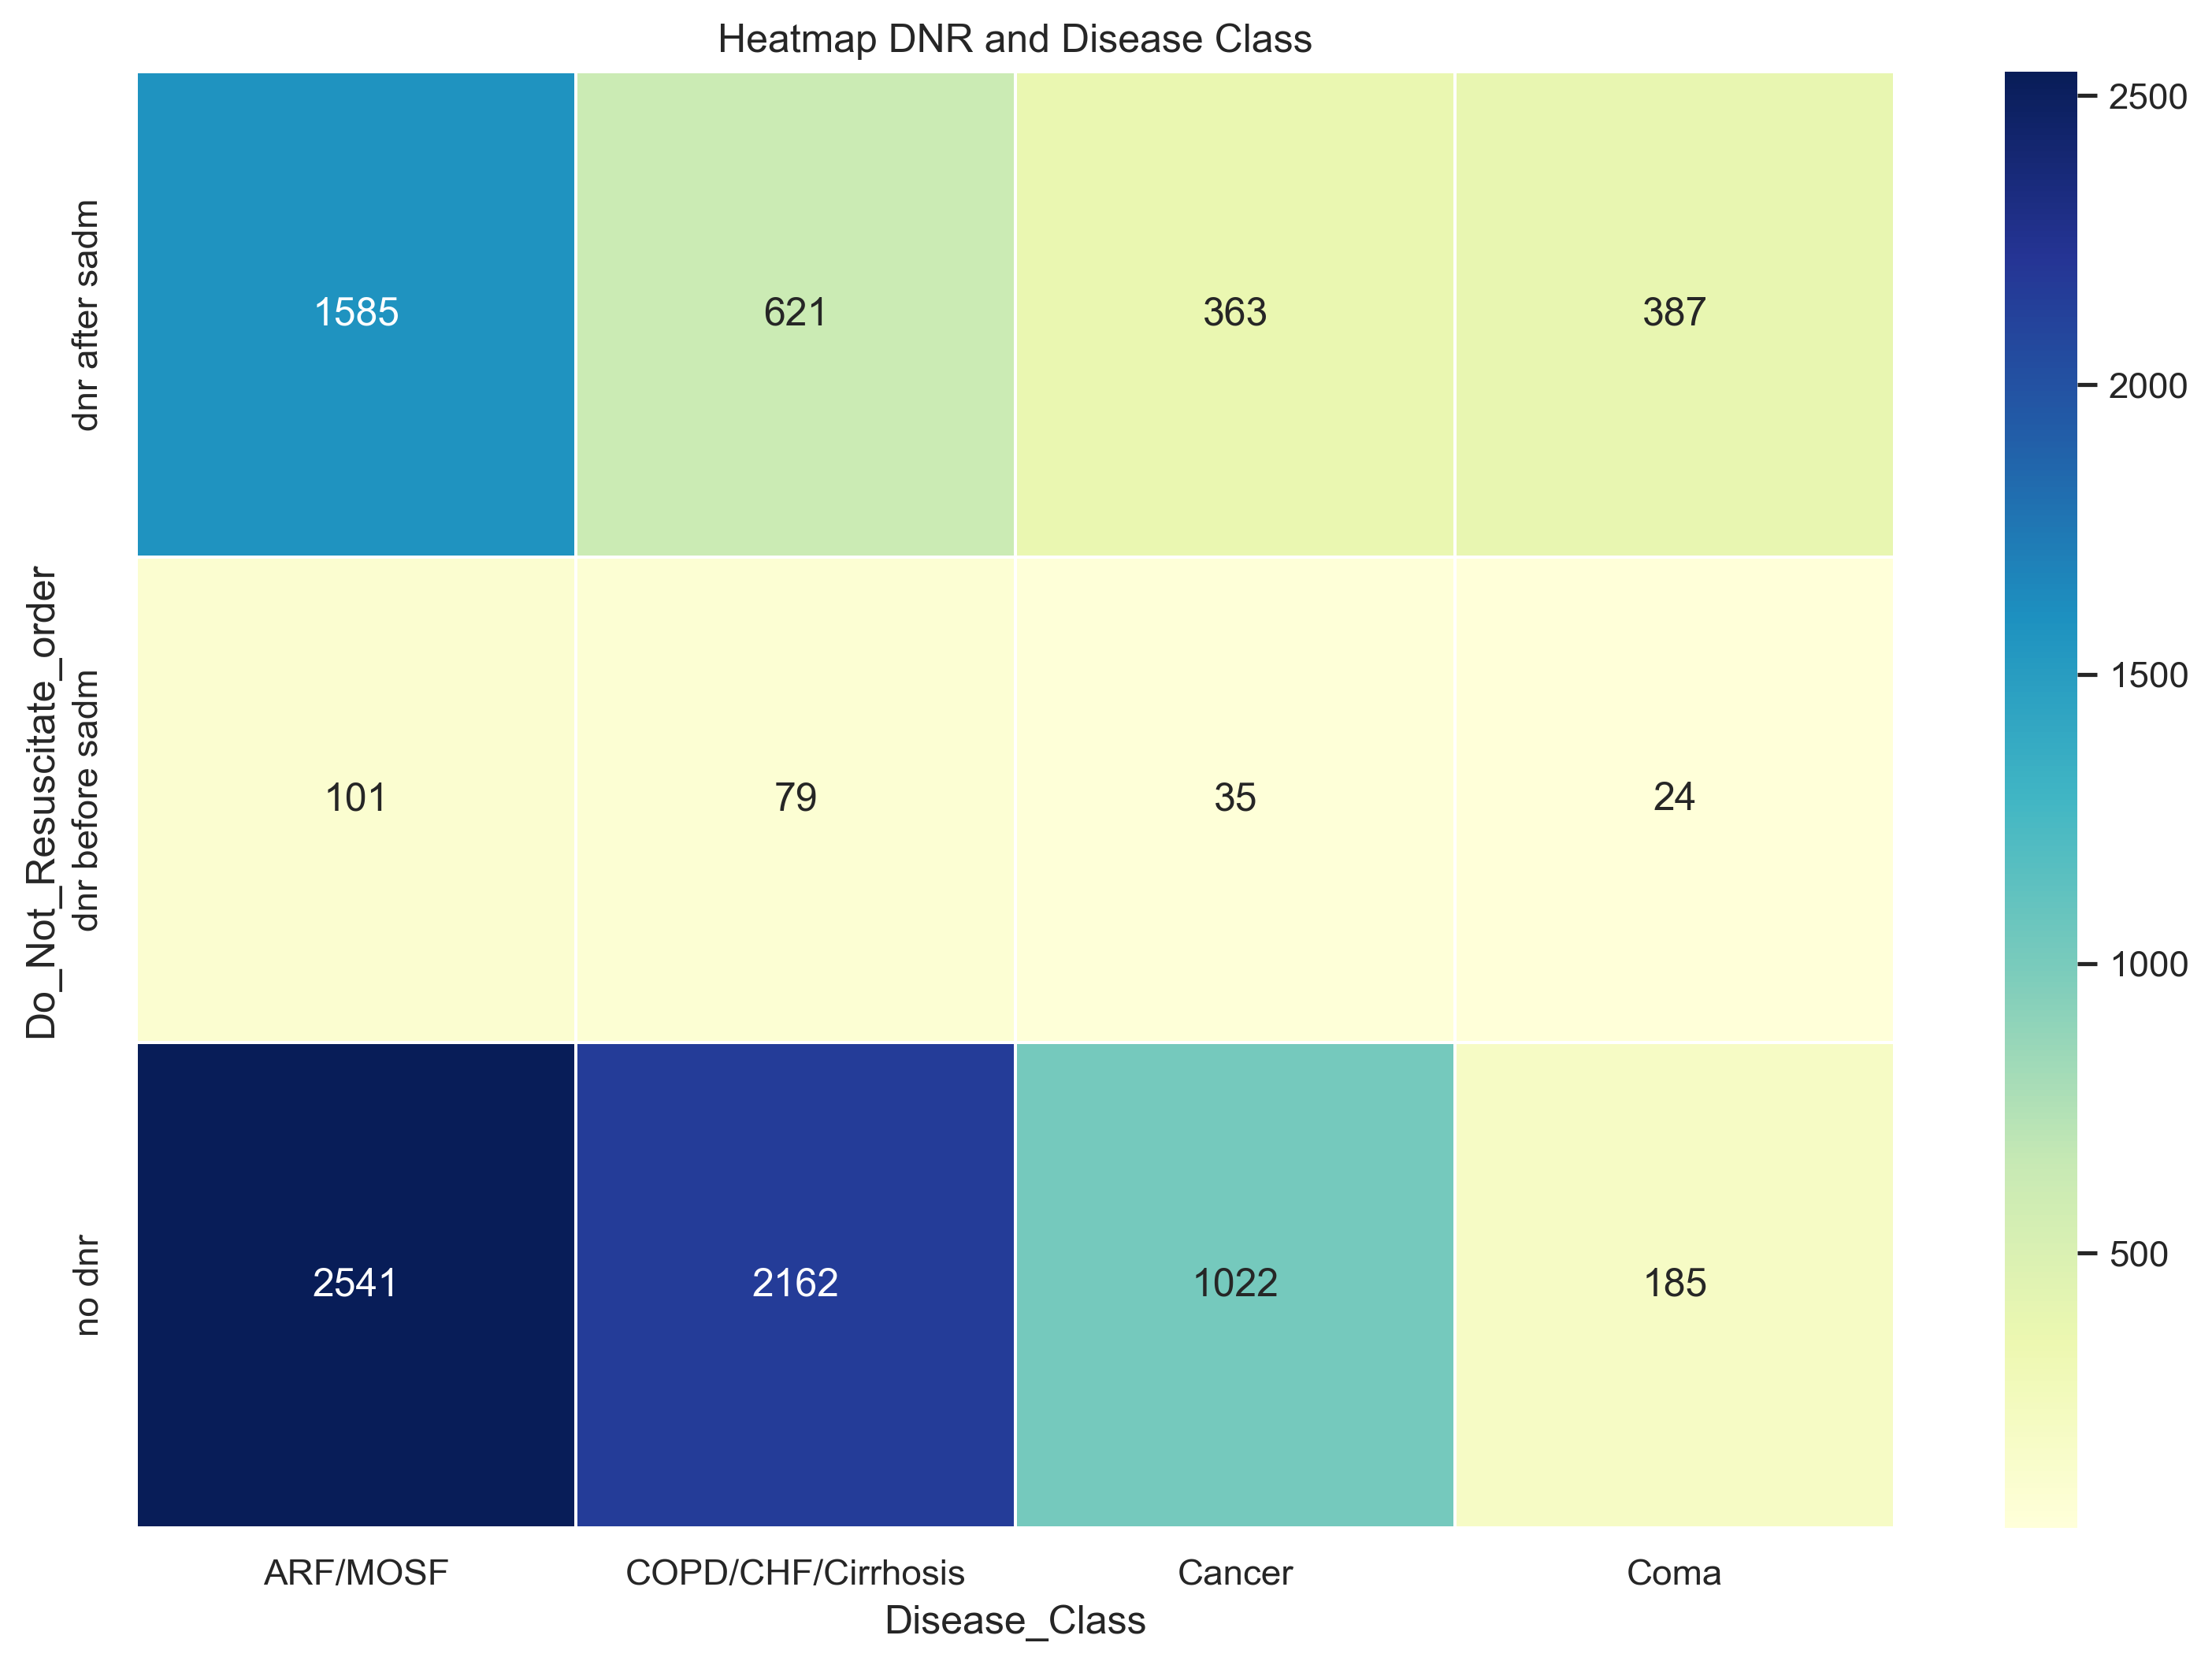

In [96]:
# Create a pivot table using pandas, with 'Do_Not_Resuscitate_order' as the index,
# 'Disease_Class' as the columns, and counting the occurrences using 'aggfunc'
heatmap_data = df.pivot_table(index='Do_Not_Resuscitate_order', columns='Disease_Class', aggfunc='size', fill_value=0)

# Set up the size and resolution of the plot figure
plt.figure(figsize=(12, 8), dpi=300)

# Create a heatmap using Seaborn, with the pivot table data
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

# Add a title to the plot
plt.title('Heatmap DNR and Disease Class')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 21
Is there a discernible pattern or trend in body temperature based on different levels of activity in daily living for patients?

### INTERPRETATION
1. **Variability in Body Temperature:**
   - There is a noticeable variability in body temperature across different levels of Activity_Daily_Living_Patient.
   
2. **Potential Trend:**
   - There seems to be a slight decrease in body temperature as the level of activity in daily living increases, with lower values associated with higher activity levels.
   

### CONCLUSION
- While the observed differences in body temperature across activity levels are interesting, it's essential to conduct statistical analyses to determine if these variations are statistically significant. 
- Further investigation and potentially a larger sample size are needed to draw definitive conclusions about the relationship between activity levels and body temperature in the given patient population.

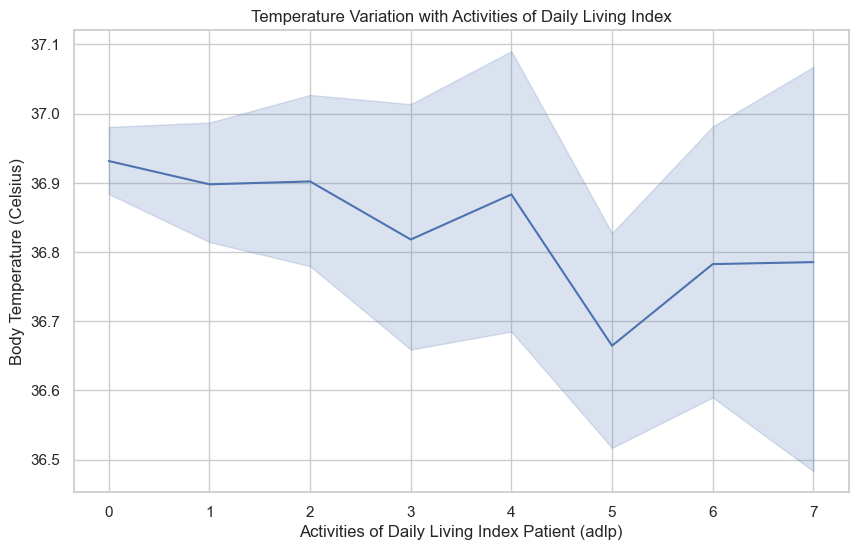

In [97]:
# Set up the size of the plot figure
plt.figure(figsize=(10, 6))

# Create a line plot using Seaborn, with 'Activity_Daily_Living_Patient' on the x-axis,
# 'Body_temperature' on the y-axis
sns.lineplot(x='Activity_Daily_Living_Patient', y='Body_temperature', data=df)

# Add a title to the plot
plt.title('Temperature Variation with Activities of Daily Living Index')

# Label the x-axis
plt.xlabel('Activities of Daily Living Index Patient (adlp)')

# Label the y-axis
plt.ylabel('Body Temperature (Celsius)')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 22
#### How does the distribution of hospital stay lengths for cases with a Do Not Resuscitate (DNR) order vary?

### INTERPRETATION
   - The wider width of the violin plot before the implementation of SADM for cases with a Do Not Resuscitate (DNR) order implies a greater variability in hospital stay lengths during that period.
   - This suggests that, compared to other phases, there was a more diverse range of hospital stay durations for patients with a DNR order before the introduction of SADM.

### CONCLUSION
The analysis of the violin plot provides insights into the distribution of hospital stay lengths for cases with a DNR order before the implementation of SADM. The wider width of the plot indicates increased variability in hospitalization durations during that specific timeframe. Exploring the factors contributing to this variability is essential for a comprehensive understanding of patient care dynamics during the pre-SADM period for individuals with a DNR order.


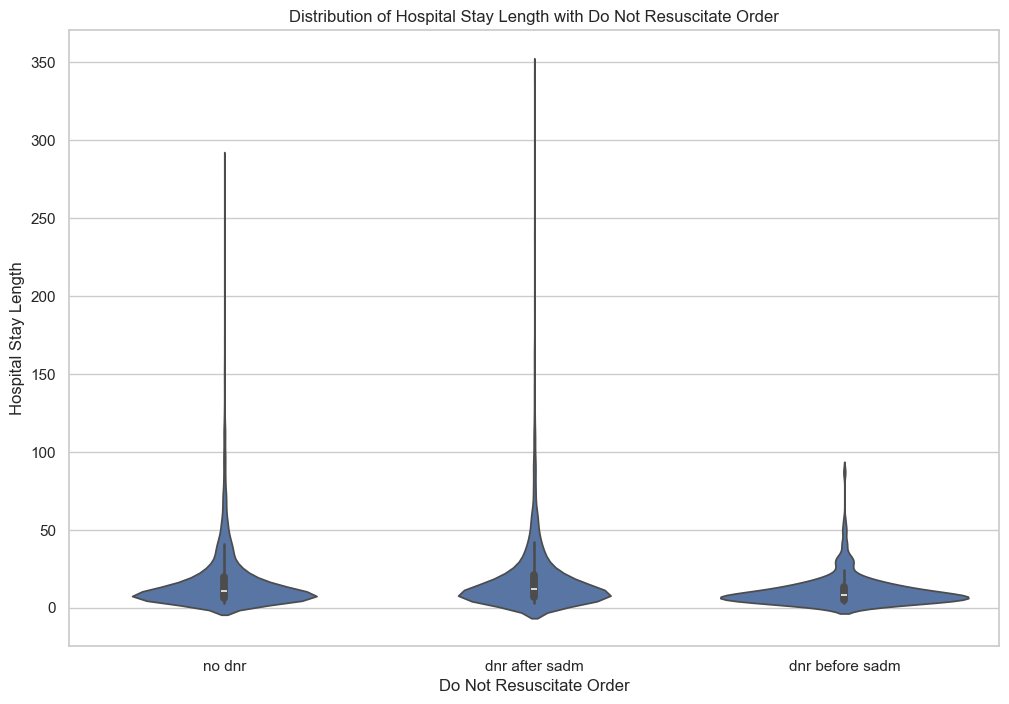

In [98]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create a violin plot using Seaborn, with 'Do_Not_Resuscitate_order' on the x-axis,
# 'Hospital_Stay_Length' on the y-axis
sns.violinplot(x='Do_Not_Resuscitate_order', y='Hospital_Stay_Length', data=df)

# Add a title to the plot
plt.title('Distribution of Hospital Stay Length with Do Not Resuscitate Order')

# Label the x-axis
plt.xlabel('Do Not Resuscitate Order')

# Label the y-axis
plt.ylabel('Hospital Stay Length')

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 23
#### Visualize the distribution of patient age for each disease group and provide an interpretation of the findings.

### INTERPRETATION
1. **Cirrhosis Group:**
   - The mean age for patients with cirrhosis appears to be lower compared to other disease groups.
   - This suggests that cirrhosis may affect individuals at a relatively younger age compared to other diseases in the dataset.


2. **CHF and Coma Groups:**
   - The distribution of patient age for CHF and Coma groups shows similar patterns, with overlapping quartiles.
   - This indicates that these two disease classes have comparable age distributions, and there may be similarities in the age profiles of patients in these groups.


3. **Multiple Organ Failure Group:**
   - The swarm plot on the violin plot illustrates a broad distribution of patient ages for Multiple Organ Failure.
   - There are patients across various age groups, suggesting that age diversity is significant in this disease class.
   - This information is crucial for physicians, as treatment considerations may need to account for the wide age range among patients with Multiple Organ Failure.

### CONCLUSION
The analysis of patient age distribution among different disease groups provides valuable insights for medical practitioners. Understanding the age patterns associated with each disease can aid in tailoring treatments, considering age-related factors in medication prescription, and enhancing overall patient care.


<div class="alert alert-block alert-success", style="font-size: 16px;">
<b>Due to the mismatch of the version in jupyter-notebook, matplotlib and seaborn, there might be a difference in outputs. Here is a reference figure produced in the version specified at the beginning of the notebook</div>
    
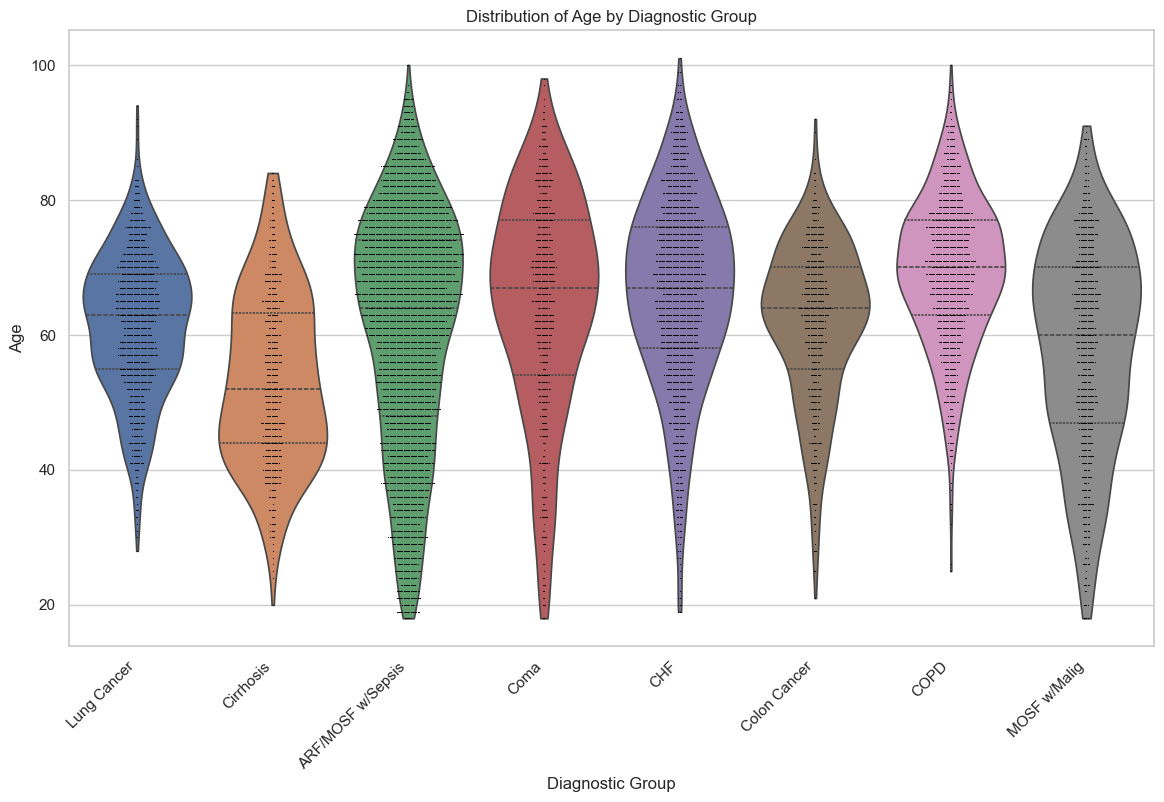

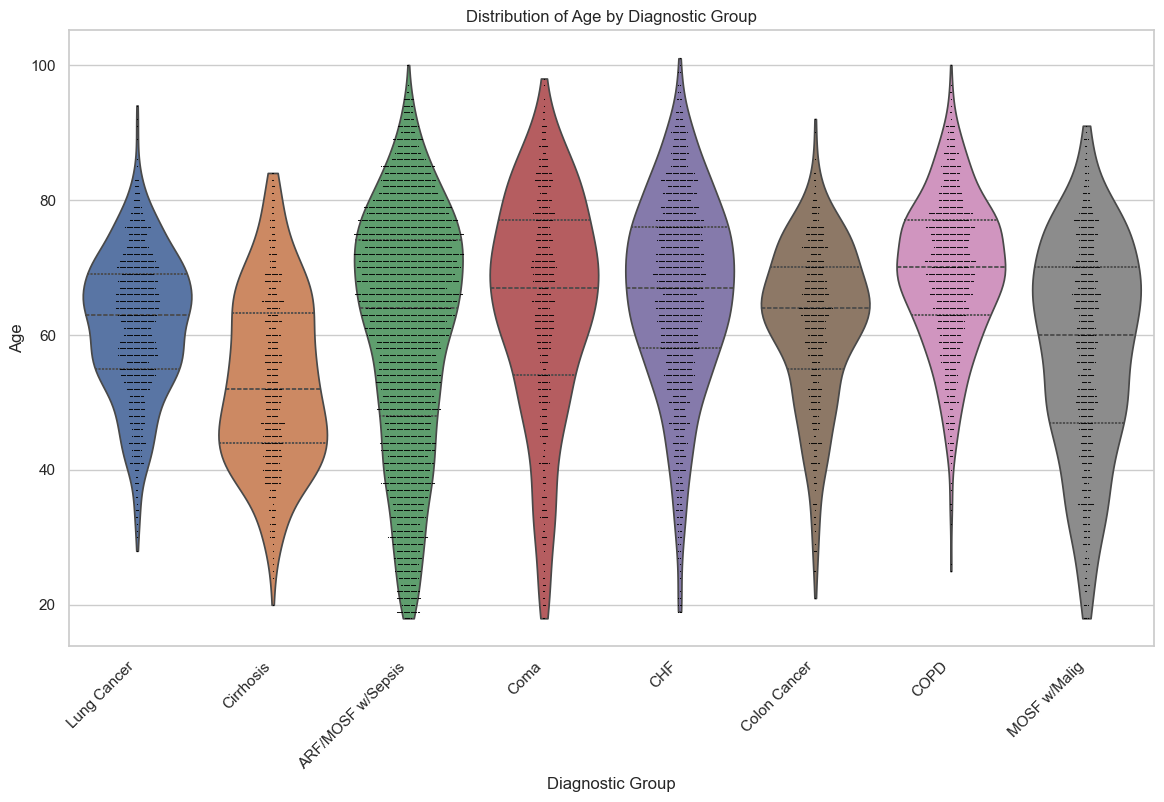

In [99]:
# Set up the size of the plot figure
plt.figure(figsize=(14, 8))

# Create a violin plot using Seaborn, with 'Disease_Group' on the x-axis, 'Patient_Age' on the y-axis,
# inner quartiles displayed, and different colors for each disease group
sns.violinplot(x='Disease_Group', y='Patient_Age', data=df, inner='quartile', hue=df['Disease_Group'], cut=0)

# Overlay swarm plot to show individual data points, using black color and adjusting size
sns.swarmplot(x='Disease_Group', y='Patient_Age', data=df, color='black', size=0.8)

# Add a title to the plot
plt.title('Distribution of Age by Diagnostic Group')

# Label the x-axis
plt.xlabel('Diagnostic Group')

# Label the y-axis
plt.ylabel('Age')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

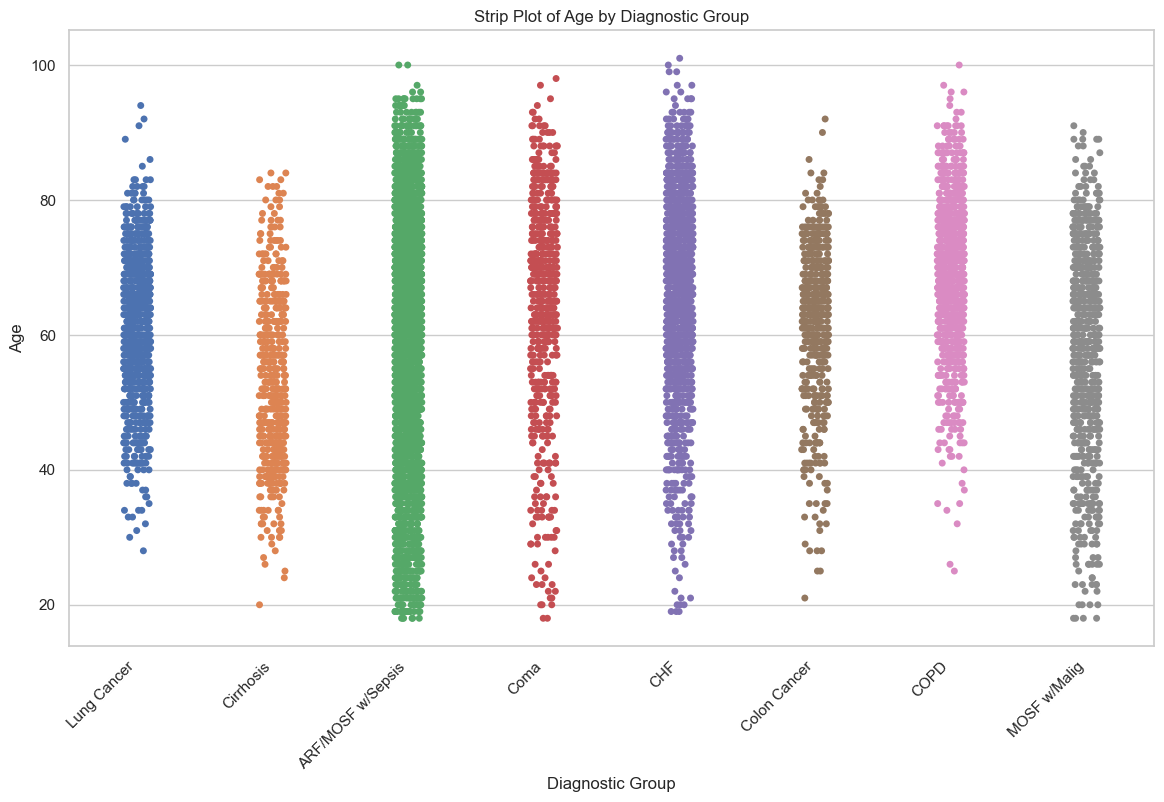

In [100]:
# Set up the size of the plot figure
plt.figure(figsize=(14, 8))

# Create a strip plot using Seaborn, with 'Disease_Group' on the x-axis, 'Patient_Age' on the y-axis,
# different colors for each disease group, adding jitter for better visibility, and adjusting point size
sns.stripplot(x='Disease_Group', y='Patient_Age', data=df, hue=df['Disease_Group'], jitter=True, size=5)

# Add a title to the plot
plt.title('Strip Plot of Age by Diagnostic Group')

# Label the x-axis
plt.xlabel('Diagnostic Group')

# Label the y-axis
plt.ylabel('Age')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 24
#### What insights can be derived from analyzing Hospital Stay Length and Total Hospital Cost concerning different Disease Classes and Patient Death statuses?

### INTERPRETATION
1. **Hospital Stay Length vs. Disease Class and Patient Death:**
   - Patients in a coma and alive category tend to experience longer hospital stays compared to those with ARF/MOSF.
   - This suggests that the nature and severity of certain diseases, such as ARF/MOSF, may lead to relatively shorter hospital stays, while coma-afflicted patients may require more extended periods of medical care.


2. **Total Hospital Cost vs. Disease Class and Patient Death:**
   - Patients diagnosed with ARF/MOSF incur higher total hospital costs compared to those with a coma, despite potential differences in the duration of hospital stays.
   - The discrepancy in costs could be attributed to the intensity of medical interventions and treatments required for ARF/MOSF, which may contribute to higher overall expenses.


### CONCLUSION
The analysis reveals distinctive patterns in Hospital Stay Length and Total Hospital Cost across different Disease Classes and Patient Death statuses. While coma-afflicted and alive patients may have longer hospital stays, patients with ARF/MOSF face higher associated costs, emphasizing the importance of tailoring healthcare strategies to optimize patient care and manage expenses effectively.


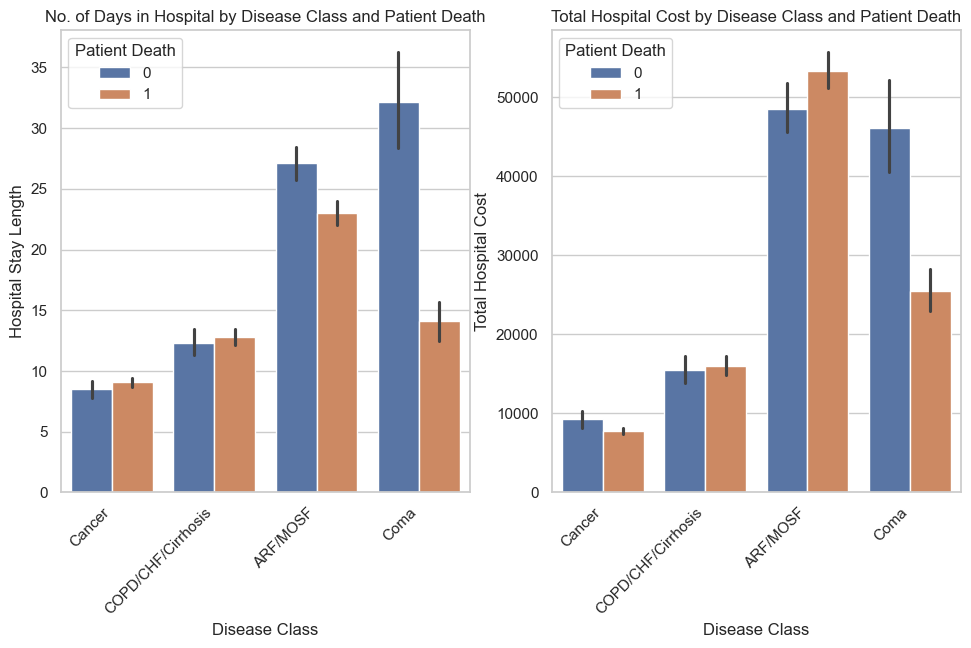

In [101]:
# Set up the size of the plot figure
plt.figure(figsize=(10, 6))

# Adjust the subplot layout to leave space on the left
plt.subplots_adjust(left=0.0)

# Create the first subplot (1 row, 2 columns, first plot)
plt.subplot(121)

# Create a bar plot using Seaborn, with 'Disease_Class' on the x-axis, 'Hospital_Stay_Length' on the y-axis,
# different colors for each 'Patient_Death', and legend
sns.barplot(x='Disease_Class', y='Hospital_Stay_Length', hue='Patient_Death', data=df)

# Add a title to the first subplot
plt.title('No. of Days in Hospital by Disease Class and Patient Death')

# Label the x-axis
plt.xlabel('Disease Class')

# Label the y-axis
plt.ylabel('Hospital Stay Length')

# Add a legend with 'Patient Death' as the title
plt.legend(title='Patient Death')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Create the second subplot (1 row, 2 columns, second plot)
plt.subplot(122)

# Create a bar plot using Seaborn, with 'Disease_Class' on the x-axis, 'Total_hospital_cost' on the y-axis,
# different colors for each 'Patient_Death', and legend
sns.barplot(x='Disease_Class', y='Total_hospital_cost', hue='Patient_Death', data=df)

# Add a title to the second subplot
plt.title('Total Hospital Cost by Disease Class and Patient Death')

# Label the x-axis
plt.xlabel('Disease Class')

# Label the y-axis
plt.ylabel('Total Hospital Cost')

# Add a legend with 'Patient Death' as the title
plt.legend(title='Patient Death')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### RESEARCH QUESTION 25
#### What insights can be gathered from analyzing Patient Income concerning different Disease Classes and Patient Death statuses?

### INTERPRETATION
1. **Consistent Income Distribution:**
   - Across various Disease Classes and Patient Death statuses, a notable majority of patients exhibit a consistent income category, centered around $11,000.
   - This suggests that there is a prevalent income range among patients, indicating a uniform income distribution pattern regardless of the disease class or patient survival status.

2. **Higher Density for ARF/MOSF:**
   - The visualization reveals a higher density for ARF/MOSF in the income distribution, following COPD/CHF/Cirrhosis.
   - This indicates that a substantial number of patients facing Acute Renal Failure/Multiple Organ System Failure encounter challenges in meeting the financial demands associated with hospital treatment.
   
### CONCLUSION
The analysis of Patient Income across different Disease Classes and Patient Death statuses provides valuable insights into income distribution patterns and financial challenges faced by patients. The consistent income range among diverse disease categories highlights a potential need for targeted financial assistance or support programs, particularly for patients with diseases such as ARF/MOSF, where treatment costs are notably high.


<div class="alert alert-block alert-success", style="font-size: 16px;">
<b>Due to the mismatch of the version in jupyter-notebook, matplotlib and seaborn, there might be a difference in outputs or error generated. Here is a reference figure produced in the version specified at the beginning of the notebook</div>

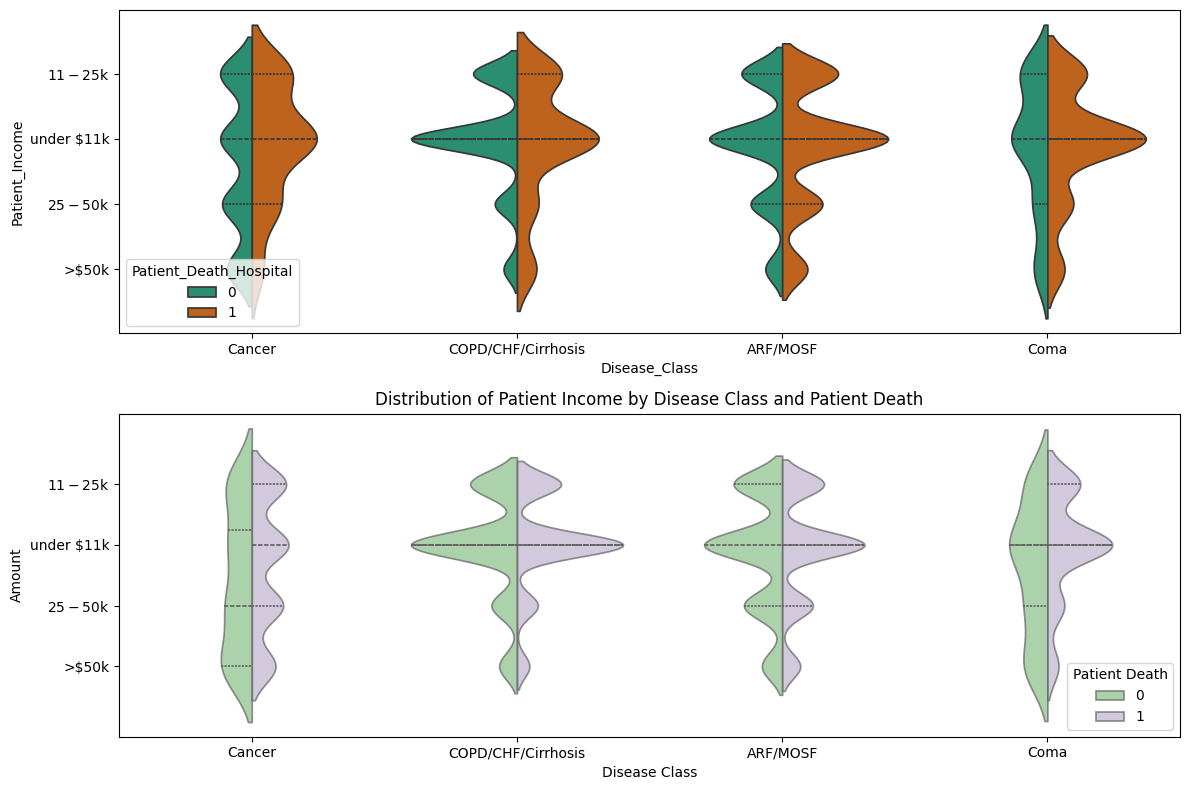

zsh:1: number expected


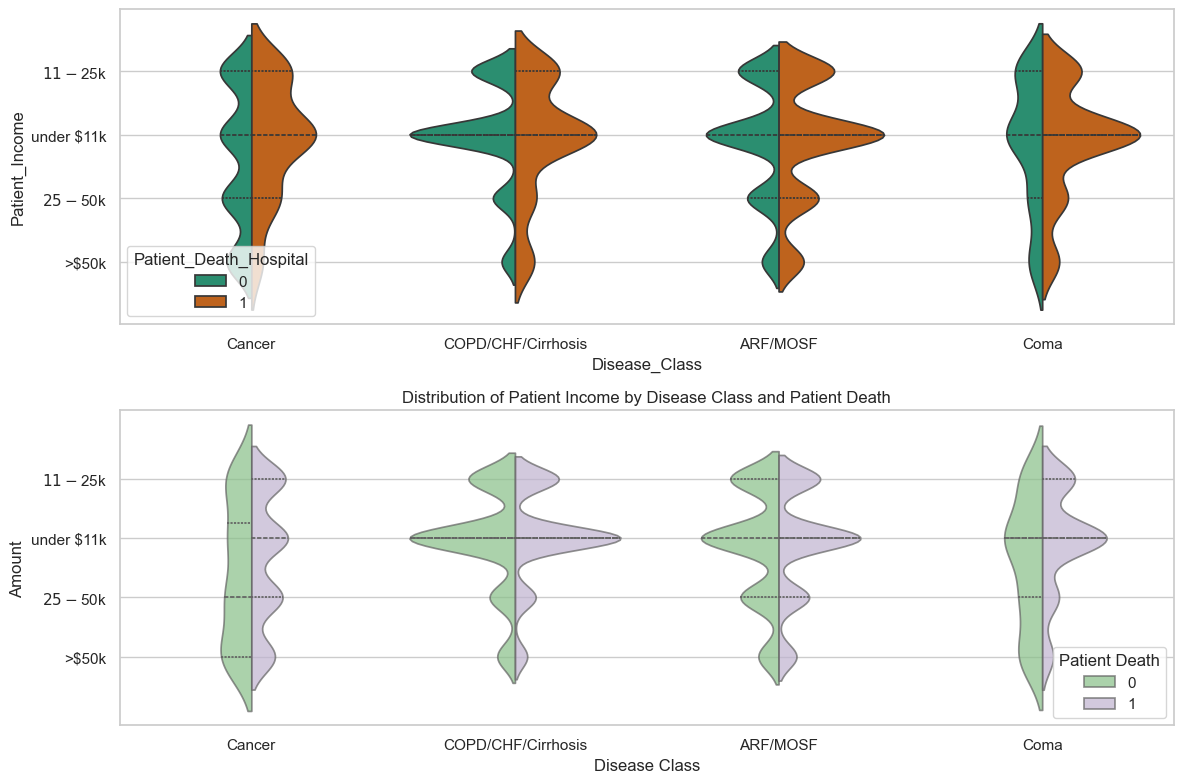

In [102]:
# Set up the size of the plot figure
plt.figure(figsize=(12, 8))

# Create the first subplot (2 rows, 1 column, first plot)
plt.subplot(211)

# Create a split violin plot using Seaborn, with 'Disease_Class' on the x-axis, 'Patient_Income' on the y-axis,
# different colors for each 'Patient_Death_Hospital', and inner quartiles displayed
ax1 = sns.violinplot(x='Disease_Class', y='Patient_Income', hue='Patient_Death_Hospital', data=df,
                     split=True, palette='Dark2', alpha=1, inner='quartile')

# Get handles and labels for the first legend
handles1, labels1 = ax1.get_legend_handles_labels()

# Create the second subplot (2 rows, 1 column, second plot)
plt.subplot(212)

# Create a split violin plot using Seaborn, with 'Disease_Class' on the x-axis, 'Patient_Income' on the y-axis,
# different colors for each 'Patient_Death', and lower alpha
ax2 = sns.violinplot(x='Disease_Class', y='Patient_Income', hue='Patient_Death', data=df,
                     split=True, palette='Accent', alpha=0.7, inner='quartile')

# Get handles and labels for the second legend
handles2, labels2 = ax2.get_legend_handles_labels()

# Add the first legend (upper right)
plt.legend(handles=handles1, labels=labels1, title='Patient Death Hospital', loc='upper right')

# Add the second legend (lower right)
plt.legend(handles=handles2, labels=labels2, title='Patient Death', loc='lower right')

# Add a title to the overall plot
plt.title('Distribution of Patient Income by Disease Class and Patient Death')

# Label the x-axis
plt.xlabel('Disease Class')

# Label the y-axis
plt.ylabel('Amount')
###### due to the mismatch of the version in jupyter-notebook, matplotlib and seaborn, there might be a difference in outputs. Here is a reference figure produced in the version specified at the beginning of the notebook.

![research_question3.png](attachment:research_question3.png)
# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<div class="alert alert-block alert-info", style="font-size: 30px;">
<b>OVERALL INTERPRETATION, DISCUSSION AND CONCLUSION<a name="EDA"></a></div>

### **INTERPRETATION OF RESULTS/PLOTS/STATISTICS**
1. Demonstrated proficiency in Initial Data Analysis (IDA) by employing statistical methodologies to handle missing values based on data distribution characteristics.
2. Applied sound logic in addressing null values, showcasing an understanding of the data formation and interlinkages between columns during the EDA process.
3. Successfully introduced a new age stratification column, enhancing the potential for insightful visualizations and a comprehensive understanding of age-related trends.
4. Identified and interpreted significant patterns in prevalent diseases, highlighting the prominence of certain conditions.
5. Uncovered valuable insights regarding reported income levels, emphasizing the financial challenges faced by a substantial majority of patients and indicating the need for targeted interventions.

### **DISCUSSION**
1. Demonstrated a high level of critical thinking and analysis, particularly in addressing challenges related to data interpretation and understanding the limitations of statistical methods.
2. Explored the complexities of data interpretation, noting variations in certain variables among patients and the need for context-specific handling.
3. Provided meaningful insights into the relationships between survival probability and relevant factors, offering a nuanced understanding of patient prognosis.
4. Articulated the challenges and learning experiences encountered during the analysis process, showcasing an awareness of data intricacies and the importance of domain knowledge.

### **CONCLUSIONS**
1. Conclusions drawn were well-supported by the analysis, emphasizing the necessity for targeted interventions and programs based on the identified insights.
2. Addressed the initial objectives effectively by linking the analysis findings to healthcare management strategies and equitable access to medical treatments.
3. Recognized the potential application of the analyzed data for predicting patient outcomes, showcasing a forward-looking perspective on the utility of the findings.

### **OVERALL IMPLICATIONS**

The analysis presented in this report reflects a comprehensive exploration of the dataset through Initial Data Analysis and Exploratory Data Analysis. The findings underscore the importance of tailored statistical methodologies, thoughtful handling of missing values, and strategic feature engineering, particularly in age stratification. The identified patterns and insights have significant implications for healthcare management, highlighting the need for targeted interventions and financial assistance programs. The report also acknowledges challenges faced during the analysis, emphasizing the importance of critical thinking and domain knowledge. In conclusion, the study provides a foundation for further exploration and potential applications in predictive modeling for patient outcomes.

<div class="alert alert-block alert-info", style="font-size: 30px;">
<b>REFERENCES<a name="EDA"></a></div>

[1] Matplotlib, (2019). 3D Plotting in Python. Retrieved from https://matplotlib.org/stable/api/toolkits/mplot3d.html (Accessed on 1 December 2023)<a name="1"></a>

[2] Matplotlib, (2020). 3D Graphs in Matplotlib. Retrieved from https://pythonprogramming.net/3d-graphs-matplotlib-tutorial/ (Accessed on 1 December 2023)<a name="2"></a>

[3] Hmsic, (2018). Hmisc: Harrell Miscellaneous. Retrieved from https://hbiostat.org/data/repo/supportdesc (Accessed on 3rd December)<a name="3"></a>

[4] ICPSR, (2019). National Archive of Computerized Data on Aging. Retrieved from https://www.icpsr.umich.edu/web/HMCA/studies/2957/versions/V2 (Accessed on 2 December 2023)<a name="4"></a>

[5] Seaborn, (2019). Heatmap. Retrieved from https://seaborn.pydata.org/generated/seaborn.heatmap.html (Accessed on 5 December 2023)<a name="5"></a>

[6] Seaborn, (2021). Seaborn Examples. Retrieved from https://seaborn.pydata.org/examples/index.html (Accessed on 5 December 2023)<a name="6"></a>

[7] MachineLearningPlus, (n.d.) Top 50 Matplotlib Visualizations - The Master Plots.Retrieved from https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/ (Accessed on 4 December 2023)<a name="7"></a>

[8] Wenger, N. S., et al. (2010). The SUPPORT Prognostic Model. Objective Estimates of Survival for Seriously Ill Hospitalized Adults. Study to Understand Prognoses and Preferences for Outcomes and Risks of TreatmE. [PubMed ID: 7474243](https://pubmed.ncbi.nlm.nih.gov/7474243/) (Accessed on 6 December 2023)<a name="8"></a>

[9] The SUPPORT Prognostic Model. Objective Estimates of Survival for Seriously Ill Hospitalized Adults. Study to Understand Prognoses and Preferences for Outcomes and Risks of TreatmE. (n.d.). Retrieved from [ResearchGate](https://www.researchgate.net/publication/318971934_The_SUPPORT_Prognostic_Model_Objective_Estimates_of_Survival_for_Seriously_Ill_Hospitalized_Adults_Study_to_Understand_Prognoses_and_Preferences_for_Outcomes_and_Risks_of_TreatmE) (Accessed on 9 December 2023)<a name="9"></a>

[10] Stackoverflow, (2020). How do you update Seaborn to the latest version (v0.9). Retrieved from https://stackoverflow.com/questions/52434842/how-do-you-update-seaborn-to-latest-version-v0-9 (Accessed on 10 December 2023)<a name="10"></a>

[11] Wikipedia, (2020). Data Analysis. Retrieved from https://en.wikipedia.org/wiki/Data_analysis (Accessed on 11 December 2023)<a name="11"></a>

[12] Wikipedia, (n.d.). Exploratory Data Analysis. Retrieved from https://en.wikipedia.org/wiki/Exploratory_data_analysis (Accessed on 17 December 2023)<a name="12"></a>